In [2]:
# installations - twitter api & LDA Visualization
# !pip3 install twitterscraper
# !pip install pyLDAvis

# imports
import os
import re
import nltk
import pandas as pd
import numpy as np
import datetime as dt 

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from twitterscraper import query_tweets
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns
import pyLDAvis
import pyLDAvis.sklearn

%config InlineBackend.figure_format = 'retina'
%matplotlib inline


INFO: {'User-Agent': 'Mozilla/5.0 (Windows; U; Windows NT 6.1; x64; fr; rv:1.9.2.13) Gecko/20101203 Firebird/3.6.13'}
/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Scraping

In [8]:
# function created to scrape tweets for a particular hashtag, convert to a dataframe and write/append to a .csv file
# reference for scraping code: https://www.youtube.com/watch?v=zF_Q2v_9zKY

def twitter_scrape(hashtag):
    begin_date = dt.date(2020,3,25) # First set of dates 01-Jan to 24-Mar
    end_date = dt.date(2020,4,7) 

    tweets = query_tweets(hashtag, begindate = begin_date, enddate = end_date, lang = 'en')
    # write the tweets to a dataframe
    df = pd.DataFrame(t.__dict__ for t in tweets)
    # drop duplicates from the dataframe
    df = df.loc[df.astype(str).drop_duplicates().index]
    if not os.path.isfile('../datasets/tweets2.csv'):
        df.to_csv('../datasets/tweets2.csv') # write to .csv with header (initial write)
    else:
        df.to_csv('../datasets/tweets2.csv', mode='a', header=False) # append to existing .csv file without header rows
    return df

In [9]:
twitter_scrape('COVID')

INFO: queries: ['COVID since:2020-03-25 until:2020-03-26', 'COVID since:2020-03-26 until:2020-03-27', 'COVID since:2020-03-27 until:2020-03-28', 'COVID since:2020-03-28 until:2020-03-29', 'COVID since:2020-03-29 until:2020-03-30', 'COVID since:2020-03-30 until:2020-03-31', 'COVID since:2020-03-31 until:2020-04-01', 'COVID since:2020-04-01 until:2020-04-02', 'COVID since:2020-04-02 until:2020-04-03', 'COVID since:2020-04-03 until:2020-04-04', 'COVID since:2020-04-04 until:2020-04-05', 'COVID since:2020-04-05 until:2020-04-06', 'COVID since:2020-04-06 until:2020-04-07']
INFO: Querying COVID since:2020-03-26 until:2020-03-27
INFO: Querying COVID since:2020-03-25 until:2020-03-26
INFO: Querying COVID since:2020-03-28 until:2020-03-29
INFO: Querying COVID since:2020-03-29 until:2020-03-30
INFO: Querying COVID since:2020-03-27 until:2020-03-28
INFO: Querying COVID since:2020-03-30 until:2020-03-31
INFO: Scraping tweets from https://twitter.com/search?f=tweets&vertical=default&q=COVID%20since

INFO: Retrying... (Attempts left: 50)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326850409148418-1243326867370803200&q=COVID%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Using proxy 125.133.214.38:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689236672286720-1243689255618187264&q=COVID%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 8

INFO: Using proxy 125.133.214.38:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501166613598209-1245501195327848449&q=COVID%20since%3A2020-04-01%20until%3A2020-04-02&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in dec

INFO: Retrying... (Attempts left: 50)
INFO: Retrying... (Attempts left: 50)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225952541224967-1246225970215809024&q=COVID%20since%3A2020-04-03%20until%3A2020-04-04&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/

INFO: Retrying... (Attempts left: 49)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588317166075908-1246588358307930112&q=COVID%20since%3A2020-04-04%20until%3A2020-04-05&l=en
INFO: Using proxy 186.103.213.2:808
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051630099660801-1244051644133801986&q=COVID%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 8

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414016983666688-1244414031894589441&q=COVID%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Retrying... (Attempts left: 48)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326850409148418-1243326867370803200&q=COVID%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Using proxy 134.122.29.170:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051630099660801-1244051644133801986&q=COVID%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line

INFO: Using proxy 134.122.29.170:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414016983666688-1244414031894589441&q=COVID%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in d

INFO: Retrying... (Attempts left: 48)
INFO: Retrying... (Attempts left: 48)
INFO: Retrying... (Attempts left: 48)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465596993537-1242964480440406016&q=COVID%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138779494658052-1245138807751618561&q=COVID%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501166613598209-1245501195327848449&q=COVID%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Using proxy 134.122.29

INFO: Retrying... (Attempts left: 47)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689236672286720-1243689255618187264&q=COVID%20since%3A2020-03-27%20until%3A2020-03-28&l=en
INFO: Using proxy 103.241.227.110:6666
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863569515638785-1245863583348482050&q=COVID%20since%3A2020-04-02%20until%3A2020-04-03&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", lin

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465596993537-1242964480440406016&q=COVID%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326850409148418-1243326867370803200&q=COVID%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Using proxy 103.241.227.110:6666
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414016983666688-1244414031894589441&q=COVID%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 103.241.227.110:6666
INFO: Using proxy 125.133.214.7:80
INFO: Using proxy 103.241.227.110:6666
INFO: Using proxy 125.133.214.7:80
INFO: Using proxy 103.241.227.110:6666
INFO: Using proxy 125.133.214.7:80
INFO: Using proxy 103.241.227.110:6666
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?

INFO: Retrying... (Attempts left: 46)
INFO: Using proxy 125.133.214.7:80
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728113041409-1246950746412769282&q=COVID%20since%3A2020-04-05%20until%3A2020-04-06&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138779494658052-1245138807751618561&q=COVID%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 89

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776402705985537-1244776419676303365&q=COVID%20since%3A2020-03-30%20until%3A2020-03-31&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225952541224967-1246225970215809024&q=COVID%20since%3A2020-04-03%20until%3A2020-04-04&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Retrying... (Attempts left: 45)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776402705985537-1244776419676303365&q=COVID%20since%3A2020-03-30%20until%3A2020-03-31&l=en
INFO: Using proxy 203.217.140.6:8888
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326850409148418-1243326867370803200&q=COVID%20since%3A2020-03-26%20until%3A2020-03-27&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 

INFO: Retrying... (Attempts left: 44)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225952541224967-1246225970215809024&q=COVID%20since%3A2020-04-03%20until%3A2020-04-04&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in d

INFO: Retrying... (Attempts left: 44)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138779494658052-1245138807751618561&q=COVID%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Using proxy 61.75.77.149:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465596993537-1242964480440406016&q=COVID%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588317166075908-1246588358307930112&q=COVID%20since%3A2020-04-04%20until%3A2020-04-05&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Using proxy 187.177.139.8:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326850409148418-1243326867370803200&q=COVID%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Retrying... (Attempts left: 43)
INFO: Using proxy 61.75.77.149:80
INFO: Using proxy 61.75.77.149:80
INFO: Using proxy 187.177.139.8:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313122362359808-1247313133326274560&q=COVID%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Using proxy 187.177.139.8:8080
INFO: Using proxy 187.177.139.8:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&ma

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776402705985537-1244776419676303365&q=COVID%20since%3A2020-03-30%20until%3A2020-03-31&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728113041409-1246950746412769282&q=COVID%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Retrying... (Attempts left: 42)
INFO: Retrying... (Attempts left: 43)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588317166075908-1246588358307930112&q=COVID%20since%3A2020-04-04%20until%3A2020-04-05&l=en
INFO: Retrying... (Attempts left: 42)
INFO: Using proxy 187.177.139.8:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414016983666688-1244414031894589441&q=COVID%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863569515638785-1245863583348482050&q=COVID%20since%3A2020-04-02%20until%3A2020-04

INFO: Retrying... (Attempts left: 41)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863569515638785-1245863583348482050&q=COVID%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Using proxy 200.73.128.5:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326850409148418-1243326867370803200&q=COVID%20since%3A2020-03-26%20until%3A2020-03-27&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 8

INFO: Retrying... (Attempts left: 41)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225952541224967-1246225970215809024&q=COVID%20since%3A2020-04-03%20until%3A2020-04-04&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in d

INFO: Using proxy 154.221.23.21:8118
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465596993537-1242964480440406016&q=COVID%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in de

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414016983666688-1244414031894589441&q=COVID%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138779494658052-1245138807751618561&q=COVID%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Retrying... (Attempts left: 40)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313122362359808-1247313133326274560&q=COVID%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414016983666688-1244414031894589441&q=COVID%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Retrying... (Attempts left: 39)
INFO: Using proxy 154.221.23.21:8118
INFO: Scraping tweets from ht

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728113041409-1246950746412769282&q=COVID%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Using proxy 36.89.106.247:43732
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313122362359808-1247313133326274560&q=COVID%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Retrying... (Attempts left: 39)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414016983666688-1244414031894589441&q=COVID%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863569515638785-1245863583348482050&q=COVID%20since%3A2020-04-02%20until%3A2020-04-03&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Retrying... (Attempts left: 38)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138779494658052-1245138807751618561&q=COVID%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Using proxy 103.78.80.194:33442
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588317166075908-1246588358307930112&q=COVID%20since%3A2020-04-04%20until%3A2020-04-05&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414016983666688-1244414031894589441&q=COVID%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 118.69.50.154:443
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689236672286720-1243689255618187264&q=COVID%20since%3A2020-03-27%20until%3A2020-03-28&l=en
INFO: Using proxy 36.89.106.247:43732
INFO: Using proxy 103.78.80.194:33442
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501166613598209-1245501195327848449&q=COVID%20since%3A2020

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051630099660801-1244051644133801986&q=COVID%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Using proxy 118.69.50.154:443
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689236672286720-1243689255618187264&q=COVID%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in dec

INFO: Retrying... (Attempts left: 36)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863569515638785-1245863583348482050&q=COVID%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Using proxy 85.10.219.100:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728113041409-1246950746412769282&q=COVID%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 

INFO: Using proxy 85.10.219.100:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588317166075908-1246588358307930112&q=COVID%20since%3A2020-04-04%20until%3A2020-04-05&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in de

INFO: Retrying... (Attempts left: 36)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313122362359808-1247313133326274560&q=COVID%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Retrying... (Attempts left: 36)
INFO: Using proxy 85.10.219.100:1080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501166613598209-1245501195327848449&q=COVID%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Using proxy 118.69.50.154:443
INFO: Using proxy 85.10.219.100:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_pos

INFO: Retrying... (Attempts left: 35)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728113041409-1246950746412769282&q=COVID%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Using proxy 187.188.175.251:42305
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051630099660801-1244051644133801986&q=COVID%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", li

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313122362359808-1247313133326274560&q=COVID%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Retrying... (Attempts left: 34)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326850409148418-1243326867370803200&q=COVID%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Using proxy 91.191.52.71:34189
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051630099660801-1244051644133801986&q=COVID%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 

INFO: Retrying... (Attempts left: 33)
INFO: Retrying... (Attempts left: 34)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776402705985537-1244776419676303365&q=COVID%20since%3A2020-03-30%20until%3A2020-03-31&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728113041409-1246950746412769282&q=COVID%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Using proxy 34.235.49.158:3128
INFO: Using proxy 91.191.52.71:34189
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863569515638785-1245

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501166613598209-1245501195327848449&q=COVID%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Using proxy 91.191.52.71:34189
INFO: Using proxy 34.235.49.158:3128
INFO: Using proxy 187.188.175.251:42305
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465596993537-1242964480440406016&q=COVID%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Retrying... (Attempts left: 34)
INFO: Using proxy 91.191.52.71:34189
INFO: Using proxy 34.235.49.158:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-12462259525

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689236672286720-1243689255618187264&q=COVID%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776402705985537-1244776419676303365&q=COVID%20since%3A2020-03-30%20until%3A2020-03-31&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Using proxy 204.48.19.184:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728113041409-1246950746412769282&q=COVID%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in deco

INFO: Retrying... (Attempts left: 32)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588317166075908-1246588358307930112&q=COVID%20since%3A2020-04-04%20until%3A2020-04-05&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in d

INFO: Retrying... (Attempts left: 32)
INFO: Retrying... (Attempts left: 31)
INFO: Retrying... (Attempts left: 32)
INFO: Retrying... (Attempts left: 32)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465596993537-1242964480440406016&q=COVID%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501166613598209-1245501195327848449&q=COVID%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689236672286720-1243689255618187264&q=COVID%20since%3A2020-03-27%20until%3A2020-0

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051630099660801-1244051644133801986&q=COVID%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Retrying... (Attempts left: 31)
INFO: Retrying... (Attempts left: 31)
INFO: Retrying... (Attempts left: 30)
INFO: Retrying... (Attempts left: 30)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225952541224967-1246225970215809024&q=COVID%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588317166075908-1246588358307930112&q=COVID%20since%3A2020-04-04%20until%3A2020-04-05&l=en
INFO: Retrying... (Attempts left: 31)
INFO: Retrying... (Attempts left: 31)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-124296446

INFO: Retrying... (Attempts left: 31)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414016983666688-1244414031894589441&q=COVID%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 204.48.19.184:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051630099660801-1244051644133801986&q=COVID%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 89

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326850409148418-1243326867370803200&q=COVID%20since%3A2020-03-26%20until%3A2020-03-27&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Retrying... (Attempts left: 29)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728113041409-1246950746412769282&q=COVID%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Using proxy 192.41.71.199:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138779494658052-1245138807751618561&q=COVID%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 

INFO: Retrying... (Attempts left: 28)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863569515638785-1245863583348482050&q=COVID%20since%3A2020-04-02%20until%3A2020-04-03&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in d

INFO: Retrying... (Attempts left: 27)
INFO: Retrying... (Attempts left: 29)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414016983666688-1244414031894589441&q=COVID%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 190.103.178.15:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863569515638785-1245863583348482050&q=COVID%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225952541224967-1246225970215809024&q=COVID%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Scraping tweets from h

INFO: Retrying... (Attempts left: 27)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776402705985537-1244776419676303365&q=COVID%20since%3A2020-03-30%20until%3A2020-03-31&l=en
INFO: Using proxy 206.189.36.13:47503
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863569515638785-1245863583348482050&q=COVID%20since%3A2020-04-02%20until%3A2020-04-03&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line

INFO: Using proxy 206.189.36.13:47503
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414016983666688-1244414031894589441&q=COVID%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in d

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501166613598209-1245501195327848449&q=COVID%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225952541224967-1246225970215809024&q=COVID%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313122362359808-1247313133326274560&q=COVID%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Using proxy 103.75.162.68:57856
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_avail

INFO: Retrying... (Attempts left: 25)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326850409148418-1243326867370803200&q=COVID%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Using proxy 165.227.44.202:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051630099660801-1244051644133801986&q=COVID%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 8

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689236672286720-1243689255618187264&q=COVID%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Using proxy 206.189.36.13:47503
INFO: Using proxy 151.253.165.70:8080
INFO: Using proxy 165.227.44.202:80
INFO: Using proxy 165.227.44.202:80
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588317166075908-1246588358307930112&q=COVID%20since%3A2020-04-04%20until%3A2020-04-05&l=en
INFO: Using proxy 206.189.36.13:47503
INFO: Using proxy 206.189.36.13:47503
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465596993537-1242964480440406016&q=COVID%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, 

INFO: Retrying... (Attempts left: 25)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728113041409-1246950746412769282&q=COVID%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Using proxy 165.227.44.202:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588317166075908-1246588358307930112&q=COVID%20since%3A2020-04-04%20until%3A2020-04-05&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 8

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225952541224967-1246225970215809024&q=COVID%20since%3A2020-04-03%20until%3A2020-04-04&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Retrying... (Attempts left: 23)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414016983666688-1244414031894589441&q=COVID%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in d

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689236672286720-1243689255618187264&q=COVID%20since%3A2020-03-27%20until%3A2020-03-28&l=en
INFO: Using proxy 200.89.159.153:8080
INFO: Using proxy 165.227.44.202:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138779494658052-1245138807751618561&q=COVID%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 8

INFO: Retrying... (Attempts left: 23)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313122362359808-1247313133326274560&q=COVID%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in d

INFO: Retrying... (Attempts left: 22)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863569515638785-1245863583348482050&q=COVID%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Using proxy 203.202.245.62:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689236672286720-1243689255618187264&q=COVID%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 8

INFO: Using proxy 200.89.159.153:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225952541224967-1246225970215809024&q=COVID%20since%3A2020-04-03%20until%3A2020-04-04&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in d

INFO: Retrying... (Attempts left: 21)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863569515638785-1245863583348482050&q=COVID%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Using proxy 103.21.163.81:6666
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313122362359808-1247313133326274560&q=COVID%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 

INFO: Retrying... (Attempts left: 20)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689236672286720-1243689255618187264&q=COVID%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in d

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501166613598209-1245501195327848449&q=COVID%20since%3A2020-04-01%20until%3A2020-04-02&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Using proxy 203.202.245.62:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588317166075908-1246588358307930112&q=COVID%20since%3A2020-04-04%20until%3A2020-04-05&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in dec

INFO: Retrying... (Attempts left: 22)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225952541224967-1246225970215809024&q=COVID%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Using proxy 203.202.245.62:80
INFO: Retrying... (Attempts left: 20)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776402705985537-1244776419676303365&q=COVID%20since%3A2020-03-30%20until%3A2020-03-31&l=en
INFO: Using proxy 139.99.105.186:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465596993537-124296

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728113041409-1246950746412769282&q=COVID%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Using proxy 103.21.163.81:6666
INFO: Using proxy 139.99.105.186:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863569515638785-1245863583348482050&q=COVID%20since%3A2020-04-02%20until%3A2020-04-03&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 89

INFO: Retrying... (Attempts left: 19)
INFO: Retrying... (Attempts left: 20)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728113041409-1246950746412769282&q=COVID%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313122362359808-1247313133326274560&q=COVID%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Using proxy 82.200.233.4:3128
INFO: Using proxy 139.99.105.186:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326850409148418-124332

INFO: Retrying... (Attempts left: 18)
INFO: Retrying... (Attempts left: 21)
INFO: Retrying... (Attempts left: 21)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138779494658052-1245138807751618561&q=COVID%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863569515638785-1245863583348482050&q=COVID%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414016983666688-1244414031894589441&q=COVID%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 78.38.136.

INFO: Retrying... (Attempts left: 20)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225952541224967-1246225970215809024&q=COVID%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Using proxy 139.99.105.186:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689236672286720-1243689255618187264&q=COVID%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 8

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313122362359808-1247313133326274560&q=COVID%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Retrying... (Attempts left: 18)
INFO: Using proxy 78.38.136.205:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465596993537-1242964480440406016&q=COVID%20since%3A2020-03-25%20until%3A2020-03-26&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051630099660801-1244051644133801986&q=COVID%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 

INFO: Using proxy 41.217.217.60:47981
INFO: Using proxy 41.217.217.60:47981
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414016983666688-1244414031894589441&q=COVID%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776402705985537-1244776419676303365&q=COVID%20since%3A2020-03-30%20until%3A2020-03-31&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Retrying... (Attempts left: 15)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863569515638785-1245863583348482050&q=COVID%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Using proxy 190.113.113.5:33544
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138779494658052-1245138807751618561&q=COVID%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line

INFO: Retrying... (Attempts left: 16)
INFO: Retrying... (Attempts left: 15)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728113041409-1246950746412769282&q=COVID%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326850409148418-1243326867370803200&q=COVID%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Using proxy 185.79.242.253:50828
INFO: Using proxy 190.113.113.5:33544
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776402705985537-1

INFO: Retrying... (Attempts left: 17)
INFO: Using proxy 41.217.217.60:47981
INFO: Retrying... (Attempts left: 17)
INFO: Retrying... (Attempts left: 18)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313122362359808-1247313133326274560&q=COVID%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051630099660801-1244051644133801986&q=COVID%20since%3A2020-03-28%20until%3A2020-03-29&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588317166075908-1246588358307930112&q=COVID%20since%3A2020-04-04%20until%3A2020-0

INFO: Retrying... (Attempts left: 17)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414016983666688-1244414031894589441&q=COVID%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 41.217.217.60:47981
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313122362359808-1247313133326274560&q=COVID%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line

INFO: Retrying... (Attempts left: 16)
INFO: Retrying... (Attempts left: 15)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776402705985537-1244776419676303365&q=COVID%20since%3A2020-03-30%20until%3A2020-03-31&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051630099660801-1244051644133801986&q=COVID%20since%3A2020-03-28%20until%3A2020-03-29&l=en
INFO: Retrying... (Attempts left: 17)
INFO: Using proxy 190.113.113.5:33544
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588317166075908-1246588358307930112&q=COVID%20since%3A2020-04-04%20until%3A2020-0

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465596993537-1242964480440406016&q=COVID%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Retrying... (Attempts left: 14)
INFO: Using proxy 190.7.141.66:44945
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689236672286720-1243689255618187264&q=COVID%20since%3A2020-03-27%20until%3A2020-03-28&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138779494658052-1245138807751618561&q=COVID%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Tra

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225952541224967-1246225970215809024&q=COVID%20since%3A2020-04-03%20until%3A2020-04-04&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501166613598209-1245501195327848449&q=COVID%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225952541224967-1246225970215809024&q=COVID%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776402705985537-1244776419676303365&q=COVID%20since%3A2020-03-30%20until%3A2020-03-31&l=en
INFO: Using proxy 190.113.113.5:33544
INFO: Using proxy 188.226.141.61:3128
INFO: Using proxy 190.144.118.106:54784
INFO: Scraping tweets from

INFO: Retrying... (Attempts left: 11)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863569515638785-1245863583348482050&q=COVID%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Using proxy 188.40.183.184:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776402705985537-1244776419676303365&q=COVID%20since%3A2020-03-30%20until%3A2020-03-31&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051630099660801-1244051644133801986&q=COVID%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Retrying... (Attempts left: 14)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138779494658052-1245138807751618561&q=COVID%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Using proxy 190.7.141.66:44945
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863569515638785-1245863583348482050&q=COVID%20since%3A2020-04-02%20until%3A2020-04-03&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728113041409-1246950746412769282&q=COVID%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Retrying... (Attempts left: 11)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689236672286720-1243689255618187264&q=COVID%20since%3A2020-03-27%20until%3A2020-03-28&l=en
INFO: Using proxy 188.40.183.184:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138779494658052-1245138807751618561&q=COVID%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line

INFO: Using proxy 188.226.141.61:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326850409148418-1243326867370803200&q=COVID%20since%3A2020-03-26%20until%3A2020-03-27&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in d

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776402705985537-1244776419676303365&q=COVID%20since%3A2020-03-30%20until%3A2020-03-31&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Retrying... (Attempts left: 11)
INFO: Retrying... (Attempts left: 8)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313122362359808-1247313133326274560&q=COVID%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Using proxy 188.40.183.184:1080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863569515638785-1245863583348482050&q=COVID%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Using proxy 124.41.211.231:42122
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326850409148418-12

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728113041409-1246950746412769282&q=COVID%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Using proxy 190.0.53.30:34212
INFO: Using proxy 188.226.141.61:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051630099660801-1244051644133801986&q=COVID%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 8

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689236672286720-1243689255618187264&q=COVID%20since%3A2020-03-27%20until%3A2020-03-28&l=en
INFO: Using proxy 128.199.241.229:44344
INFO: Retrying... (Attempts left: 9)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465596993537-1242964480440406016&q=COVID%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Using proxy 128.199.241.229:44344
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313122362359808-1247313133326274560&q=COVID%20since%3

INFO: Using proxy 128.199.241.229:44344
INFO: Using proxy 190.0.53.30:34212
INFO: Retrying... (Attempts left: 11)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501166613598209-1245501195327848449&q=COVID%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Using proxy 188.40.183.184:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051630099660801-1244051644133801986&q=COVID%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhi

INFO: Retrying... (Attempts left: 11)
INFO: Retrying... (Attempts left: 11)
INFO: Retrying... (Attempts left: 8)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051630099660801-1244051644133801986&q=COVID%20since%3A2020-03-28%20until%3A2020-03-29&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689236672286720-1243689255618187264&q=COVID%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/si

INFO: Retrying... (Attempts left: 8)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728113041409-1246950746412769282&q=COVID%20since%3A2020-04-05%20until%3A2020-04-06&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051630099660801-1244051644133801986&q=COVID%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.lo

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313122362359808-1247313133326274560&q=COVID%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Retrying... (Attempts left: 9)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138779494658052-1245138807751618561&q=COVID%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Using proxy 128.199.241.229:44344
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588317166075908-1246588358307930112&q=COVID%20since%3A2020-04-04%20until%3A2020-04-05&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", lin

INFO: Using proxy 162.243.108.161:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225952541224967-1246225970215809024&q=COVID%20since%3A2020-04-03%20until%3A2020-04-04&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in 

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138779494658052-1245138807751618561&q=COVID%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Retrying... (Attempts left: 6)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465596993537-1242964480440406016&q=COVID%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Retrying... (Attempts left: 7)
INFO: Using proxy 124.41.211.231:42122
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313122362359808-1247313133326274560&q=COVID%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Scraping tweets from ht

INFO: Retrying... (Attempts left: 5)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689236672286720-1243689255618187264&q=COVID%20since%3A2020-03-27%20until%3A2020-03-28&l=en
INFO: Using proxy 188.40.183.189:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465596993537-1242964480440406016&q=COVID%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 

INFO: Using proxy 88.198.33.232:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313122362359808-1247313133326274560&q=COVID%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in de

INFO: Retrying... (Attempts left: 7)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588317166075908-1246588358307930112&q=COVID%20since%3A2020-04-04%20until%3A2020-04-05&l=en
INFO: Using proxy 162.243.108.161:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051630099660801-1244051644133801986&q=COVID%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line

INFO: Using proxy 88.198.33.232:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225952541224967-1246225970215809024&q=COVID%20since%3A2020-04-03%20until%3A2020-04-04&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in de

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414016983666688-1244414031894589441&q=COVID%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Retrying... (Attempts left: 6)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501166613598209-1245501195327848449&q=COVID%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Using proxy 88.198.33.232:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728113041409-1246950746412769282&q=COVID%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 8

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863569515638785-1245863583348482050&q=COVID%20since%3A2020-04-02%20until%3A2020-04-03&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051630099660801-1244051644133801986&q=COVID%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Retrying... (Attempts left: 3)
INFO: Retrying... (Attempts left: 3)
INFO: Retrying... (Attempts left: 4)
INFO: Retrying... (Attempts left: 2)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728113041409-1246950746412769282&q=COVID%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776402705985537-1244776419676303365&q=COVID%20since%3A2020-03-30%20until%3A2020-03-31&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138779494658052-1245138807751618561&q=COVID%20since%3A2020-03-31%20until%3A2020-04-01

INFO: Retrying... (Attempts left: 1)
INFO: Retrying... (Attempts left: 2)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465596993537-1242964480440406016&q=COVID%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326850409148418-1243326867370803200&q=COVID%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Using proxy 45.64.99.25:8080
INFO: Using proxy 188.166.83.20:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588317166075908-12465883

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138779494658052-1245138807751618561&q=COVID%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Using proxy 45.64.99.25:8080
INFO: Using proxy 144.76.214.152:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465596993537-1242964480440406016&q=COVID%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/sim

INFO: Retrying... (Attempts left: 4)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588317166075908-1246588358307930112&q=COVID%20since%3A2020-04-04%20until%3A2020-04-05&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313122362359808-1247313133326274560&q=COVID%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414016983666688-1244414031894589441&q=COVID%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 144.76.214.152:1080
INFO: Using proxy 45.64.99.25:8080
INFO: Using proxy 210.210.128.16

INFO: Retrying... (Attempts left: 1)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313122362359808-1247313133326274560&q=COVID%20since%3A2020-04-06%20until%3A2020-04-07&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225952541224967-1246225970215809024&q=COVID%20since%3A2020-04-03%20until%3A2020-04-04&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.lo

INFO: Got 76 tweets (18 new).
INFO: Retrying... (Attempts left: 3)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414016983666688-1244414031894589441&q=COVID%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 144.76.214.152:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501166613598209-1245501195327848449&q=COVID%20since%3A2020-04-01%20until%3A2020-04-02&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packa

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414016983666688-1244414031894589441&q=COVID%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Got 20 tweets for COVID%20since%3A2020-04-04%20until%3A2020-04-05.
INFO: Got 189 tweets (20 new).
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225952541224967-1246225970215809024&q=COVID%20since%3A2020-04-03%20until%3A2020-04-04&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/

screen_name                                      username  \
0         5280_SciFi                                  C.A. Hartman   
1            abclive                                      ABC Live   
2             412_mp  WARRIOR FOR JESUS CHRIST 🙏 ALL THAT'S GOOD 🌍   
3    noodlefactorysg                                Noodle Factory   
4        2xlGymwipes                                  2XL GymWipes   
..               ...                                           ...   
239       lesmoore10                                  Leslie Moore   
240     SteveTimson2                                  Steve Timson   
241        FRBamtalk                                    FR_BAMTalk   
242         KTREnews                                     KTRE News   
243      mail4irenej                    IEJohnson 🇺🇸⚖️⚖️🌏🌎🌍⚖️⚖️🙏🇺🇸   

                 user_id             tweet_id  \
0             1529217150  1242964480440406016   
1               19802684  1242964479949721606   
2             3149974875  1242964479823859712   
3              115612582  1242964478548901890   
4     717577943719895040  1242964478209245192   
..                   ...                  ...   
239             32589838  1244414020003774469   
240            626438645  1244414019634630656   
241  1034550318900625408  1244414017696862210   
242             16744942  1244414017235488770   
243            431914497  1244414016983666688   

                                       tweet_url           timestamp  \
0         /5280_SciFi/status/1242964480440406016 2020-03-25 23:59:59   
1            /abclive/status/1242964479949721606 2020-03-25 23:59:59   
2             /412_mp/status/1242964479823859712 2020-03-25 23:59:59   
3    /noodlefactorysg/status/1242964478548901890 2020-03-25 23:59:59   
4        /2xlGymwipes/status/1242964478209245192 2020-03-25 23:59:59   
..                                           ...                 ...   
239       /lesmoore10/status/1244414020003774469 2020-03-29 23:59:57   
240     /SteveTimson2/status/1244414019634630656 2020-03-29 23:59:57   
241        /FRBamtalk/status/1244414017696862210 2020-03-29 23:59:56   
242         /KTREnews/status/1244414017235488770 2020-03-29 23:59:56   
243      /mail4irenej/status/1244414016983666688 2020-03-29 23:59:56   

     timestamp_epochs                                               text  \
0          1585180799  A great article on what the world is dealing w...   
1          1585180799  @POTUS India’s 21 Days War Against COVID-19 : ...   
2          1585180799  Best Wishes to Beat That Covid-19.  For a Full...   
3          1585180799  In the time of Coronavirus, social distancing,...   
4          1585180799  New evidence from China indicates that COVID-1...   
..                ...                                                ...   
239        1585526397  @GovStitt how are you going to take care of yo...   
240        1585526397  John Prine: singer-songwriter critically ill w...   
241        1585526396  Though it is 8 pm on a Sunday, BAM Talk will n...   
242        1585526396  Nacogdoches ISD will no longer delivering lunc...   
243        1585526396  People need to see the evening news to keep up...   

                                             text_html  \
0    <p class="TweetTextSize js-tweet-text tweet-te...   
1    <p class="TweetTextSize js-tweet-text tweet-te...   
2    <p class="TweetTextSize js-tweet-text tweet-te...   
3    <p class="TweetTextSize js-tweet-text tweet-te...   
4    <p class="TweetTextSize js-tweet-text tweet-te...   
..                                                 ...   
239  <p class="TweetTextSize js-tweet-text tweet-te...   
240  <p class="TweetTextSize js-tweet-text tweet-te...   
241  <p class="TweetTextSize js-tweet-text tweet-te...   
242  <p class="TweetTextSize js-tweet-text tweet-te...   
243  <p class="TweetTextSize js-tweet-text tweet-te...   

                                                 links  ... has_media  \
0    [https://hbr.org/2020/03/t

In [10]:
twitter_scrape('COVID19')

INFO: queries: ['COVID19 since:2020-03-25 until:2020-03-26', 'COVID19 since:2020-03-26 until:2020-03-27', 'COVID19 since:2020-03-27 until:2020-03-28', 'COVID19 since:2020-03-28 until:2020-03-29', 'COVID19 since:2020-03-29 until:2020-03-30', 'COVID19 since:2020-03-30 until:2020-03-31', 'COVID19 since:2020-03-31 until:2020-04-01', 'COVID19 since:2020-04-01 until:2020-04-02', 'COVID19 since:2020-04-02 until:2020-04-03', 'COVID19 since:2020-04-03 until:2020-04-04', 'COVID19 since:2020-04-04 until:2020-04-05', 'COVID19 since:2020-04-05 until:2020-04-06', 'COVID19 since:2020-04-06 until:2020-04-07']
INFO: Querying COVID19 since:2020-03-25 until:2020-03-26
INFO: Querying COVID19 since:2020-03-26 until:2020-03-27
INFO: Scraping tweets from https://twitter.com/search?f=tweets&vertical=default&q=COVID19%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Scraping tweets from https://twitter.com/search?f=tweets&vertical=default&q=COVID19%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Using

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLSdpf2FxSIWgsC1yYD-hcUiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 125.133.214.38:80
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKfd8q30yCIWhMC96f2u9MgiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Using proxy 125.133.214.38:80
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLWhuObyvyIWjMCm_fzm8r8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Using proxy 125.133.214.38:80
I

INFO: Using proxy 186.103.213.2:808
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKLdwvuFxSIWgsC1yYD-hcUiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 134.122.29.170:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEgKfBwMbPxyIWgsC1wcHJz8ciEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Using proxy 134.122.29.170:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGwKbVuqv0yCIWhMC96f2u9MgiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-01%20until%3A2020-04-02&l=

INFO: Using proxy 103.241.227.110:6666
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKDNsK-8wiIWgMC8wbyyvMIiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-27%20until%3A2020-03-28&l=en
INFO: Using proxy 103.241.227.110:6666
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKH90fmFxSIWgsC1yYD-hcUiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 125.133.214.7:80
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwLzt5MTPxyIWgsC1wcHJz8ciEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-31%20until%3A2020-04-01&l

INFO: Using proxy 203.217.140.6:8888
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLSdgcGHziIWhIC7xZzGh84iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Using proxy 203.217.140.6:8888
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEgLq545LhwyIWhICwraGY4cMiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-28%20until%3A2020-03-29&l=en
INFO: Using proxy 203.217.140.6:8888
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKCNg8PPxyIWgsC1wcHJz8ciEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-31%20until%3A2020-04-01&l=e

INFO: Using proxy 187.177.139.8:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwL3Ro5HhwyIWhICwraGY4cMiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-28%20until%3A2020-03-29&l=en
INFO: Using proxy 187.177.139.8:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLD9vcaXwSIWhMC0peHMl8EiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Using proxy 187.177.139.8:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaQgLuZ7d2qxiIWgICwmeHjqsYiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-30%20until%3A2020-03-31&l=e

INFO: Using proxy 200.73.128.5:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKi1q76HziIWhIC7xZzGh84iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Using proxy 200.73.128.5:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaIwLyZwI_hwyIWhICwraGY4cMiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-28%20until%3A2020-03-29&l=en
INFO: Using proxy 200.73.128.5:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgLW9gcWXwSIWhMC0peHMl8EiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-26%20until%3A2020-03-27&l=en
I

INFO: Using proxy 36.89.106.247:43732
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKOx6PC9yyIWgIC6id76vcsiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaMwLzN3byHziIWhIC7xZzGh84iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Using proxy 36.89.106.247:43732
INFO: Using proxy 36.89.106.247:43732
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKe5lNuqxiIWgICwmeHjqsYiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-30%20until%3A2020-03-31&

INFO: Using proxy 118.69.50.154:443
INFO: Using proxy 103.78.80.194:33442
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLXlze69yyIWgIC6id76vcsiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Using proxy 118.69.50.154:443
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLqJwLqHziIWhIC7xZzGh84iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Using proxy 118.69.50.154:443
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwL7lnai8wiIWgMC8wbyyvMIiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A

INFO: Using proxy 187.188.175.251:42305
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgLCpwLiHziIWhIC7xZzGh84iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Using proxy 187.188.175.251:42305
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwLXhne29yyIWgIC6id76vcsiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKOdn4vhwyIWhICwraGY4cMiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-28%20until%3A2020-03-29&l=en
INFO: Using proxy 187.188.175

INFO: Using proxy 34.235.49.158:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaawLSx_J30yCIWhMC96f2u9MgiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Using proxy 34.235.49.158:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKfpjLeHziIWhIC7xZzGh84iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Using proxy 34.235.49.158:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwKOdw-u9yyIWgIC6id76vcsiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-03%20until%3A2020-04-04&l=e

INFO: Using proxy 204.48.19.184:80
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLXdtrWHziIWhIC7xZzGh84iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Using proxy 204.48.19.184:80
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKLJ_euFxSIWgsC1yYD-hcUiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 204.48.19.184:80
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaOgLz99ofhwyIWhICwraGY4cMiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-28%20until%3A2020-03-29&l=en
INFO

INFO: Using proxy 192.41.71.199:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLWF5emFxSIWgsC1yYD-hcUiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 192.41.71.199:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLDJ85mszyIWgMCjif2rrM8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Using proxy 192.41.71.199:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLWF7rOHziIWhIC7xZzGh84iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-05%20until%3A2020-04-06&l=e

INFO: Using proxy 103.75.162.68:57856
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaKwKaxkLXPxyIWgsC1wcHJz8ciEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Using proxy 206.189.36.13:47503
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgLvxmZj0yCIWhMC96f2u9MgiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Using proxy 206.189.36.13:47503
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKCZz-iFxSIWgsC1yYD-hcUiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-29%20until%3A2020-03-30&

INFO: Using proxy 165.227.44.202:80
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwLzh-7LPxyIWgsC1wcHJz8ciEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Using proxy 165.227.44.202:80
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKfFoZb0yCIWhMC96f2u9MgiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Using proxy 165.227.44.202:80
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEgLDxneeFxSIWgsC1yYD-hcUiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-29%20until%3A2020-03-30&l=en
I

INFO: Using proxy 200.89.159.153:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKKFqdHyvyIWjMCm_fzm8r8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Using proxy 131.161.47.34:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwLXtr7HPxyIWgsC1wcHJz8ciEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Using proxy 131.161.47.34:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLXtzpT0yCIWhMC96f2u9MgiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-01%20until%3A2020-04-02&l=

INFO: Using proxy 203.202.245.62:80
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgKOVhc-qxiIWgICwmeHjqsYiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-30%20until%3A2020-03-31&l=en
INFO: Using proxy 203.202.245.62:80
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwKCx8M_yvyIWjMCm_fzm8r8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Using proxy 103.21.163.81:6666
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwL3Nwa_PxyIWgsC1wcHJz8ciEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-31%20until%3A2020-04-01&l=en


INFO: Using proxy 82.200.233.4:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgLWJ29-9yyIWgIC6id76vcsiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Using proxy 139.99.105.186:80
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaWgLCllc7yvyIWjMCm_fzm8r8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Using proxy 82.200.233.4:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKPts82qxiIWgICwmeHjqsYiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-30%20until%3A2020-03-31&l=en
I

INFO: Using proxy 78.38.136.205:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgKO5hPiYyiIWjMCn_YCVmcoiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Using proxy 78.38.136.205:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKP9l969yyIWgIC6id76vcsiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Using proxy 78.38.136.205:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaQgLyt08zyvyIWjMCm_fzm8r8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-25%20until%3A2020-03-26&l=e

INFO: Using proxy 185.79.242.253:50828
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKflgcvyvyIWjMCm_fzm8r8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Using proxy 190.113.113.5:33544
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKelzY-szyIWgMCjif2rrM8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Using proxy 185.79.242.253:50828
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLWFsLfizCIWhMC8-brg4swiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-04%20until%3A2020-04-0

INFO: Using proxy 190.113.113.5:33544
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwKOd5PSYyiIWjMCn_YCVmcoiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Using proxy 190.7.141.66:44945
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKP5yMnyvyIWjMCm_fzm8r8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Using proxy 190.144.118.106:54784
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLDhho6szyIWgMCjif2rrM8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-06%20until%3A2020-04-07

INFO: Using proxy 188.226.141.61:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLyt4PbgwyIWhICwraGY4cMiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-28%20until%3A2020-03-29&l=en
INFO: Using proxy 190.144.118.106:54784
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKDRkvOYyiIWjMCn_YCVmcoiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Using proxy 188.226.141.61:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKCNi8jyvyIWjMCm_fzm8r8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-25%20until%3A2020-03-2

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLTB08byvyIWjMCm_fzm8r8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Using proxy 188.40.183.184:1080
INFO: Using proxy 128.199.241.229:44344
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEgLD1t6-XwSIWhMC0peHMl8EiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Using proxy 190.0.53.30:34212
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgKbdu_GYyiIWjMCn_YCVmcoiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-02%20until%3A2020-04-03&

INFO: Using proxy 124.41.211.231:42122
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwL7tzpS8wiIWgMC8wbyyvMIiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-27%20until%3A2020-03-28&l=en
INFO: Using proxy 124.41.211.231:42122
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwLyR68WqxiIWgICwmeHjqsYiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-30%20until%3A2020-03-31&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwL7Bs8XyvyIWjMCm_fzm8r8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Using proxy 162.243.108.1

INFO: Using proxy 88.198.33.232:1080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLz5ucPyvyIWjMCm_fzm8r8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Using proxy 188.40.183.189:1080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKONn6yXwSIWhMC0peHMl8EiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Using proxy 88.198.33.232:1080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwL3VoKCHziIWhIC7xZzGh84iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-05%20until%3A2020-04-06&l=

INFO: Using proxy 188.40.183.189:1080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKepj4D0yCIWhMC96f2u9MgiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Using proxy 210.210.128.166:48922
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLSJsp6HziIWhIC7xZzGh84iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Using proxy 210.210.128.166:48922
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgKfRz8HyvyIWjMCm_fzm8r8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-25%20until%3A2020-03

INFO: Using proxy 45.64.99.25:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgLzVtv7zyCIWhMC96f2u9MgiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Using proxy 45.64.99.25:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgLz99c-9yyIWgIC6id76vcsiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Using proxy 144.76.214.152:1080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEgLyh6I-8wiIWgMC8wbyyvMIiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-27%20until%3A2020-03-28&l=en
I

INFO: Using proxy 198.199.120.102:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKD57s69yyIWgIC6id76vcsiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Using proxy 188.166.83.20:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgLXBuPzzyCIWhMC96f2u9MgiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Using proxy 198.199.120.102:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgLqRyengwyIWhICwraGY4cMiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-28%20until%3A2020-03-29

INFO: Using proxy 168.181.134.119:52351
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLzx47-qxiIWgICwmeHjqsYiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-30%20until%3A2020-03-31&l=en
INFO: Using proxy 198.199.120.102:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLWZ95qHziIWhIC7xZzGh84iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Using proxy 168.181.134.119:52351
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEgKbdoLzyvyIWjMCm_fzm8r8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-25%20until%3A2020-0

INFO: Using proxy 46.53.191.214:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXl6-XgwyIWhICwraGY4cMiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-28%20until%3A2020-03-29&l=en
INFO: Using proxy 46.53.191.214:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKfBnr6qxiIWgICwmeHjqsYiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-30%20until%3A2020-03-31&l=en
INFO: Using proxy 138.68.161.14:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEgKexhaPizCIWhMC8-brg4swiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-04%20until%3A2020-04-05&l=e

INFO: Retrying... (Attempts left: 50)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwKC9gOWYyiIWjMCn_YCVmcoiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Using proxy 188.40.183.187:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaIgLvh0bryvyIWjMCm_fzm8r8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/req

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwKC9gOWYyiIWjMCn_YCVmcoiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Using proxy 152.250.243.179:50296
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLW1wc2FxSIWgsC1yYD-hcUiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json


INFO: Retrying... (Attempts left: 48)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXh3P-rzyIWgMCjif2rrM8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Using proxy 152.250.243.179:50296
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaIgLvh0bryvyIWjMCm_fzm8r8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/r

INFO: Using proxy 80.187.140.26:8080
INFO: Using proxy 177.139.193.145:37929
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXZ3cm9yyIWgIC6id76vcsiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-03%20until%3A2020-04-04&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/si

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLWxkIy8wiIWgMC8wbyyvMIiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.r

INFO: Using proxy 177.139.193.145:37929
INFO: Using proxy 177.139.193.145:37929
INFO: Using proxy 207.96.191.82:53923
INFO: Using proxy 152.250.243.179:50296
INFO: Using proxy 177.139.193.145:37929
INFO: Using proxy 207.96.191.82:53923
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjFkaLizCIWhMC8-brg4swiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-04%20until%3A2020-04-05&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/pytho

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKiF8eTgwyIWhICwraGY4cMiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-28%20until%3A2020-03-29&l=en
INFO: Retrying... (Attempts left: 46)
INFO: Using proxy 152.250.243.179:50296
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXh3P-rzyIWgMCjif2rrM8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-06%20until%3A2020-04-07&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXZ472qxiIWgICwmeHjqsYiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-

INFO: Retrying... (Attempts left: 46)
INFO: Using proxy 144.76.214.156:1080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKeliaWXwSIWhMC0peHMl8EiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Using proxy 207.96.191.82:53923
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLWxkIy8wiIWgMC8wbyyvMIiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/ana

INFO: Retrying... (Attempts left: 49)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLXZsPfzyCIWhMC96f2u9MgiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-01%20until%3A2020-04-02&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLCF-5iHziIWhIC7xZzGh84iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
  

INFO: Retrying... (Attempts left: 45)
INFO: Retrying... (Attempts left: 47)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLW1wc2FxSIWgsC1yYD-hcUiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 93.157.189.86:30452
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXZ3cm9yyIWgIC6id76vcsiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Using proxy 177.139.193.145:37929
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGA

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwKC9gOWYyiIWjMCn_YCVmcoiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-02%20until%3A2020-04-03&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.r

INFO: Using proxy 177.139.193.145:37929
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLW1wc2FxSIWgsC1yYD-hcUiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", l

INFO: Retrying... (Attempts left: 47)
INFO: Retrying... (Attempts left: 47)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXZ472qxiIWgICwmeHjqsYiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-30%20until%3A2020-03-31&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLCF-5iHziIWhIC7xZzGh84iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Using proxy 80.187.140.26:8080
INFO: Using proxy 177.139.193.145:37929
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAV

INFO: Retrying... (Attempts left: 47)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwKC9gOWYyiIWjMCn_YCVmcoiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjhhpnPxyIWgsC1wcHJz8ciEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Using proxy 144.76.214.156:1080
INFO: Using proxy 93.157.189.86:30452
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXh3P-rzyIWgMCjif2rrM8iEjUAFQ

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKeliaWXwSIWhMC0peHMl8EiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-26%20until%3A2020-03-27&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.r

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaIgLvh0bryvyIWjMCm_fzm8r8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.r

INFO: Using proxy 191.239.255.242:3128
INFO: Using proxy 144.76.214.156:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLW1wc2FxSIWgsC1yYD-hcUiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/si

INFO: Using proxy 202.91.77.122:49878
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjFkaLizCIWhMC8-brg4swiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-04%20until%3A2020-04-05&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", lin

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXh3P-rzyIWgMCjif2rrM8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.r

INFO: Retrying... (Attempts left: 44)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKeliaWXwSIWhMC0peHMl8EiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-26%20until%3A2020-03-27&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", lin

INFO: Retrying... (Attempts left: 44)
INFO: Retrying... (Attempts left: 43)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLCF-5iHziIWhIC7xZzGh84iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKiF8eTgwyIWhICwraGY4cMiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-28%20until%3A2020-03-29&l=en
INFO: Using proxy 93.157.189.86:30452
INFO: Using proxy 191.239.255.242:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAV

INFO: Retrying... (Attempts left: 42)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXZ3cm9yyIWgIC6id76vcsiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Using proxy 202.91.77.122:49878
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLW1wc2FxSIWgsC1yYD-hcUiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/req

INFO: Using proxy 93.157.189.86:30452
INFO: Using proxy 188.226.141.127:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLWxkIy8wiIWgMC8wbyyvMIiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/si

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLCF-5iHziIWhIC7xZzGh84iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-05%20until%3A2020-04-06&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLW1wc2FxSIWgsC1yYD-hcUiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, 

INFO: Retrying... (Attempts left: 42)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLXZsPfzyCIWhMC96f2u9MgiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Using proxy 188.226.141.127:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKiF8eTgwyIWhICwraGY4cMiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/re

INFO: Retrying... (Attempts left: 38)
INFO: Retrying... (Attempts left: 39)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXh3P-rzyIWgMCjif2rrM8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaIgLvh0bryvyIWjMCm_fzm8r8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Using proxy 144.76.214.158:1080
INFO: Using proxy 148.251.153.6:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV

INFO: Retrying... (Attempts left: 40)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXZ3cm9yyIWgIC6id76vcsiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Using proxy 91.109.198.48:32062
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKeliaWXwSIWhMC0peHMl8EiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-26%20until%3A2020-03-27&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/req

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXZ472qxiIWgICwmeHjqsYiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-30%20until%3A2020-03-31&l=en
INFO: Using proxy 202.91.77.122:49878
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLW1wc2FxSIWgsC1yYD-hcUiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
  

INFO: Using proxy 185.63.46.205:41282
INFO: Retrying... (Attempts left: 41)
INFO: Retrying... (Attempts left: 41)
INFO: Using proxy 148.251.153.6:1080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLCF-5iHziIWhIC7xZzGh84iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjFkaLizCIWhMC8-brg4swiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-04%20until%3A2020-04-05&l=en
INFO: Using proxy 144.76.214.158:1080
INFO: Using proxy 188.226.141.127:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_featur

INFO: Retrying... (Attempts left: 36)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXh3P-rzyIWgMCjif2rrM8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Using proxy 185.63.46.205:41282
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwKC9gOWYyiIWjMCn_YCVmcoiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-02%20until%3A2020-04-03&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/req

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLCF-5iHziIWhIC7xZzGh84iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.r

INFO: Retrying... (Attempts left: 39)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjhhpnPxyIWgsC1wcHJz8ciEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Using proxy 185.63.46.205:41282
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLW1wc2FxSIWgsC1yYD-hcUiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/req

INFO: Using proxy 90.182.64.117:55392
INFO: Retrying... (Attempts left: 36)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaIgLvh0bryvyIWjMCm_fzm8r8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Retrying... (Attempts left: 39)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKeliaWXwSIWhMC0peHMl8EiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-26%20until%3A2020-03-27&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/ana

INFO: Retrying... (Attempts left: 37)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKiF8eTgwyIWhICwraGY4cMiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-28%20until%3A2020-03-29&l=en
INFO: Using proxy 185.63.46.205:41282
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjhhpnPxyIWgsC1wcHJz8ciEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/req

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXZ472qxiIWgICwmeHjqsYiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-30%20until%3A2020-03-31&l=en
INFO: Using proxy 144.76.214.158:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLCF-5iHziIWhIC7xZzGh84iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
  

INFO: Retrying... (Attempts left: 35)
INFO: Retrying... (Attempts left: 36)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwKC9gOWYyiIWjMCn_YCVmcoiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Retrying... (Attempts left: 35)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXZ3cm9yyIWgIC6id76vcsiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Using proxy 90.182.64.117:55392
INFO: Using proxy 144.76.214.159:1080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLWxkIy8wiIWgMC8w

INFO: Retrying... (Attempts left: 35)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKiF8eTgwyIWhICwraGY4cMiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-28%20until%3A2020-03-29&l=en
INFO: Using proxy 90.182.64.117:55392
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLCF-5iHziIWhIC7xZzGh84iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/req

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLWxkIy8wiIWgMC8wbyyvMIiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.r

INFO: Retrying... (Attempts left: 32)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLW1wc2FxSIWgsC1yYD-hcUiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 189.90.46.149:59485
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKiF8eTgwyIWhICwraGY4cMiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/req

INFO: Using proxy 188.226.141.211:3128
INFO: Using proxy 186.232.48.98:59671
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLyN9P6rzyIWgMCjif2rrM8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Using proxy 178.93.39.19:53212
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjFkaLizCIWhMC8-brg4swiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-04%20until%3A2020-04-05&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/ana

INFO: Retrying... (Attempts left: 35)
INFO: Retrying... (Attempts left: 34)
INFO: Retrying... (Attempts left: 39)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjhhpnPxyIWgsC1wcHJz8ciEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLXZsPfzyCIWhMC96f2u9MgiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXZ3cm9yyIWgIC6id76vcsiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-03%20until%3A2020-04-04&

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLWxkIy8wiIWgMC8wbyyvMIiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.r

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLyN9P6rzyIWgMCjif2rrM8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwKC9gOWYyiIWjMCn_YCVmcoiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-02%20until%3A2020-04-03&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXZ472qxiIWgICwmeHjqsYiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-30%20until%3A2020-03-31&l=en"
Traceback (most recent call last):
  File "/U

INFO: Retrying... (Attempts left: 31)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaIgLvh0bryvyIWjMCm_fzm8r8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Using proxy 96.9.77.71:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjFkaLizCIWhMC8-brg4swiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-04%20until%3A2020-04-05&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/request

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjhhpnPxyIWgsC1wcHJz8ciEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.r

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKeliaWXwSIWhMC0peHMl8EiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjhhpnPxyIWgsC1wcHJz8ciEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Using proxy 189.90.46.149:59485
INFO: Using proxy 189.90.46.149:59485
INFO: Using proxy 189.90.46.149:59485
INFO: Using proxy 96.9.77.71:8080
INFO: Using proxy 144.76.214.159:1080
INFO: Using proxy 90.182.64.117:55392
INFO: Retrying... (Attempts left: 32)
INFO: Using proxy 95.79.55.196:53281
INFO: Retrying... (Attempts left: 31)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tw

INFO: Retrying... (Attempts left: 48)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLyN9P6rzyIWgMCjif2rrM8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Using proxy 189.90.46.149:59485
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXZ472qxiIWgICwmeHjqsYiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-30%20until%3A2020-03-31&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/req

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXZ3cm9yyIWgIC6id76vcsiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-03%20until%3A2020-04-04&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.r

INFO: Retrying... (Attempts left: 29)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLWxkIy8wiIWgMC8wbyyvMIiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-27%20until%3A2020-03-28&l=en
INFO: Using proxy 89.218.5.109:48718
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjFkaLizCIWhMC8-brg4swiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-04%20until%3A2020-04-05&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requ

INFO: Using proxy 89.218.5.109:48718
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLW1wc2FxSIWgsC1yYD-hcUiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLWxkIy8wiIWgMC8wbyyvMIiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.r

INFO: Retrying... (Attempts left: 31)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXZ472qxiIWgICwmeHjqsYiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-30%20until%3A2020-03-31&l=en
INFO: Using proxy 188.226.141.211:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjhhpnPxyIWgsC1wcHJz8ciEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/re

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjFkaLizCIWhMC8-brg4swiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-04%20until%3A2020-04-05&l=en
INFO: Using proxy 95.79.55.196:53281
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLWxkIy8wiIWgMC8wbyyvMIiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
   

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLXZsPfzyCIWhMC96f2u9MgiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-01%20until%3A2020-04-02&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.r

INFO: Retrying... (Attempts left: 25)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaIgLvh0bryvyIWjMCm_fzm8r8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", lin

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXZ3cm9yyIWgIC6id76vcsiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Using proxy 95.79.55.196:53281
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwKC9gOWYyiIWjMCn_YCVmcoiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-02%20until%3A2020-04-03&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
   

INFO: Retrying... (Attempts left: 33)
INFO: Retrying... (Attempts left: 29)
INFO: Retrying... (Attempts left: 29)
INFO: Retrying... (Attempts left: 44)
INFO: Retrying... (Attempts left: 28)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLXZsPfzyCIWhMC96f2u9MgiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXZ472qxiIWgICwmeHjqsYiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-30%20until%3A2020-03-31&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_st

INFO: Using proxy 101.109.255.97:46684
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjFkaLizCIWhMC8-brg4swiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-04%20until%3A2020-04-05&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", li

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjhhpnPxyIWgsC1wcHJz8ciEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.r

INFO: Retrying... (Attempts left: 23)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLW1wc2FxSIWgsC1yYD-hcUiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 46.197.209.217:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaIgLvh0bryvyIWjMCm_fzm8r8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/req

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwKC9gOWYyiIWjMCn_YCVmcoiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Using proxy 101.109.255.97:46684
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjFkaLizCIWhMC8-brg4swiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-04%20until%3A2020-04-05&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
 

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLyN9P6rzyIWgMCjif2rrM8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKeliaWXwSIWhMC0peHMl8EiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLXZsPfzyCIWhMC96f2u9MgiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Using proxy 96.9.77.71:8080
INFO: Using proxy 101.109.255.97:46684
INFO: Retrying... (Attempts left: 27

INFO: Retrying... (Attempts left: 23)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaIgLvh0bryvyIWjMCm_fzm8r8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Using proxy 46.197.209.217:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjFkaLizCIWhMC8-brg4swiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-04%20until%3A2020-04-05&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/req

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXZ472qxiIWgICwmeHjqsYiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-30%20until%3A2020-03-31&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.r

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLW1wc2FxSIWgsC1yYD-hcUiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Retrying... (Attempts left: 24)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXZ3cm9yyIWgIC6id76vcsiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Using proxy 80.87.214.138:3128
INFO: Using proxy 131.0.87.225:33257
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaIgLvh0bryvyIWjMCm_fzm8r8iEjUAFQAl

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKeliaWXwSIWhMC0peHMl8EiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-26%20until%3A2020-03-27&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.r

INFO: Using proxy 115.75.1.156:38351
INFO: Using proxy 95.79.55.196:53281
INFO: Using proxy 115.75.1.156:38351
INFO: Using proxy 46.197.209.217:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLCF-5iHziIWhIC7xZzGh84iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLyN9P6rzyIWgMCjif2rrM8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Using proxy 54.188.107.194:3128
INFO: Using proxy 95.58.161.180:48021
INFO: Using proxy 115.75.1.156:38351
INFO: Using proxy 101.109.255.97:46684
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjhhpnPxyIWgsC1wcHJz8ciEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.r

INFO: Using proxy 46.197.209.217:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKeliaWXwSIWhMC0peHMl8EiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLXZsPfzyCIWhMC96f2u9MgiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Using proxy 46.197.209.217:3128
INFO: Retrying... (Attempts left: 24)
INFO: Using proxy 80.87.214.138:3128
INFO: Using proxy 95.158.63.46:31944
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXZ472qxiIWgICwmeH

INFO: Retrying... (Attempts left: 20)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLWxkIy8wiIWgMC8wbyyvMIiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-27%20until%3A2020-03-28&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaIgLvh0bryvyIWjMCm_fzm8r8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
  

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKiF8eTgwyIWhICwraGY4cMiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.r

INFO: Retrying... (Attempts left: 18)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLW1wc2FxSIWgsC1yYD-hcUiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 203.142.58.69:57858
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXZ472qxiIWgICwmeHjqsYiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-30%20until%3A2020-03-31&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/req

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKeliaWXwSIWhMC0peHMl8EiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-26%20until%3A2020-03-27&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.r

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwKC9gOWYyiIWjMCn_YCVmcoiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLyN9P6rzyIWgMCjif2rrM8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Using proxy 46.197.209.217:3128
INFO: Using proxy 80.87.214.138:3128
INFO: Using proxy 80.87.214.138:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXZ472qxiIWgICwmeHjqsYiEjUAFQAl

INFO: Retrying... (Attempts left: 21)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjhhpnPxyIWgsC1wcHJz8ciEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Using proxy 45.127.134.195:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKiF8eTgwyIWhICwraGY4cMiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/req

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLCF-5iHziIWhIC7xZzGh84iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLXZsPfzyCIWhMC96f2u9MgiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-01%20until%3A2020-04-02&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLyN9P6rzyIWgMCjif2rrM8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/U

INFO: Retrying... (Attempts left: 19)
INFO: Retrying... (Attempts left: 20)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXZ3cm9yyIWgIC6id76vcsiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjhhpnPxyIWgsC1wcHJz8ciEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Using proxy 45.127.134.195:8080
INFO: Using proxy 118.70.12.171:53281
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVU

INFO: Retrying... (Attempts left: 20)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLXZsPfzyCIWhMC96f2u9MgiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-01%20until%3A2020-04-02&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", lin

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXZ3cm9yyIWgIC6id76vcsiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Using proxy 118.70.12.171:53281
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjhhpnPxyIWgsC1wcHJz8ciEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
  

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKeliaWXwSIWhMC0peHMl8EiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Retrying... (Attempts left: 34)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLyN9P6rzyIWgMCjif2rrM8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Using proxy 84.22.59.202:8080
INFO: Using proxy 203.142.58.69:57858
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLXZsPfzyCIWhMC96f2u9MgiEjUAFQAl

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLCF-5iHziIWhIC7xZzGh84iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Using proxy 203.142.58.69:57858
INFO: Using proxy 203.142.58.69:57858
INFO: Using proxy 45.127.134.195:8080
INFO: Using proxy 45.127.134.195:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXZ3cm9yyIWgIC6id76vcsiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-03%20until%3A2020-04-04&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json

INFO: Retrying... (Attempts left: 16)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKiF8eTgwyIWhICwraGY4cMiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-28%20until%3A2020-03-29&l=en
INFO: Using proxy 159.138.21.170:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaIgLvh0bryvyIWjMCm_fzm8r8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/reque

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjFkaLizCIWhMC8-brg4swiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-04%20until%3A2020-04-05&l=en
INFO: Using proxy 159.138.21.170:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLyN9P6rzyIWgMCjif2rrM8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    

INFO: Using proxy 84.22.59.202:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLW1wc2FxSIWgsC1yYD-hcUiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKeliaWXwSIWhMC0peHMl8EiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-26%20until%3A2020-03-27&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.r

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXZ472qxiIWgICwmeHjqsYiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-30%20until%3A2020-03-31&l=en
INFO: Using proxy 203.142.58.69:57858
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXZ3cm9yyIWgIC6id76vcsiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-03%20until%3A2020-04-04&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
  

INFO: Using proxy 175.139.179.65:39924
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKiF8eTgwyIWhICwraGY4cMiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", li

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwKC9gOWYyiIWjMCn_YCVmcoiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-02%20until%3A2020-04-03&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.r

INFO: Retrying... (Attempts left: 30)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLyN9P6rzyIWgMCjif2rrM8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Using proxy 124.41.211.188:39249
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLW1wc2FxSIWgsC1yYD-hcUiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/re

INFO: Retrying... (Attempts left: 13)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKiF8eTgwyIWhICwraGY4cMiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", lin

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLCF-5iHziIWhIC7xZzGh84iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Retrying... (Attempts left: 12)
INFO: Using proxy 84.22.59.202:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaIgLvh0bryvyIWjMCm_fzm8r8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Using proxy 202.166.220.150:32324
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjhhpnPxyIWgsC1wcHJz8ciEjUAFQ

INFO: Retrying... (Attempts left: 18)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLXZsPfzyCIWhMC96f2u9MgiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Using proxy 203.142.58.69:57858
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKiF8eTgwyIWhICwraGY4cMiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/req

INFO: Retrying... (Attempts left: 11)
INFO: Retrying... (Attempts left: 12)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaIgLvh0bryvyIWjMCm_fzm8r8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-25%20until%3A2020-03-26&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLCF-5iHziIWhIC7xZzGh84iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/req

INFO: Retrying... (Attempts left: 28)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLW1wc2FxSIWgsC1yYD-hcUiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLyN9P6rzyIWgMCjif2rrM8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Using proxy 202.166.220.150:32324
INFO: Using proxy 202.166.220.150:32324
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjFkaLizCIWhMC8-brg4swiEj

INFO: Retrying... (Attempts left: 9)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKeliaWXwSIWhMC0peHMl8EiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Using proxy 45.132.105.185:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXZ3cm9yyIWgIC6id76vcsiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-03%20until%3A2020-04-04&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requ

INFO: Retrying... (Attempts left: 12)
INFO: Retrying... (Attempts left: 10)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjhhpnPxyIWgsC1wcHJz8ciEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaIgLvh0bryvyIWjMCm_fzm8r8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Using proxy 182.253.174.107:8080
INFO: Using proxy 45.132.105.185:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAV

INFO: Retrying... (Attempts left: 16)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLXZsPfzyCIWhMC96f2u9MgiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Using proxy 84.22.59.202:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXZ3cm9yyIWgIC6id76vcsiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-03%20until%3A2020-04-04&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/reque

INFO: Retrying... (Attempts left: 8)
INFO: Retrying... (Attempts left: 9)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKeliaWXwSIWhMC0peHMl8EiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaIgLvh0bryvyIWjMCm_fzm8r8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Using proxy 158.255.51.212:38865
INFO: Using proxy 158.255.51.212:38865
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVU

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXZ3cm9yyIWgIC6id76vcsiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-03%20until%3A2020-04-04&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.r

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwKC9gOWYyiIWjMCn_YCVmcoiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Using proxy 45.132.105.185:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaIgLvh0bryvyIWjMCm_fzm8r8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
  

INFO: Using proxy 190.128.26.98:56204
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLyN9P6rzyIWgMCjif2rrM8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", lin

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKiF8eTgwyIWhICwraGY4cMiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.r

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLWxkIy8wiIWgMC8wbyyvMIiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.r

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXZ472qxiIWgICwmeHjqsYiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-30%20until%3A2020-03-31&l=en
INFO: Using proxy 45.132.105.185:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjFkaLizCIWhMC8-brg4swiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-04%20until%3A2020-04-05&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
  

INFO: Retrying... (Attempts left: 5)
INFO: Retrying... (Attempts left: 7)
INFO: Retrying... (Attempts left: 13)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKeliaWXwSIWhMC0peHMl8EiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwKC9gOWYyiIWjMCn_YCVmcoiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLXZsPfzyCIWhMC96f2u9MgiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-01%20until%3A2020-04-02&l=

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLyN9P6rzyIWgMCjif2rrM8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLWxkIy8wiIWgMC8wbyyvMIiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-27%20until%3A2020-03-28&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLCF-5iHziIWhIC7xZzGh84iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwKC9gOWYyiIWjMCn_YCVmcoiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-02%20until%3A2020-04-03&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.r

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLCF-5iHziIWhIC7xZzGh84iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-05%20until%3A2020-04-06&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLWxkIy8wiIWgMC8wbyyvMIiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, 

INFO: Retrying... (Attempts left: 7)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKiF8eTgwyIWhICwraGY4cMiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line

INFO: Retrying... (Attempts left: 5)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLW1wc2FxSIWgsC1yYD-hcUiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 186.47.82.6:41430
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLXZsPfzyCIWhMC96f2u9MgiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-01%20until%3A2020-04-02&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/reques

INFO: Using proxy 91.93.73.230:7070
INFO: Using proxy 190.128.26.98:56204
INFO: Using proxy 186.47.82.6:41430
INFO: Using proxy 186.47.82.6:41430
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjhhpnPxyIWgsC1wcHJz8ciEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder

INFO: Using proxy 186.47.82.6:41430
INFO: Using proxy 186.47.82.6:41430
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKeliaWXwSIWhMC0peHMl8EiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-26%20until%3A2020-03-27&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-pa

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLWxkIy8wiIWgMC8wbyyvMIiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.r

INFO: Using proxy 91.93.73.230:7070
INFO: Using proxy 185.85.219.74:61068
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjFkaLizCIWhMC8-brg4swiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-04%20until%3A2020-04-05&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaIgLvh0bryvyIWjMCm_fzm8r8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.r

INFO: Retrying... (Attempts left: 4)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLW1wc2FxSIWgsC1yYD-hcUiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXZ3cm9yyIWgIC6id76vcsiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Using proxy 91.93.73.230:7070
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjhhpnPxyIWgsC1wcHJz8ciEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Using proxy 103.247.217.70:808

INFO: Retrying... (Attempts left: 4)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjFkaLizCIWhMC8-brg4swiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-04%20until%3A2020-04-05&l=en
INFO: Using proxy 103.247.217.70:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLCF-5iHziIWhIC7xZzGh84iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requ

INFO: Retrying... (Attempts left: 2)
INFO: Retrying... (Attempts left: 1)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXZ3cm9yyIWgIC6id76vcsiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLWxkIy8wiIWgMC8wbyyvMIiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-27%20until%3A2020-03-28&l=en
INFO: Using proxy 103.247.217.70:8080
INFO: Using proxy 159.89.80.97:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVB

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKiF8eTgwyIWhICwraGY4cMiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-28%20until%3A2020-03-29&l=en
INFO: Using proxy 91.93.73.230:7070
INFO: Using proxy 159.89.80.97:80
INFO: Using proxy 159.89.80.97:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjFkaLizCIWhMC8-brg4swiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-04%20until%3A2020-04-05&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXZ3cm9yyIWgIC6id76vcsiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-03%20until%3A2020-04-04&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.r

INFO: Got 1049 tweets for COVID19%20since%3A2020-04-02%20until%3A2020-04-03.
INFO: Got 1056 tweets for COVID19%20since%3A2020-03-28%20until%3A2020-03-29.
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjFkaLizCIWhMC8-brg4swiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-04%20until%3A2020-04-05&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjhhpnPxyIWgsC1wcHJz8ciEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.r

INFO: Retrying... (Attempts left: 5)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLXZsPfzyCIWhMC96f2u9MgiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Using proxy 186.47.82.6:41430
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLyN9P6rzyIWgMCjif2rrM8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/reques

INFO: Got 9545 tweets (1081 new).
INFO: Retrying... (Attempts left: 14)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLyN9P6rzyIWgMCjif2rrM8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Using proxy 181.40.84.38:49674
INFO: Got 10654 tweets (1109 new).
INFO: Got 11698 tweets (1044 new).
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLXZsPfzyCIWhMC96f2u9MgiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-01%20until%3A2020-04-02&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
  

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLXZsPfzyCIWhMC96f2u9MgiEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-01%20until%3A2020-04-02&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.r

INFO: Using proxy 80.87.184.49:41258
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLyN9P6rzyIWgMCjif2rrM8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line

INFO: Retrying... (Attempts left: 2)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLyN9P6rzyIWgMCjif2rrM8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Using proxy 45.228.48.4:53281
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLyN9P6rzyIWgMCjif2rrM8iEjUAFQAlAFUAFQAA&q=COVID19%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/reques

screen_name                    username              user_id  \
0      diebosschenaer        Mike (Blijft binnen)            217746027   
1      SwagRabukawaqa    🇹🇴Suliasi Rabukawaqa🇫🇯🥥🕊  1156073134660833280   
2      CiafulloJoseph  𝙅𝙤𝙨𝙚𝙥𝙝 “𝙃𝙪𝙣𝙘𝙝𝙤“ 𝘾𝙞𝙖𝙛𝙪𝙡𝙡𝙤 💫   970413707980353536   
3            RyMangan                 Ryan Mangan            115004656   
4      Ainslie_Ward24        Paul Ainslie Ward 24            498958901   
...               ...                         ...                  ...   
13804      pandatummy                  round boy™   938997057804681217   
13805        benavu54                Raziel רזיאל             38808541   
13806      LeeGolden6                  Lee Golden           1103916204   
13807   KristaSimpson              Krista Simpson             23879919   
13808    Briittanii21                  Briittanii  1238632646831411200   

                  tweet_id                                   tweet_url  \
0      1243326868394250242  /diebosschenaer/status/1243326868394250242   
1      1243326867999838209  /SwagRabukawaqa/status/1243326867999838209   
2      1243326867370803200  /CiafulloJoseph/status/1243326867370803200   
3      1243326866859208704        /RyMangan/status/1243326866859208704   
4      1243326866523672581  /Ainslie_Ward24/status/1243326866523672581   
...                    ...                                         ...   
13804  1247312363038089216      /pandatummy/status/1247312363038089216   
13805  1247312360781443072        /benavu54/status/1247312360781443072   
13806  1247312360282312706      /LeeGolden6/status/1247312360282312706   
13807  1247312360110542848   /KristaSimpson/status/1247312360110542848   
13808  1247312360051806208    /Briittanii21/status/1247312360051806208   

                timestamp  timestamp_epochs  \
0     2020-03-26 23:59:59        1585267199   
1     2020-03-26 23:59:59        1585267199   
2     2020-03-26 23:59:59        1585267199   
3     2020-03-26 23:59:59        1585267199   
4     2020-03-26 23:59:59        1585267199   
...                   ...               ...   
13804 2020-04-06 23:56:55        1586217415   
13805 2020-04-06 23:56:55        1586217415   
13806 2020-04-06 23:56:55        1586217415   
13807 2020-04-06 23:56:55        1586217415   
13808 2020-04-06 23:56:55        1586217415   

                                                    text  \
0      Normal life, where the fuck are you?! Please c...   
1      Indian police going the extra and beating up c...   
2      If I lose my freshman season of football becau...   
3      This provides a good insight into the global e...   
4      As the situation with the #COVID19 pandemic co...   
...                                                  ...   
13804  Also how do I tell my parents my cough is from...   
13805  Special Report: Doctors embrace drug touted by...   
13806  The Good thing about COVID19 is that its expos...   
13807  "We as a family have kind of resolved the fact...   
13808  Federal Bureau of Prsions & Department of Just...   

                                               text_html  \
0      <p class="TweetTextSize js-tweet-text tweet-te...   
1      <p class="TweetTextSize js-tweet-text tweet-te...   
2      <p class="TweetTextSize js-tweet-text tweet-te...   
3      <p class="TweetTextSize js-tweet-text tweet-te...   
4      <p class="TweetTextSize js-tweet-text tweet-te...   
...                                                  ...   
13804  <p class="TweetTextSize js-tweet-text tweet-te...   
13805  <p class="TweetTextSize js-tweet-text tweet-te...   
13806  <p class="TweetTextSize js-tweet-text tweet-te...   
13807  <p class="TweetTextSize js-tweet-text tweet-te...   
13808  <p class="TweetTextSize js-tweet-text tweet-te...   

                                                   links  ... has_media  \
0                                                     []  ...     False   
1                                                     []  ...     False   


In [11]:
twitter_scrape('covid')

INFO: queries: ['covid since:2020-03-25 until:2020-03-26', 'covid since:2020-03-26 until:2020-03-27', 'covid since:2020-03-27 until:2020-03-28', 'covid since:2020-03-28 until:2020-03-29', 'covid since:2020-03-29 until:2020-03-30', 'covid since:2020-03-30 until:2020-03-31', 'covid since:2020-03-31 until:2020-04-01', 'covid since:2020-04-01 until:2020-04-02', 'covid since:2020-04-02 until:2020-04-03', 'covid since:2020-04-03 until:2020-04-04', 'covid since:2020-04-04 until:2020-04-05', 'covid since:2020-04-05 until:2020-04-06', 'covid since:2020-04-06 until:2020-04-07']
INFO: Querying covid since:2020-03-26 until:2020-03-27
INFO: Querying covid since:2020-03-25 until:2020-03-26
INFO: Scraping tweets from https://twitter.com/search?f=tweets&vertical=default&q=covid%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Scraping tweets from https://twitter.com/search?f=tweets&vertical=default&q=covid%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Using proxy 190.166.249.44:37359
INFO: 

INFO: Using proxy 150.129.201.30:6666
INFO: Using proxy 150.129.201.30:6666
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465596993537-1242964480440406016&q=covid%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Using proxy 150.129.201.30:6666
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326850409148418-1243326867370803200&q=covid%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Using proxy 150.129.201.30:6666
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051630099660801-1244051644133801986&q=covid%20since%3A2020-03-28%20until%3A2020-0

INFO: Retrying... (Attempts left: 50)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728113041409-1246950746412769282&q=covid%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Using proxy 125.133.214.38:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414016983666688-1244414031894589441&q=covid%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 8

INFO: Using proxy 125.133.214.38:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776402705985537-1244776419676303365&q=covid%20since%3A2020-03-30%20until%3A2020-03-31&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in dec

INFO: Using proxy 186.103.213.2:808
INFO: Retrying... (Attempts left: 49)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689236672286720-1243689255618187264&q=covid%20since%3A2020-03-27%20until%3A2020-03-28&l=en
INFO: Using proxy 186.103.213.2:808
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863569515638785-1245863583348482050&q=covid%20since%3A2020-04-02%20until%3A2020-04-03&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138779494658052-1245138807751618561&q=covid%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Retrying... (Attempts left: 49)
INFO: Using proxy 186.103.213.2:808
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326850409148418-1243326867370803200&q=covid%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Using proxy 186.103.213.2:808
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776402705985537-1244776419676303365&q=covid%20since%3A2020-0

INFO: Retrying... (Attempts left: 47)
INFO: Using proxy 134.122.29.170:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225952541224967-1246225970215809024&q=covid%20since%3A2020-04-03%20until%3A2020-04-04&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863569515638785-1245863583348482050&q=covid%20since%3A2020-04-02%20until%3A2020-04-03&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line

INFO: Using proxy 134.122.29.170:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414016983666688-1244414031894589441&q=covid%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in d

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465596993537-1242964480440406016&q=covid%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138779494658052-1245138807751618561&q=covid%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Using proxy 125.133.214.7:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689236672286720-1243689255618187264&q=covid%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in deco

INFO: Retrying... (Attempts left: 45)
INFO: Retrying... (Attempts left: 46)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138779494658052-1245138807751618561&q=covid%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501166613598209-1245501195327848449&q=covid%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Using proxy 203.217.140.6:8888
INFO: Using proxy 125.133.214.7:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313122362359808-124731

INFO: Using proxy 203.217.140.6:8888
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326850409148418-1243326867370803200&q=covid%20since%3A2020-03-26%20until%3A2020-03-27&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in de

INFO: Using proxy 203.217.140.6:8888
INFO: Using proxy 103.241.227.110:6666
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588317166075908-1246588358307930112&q=covid%20since%3A2020-04-04%20until%3A2020-04-05&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/

INFO: Retrying... (Attempts left: 46)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051630099660801-1244051644133801986&q=covid%20since%3A2020-03-28%20until%3A2020-03-29&l=en
INFO: Using proxy 125.133.214.7:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326850409148418-1243326867370803200&q=covid%20since%3A2020-03-26%20until%3A2020-03-27&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 89

INFO: Using proxy 187.177.139.8:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728113041409-1246950746412769282&q=covid%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in de

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414016983666688-1244414031894589441&q=covid%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465596993537-1242964480440406016&q=covid%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Using proxy 45.64.99.28:8080
INFO: Using proxy 187.177.139.8:8080
INFO: Using proxy 45.64.99.28:8080
INFO: Using proxy 187.177.139.8:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313122362359808-1247313133326274560&q=covid%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  

INFO: Retrying... (Attempts left: 43)
INFO: Retrying... (Attempts left: 42)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863569515638785-1245863583348482050&q=covid%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Using proxy 187.177.139.8:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588317166075908-1246588358307930112&q=covid%20since%3A2020-04-04%20until%3A2020-04-05&l=en
INFO: Using proxy 45.64.99.28:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051630099660801-124405

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225952541224967-1246225970215809024&q=covid%20since%3A2020-04-03%20until%3A2020-04-04&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Retrying... (Attempts left: 43)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326850409148418-1243326867370803200&q=covid%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Using proxy 187.177.139.8:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863569515638785-1245863583348482050&q=covid%20since%3A2020-04-02%20until%3A2020-04-03&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 

INFO: Using proxy 154.221.23.21:8118
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728113041409-1246950746412769282&q=covid%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in de

INFO: Retrying... (Attempts left: 41)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414016983666688-1244414031894589441&q=covid%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in d

INFO: Using proxy 200.73.128.5:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728113041409-1246950746412769282&q=covid%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in dec

INFO: Retrying... (Attempts left: 42)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776402705985537-1244776419676303365&q=covid%20since%3A2020-03-30%20until%3A2020-03-31&l=en
INFO: Using proxy 45.64.99.28:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326850409148418-1243326867370803200&q=covid%20since%3A2020-03-26%20until%3A2020-03-27&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 89

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728113041409-1246950746412769282&q=covid%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Retrying... (Attempts left: 39)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501166613598209-1245501195327848449&q=covid%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Using proxy 36.89.106.247:43732
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465596993537-1242964480440406016&q=covid%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line

INFO: Using proxy 200.73.128.5:8080
INFO: Using proxy 118.69.50.154:443
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689236672286720-1243689255618187264&q=covid%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simp

INFO: Retrying... (Attempts left: 40)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465596993537-1242964480440406016&q=covid%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Using proxy 154.221.23.21:8118
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776402705985537-1244776419676303365&q=covid%20since%3A2020-03-30%20until%3A2020-03-31&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501166613598209-1245501195327848449&q=covid%20since%3A2020-04-01%20until%3A2020-04-02&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728113041409-1246950746412769282&q=covid%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Using proxy 118.69.50.154:443
INFO: Retrying... (Attempts left: 36)
INFO: Retrying... (Attempts left: 37)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501166613598209-1245501195327848449&q=covid%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863569515638785-1245863583348482050&q=covid%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Using proxy 85.10.219.100:1080
INFO: Using proxy 118.69.50.154:443
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_posi

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863569515638785-1245863583348482050&q=covid%20since%3A2020-04-02%20until%3A2020-04-03&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Using proxy 85.10.219.100:1080
INFO: Using proxy 103.78.80.194:33442
INFO: Using proxy 85.10.219.100:1080
INFO: Using proxy 85.10.219.100:1080
INFO: Using proxy 91.191.52.71:34189
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326850409148418-1243326867370803200&q=covid%20since%3A2020-03-26%20until%3A2020-03-27&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in load

INFO: Retrying... (Attempts left: 39)
INFO: Retrying... (Attempts left: 37)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051630099660801-1244051644133801986&q=covid%20since%3A2020-03-28%20until%3A2020-03-29&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138779494658052-1245138807751618561&q=covid%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Using proxy 36.89.106.247:43732
INFO: Using proxy 118.69.50.154:443
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728113041409-1246

INFO: Retrying... (Attempts left: 37)
INFO: Retrying... (Attempts left: 34)
INFO: Retrying... (Attempts left: 35)
INFO: Retrying... (Attempts left: 33)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728113041409-1246950746412769282&q=covid%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Retrying... (Attempts left: 35)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863569515638785-1245863583348482050&q=covid%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414016983666688-1244414031894589441&q=covid

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588317166075908-1246588358307930112&q=covid%20since%3A2020-04-04%20until%3A2020-04-05&l=en
INFO: Using proxy 85.10.219.100:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225952541224967-1246225970215809024&q=covid%20since%3A2020-04-03%20until%3A2020-04-04&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.lo

INFO: Retrying... (Attempts left: 36)
INFO: Retrying... (Attempts left: 33)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414016983666688-1244414031894589441&q=covid%20since%3A2020-03-29%20until%3A2020-03-30&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313122362359808-1247313133326274560&q=covid%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225952541224967-1246225970215809024&q=covid%20since%3A2020-04-03%20until%3A2020-04-04&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Using proxy 118.69.50.154:443
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465596993537-1242964480440406016&q=covid%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in dec

INFO: Using proxy 34.235.49.158:3128
INFO: Using proxy 187.188.175.251:42305
INFO: Retrying... (Attempts left: 38)
INFO: Retrying... (Attempts left: 32)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501166613598209-1245501195327848449&q=covid%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326850409148418-1243326867370803200&q=covid%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Using proxy 103.78.80.194:33442
INFO: Using proxy 31.14.133.130:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465596993537-1242964480440406016&q=covid%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Using proxy 31.14.133.130:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863569515638785-1245863583348482050&q=covid%20since%3A2020-04-02%20until%3A2020-04-03&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in de

INFO: Retrying... (Attempts left: 33)
INFO: Retrying... (Attempts left: 35)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138779494658052-1245138807751618561&q=covid%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051630099660801-1244051644133801986&q=covid%20since%3A2020-03-28%20until%3A2020-03-29&l=en
INFO: Using proxy 34.235.49.158:3128
INFO: Using proxy 187.188.175.251:42305
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501166613598209-1

INFO: Using proxy 34.235.49.158:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313122362359808-1247313133326274560&q=covid%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Using proxy 190.103.178.15:8080
INFO: Using proxy 204.48.19.184:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326850409148418-1243326867370803200&q=covid%20since%3A2020-03-26%20until%3A2020-03-27&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-

INFO: Using proxy 204.48.19.184:80
INFO: Using proxy 204.48.19.184:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225952541224967-1246225970215809024&q=covid%20since%3A2020-04-03%20until%3A2020-04-04&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simple

INFO: Retrying... (Attempts left: 32)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414016983666688-1244414031894589441&q=covid%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 31.14.133.130:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689236672286720-1243689255618187264&q=covid%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326850409148418-1243326867370803200&q=covid%20since%3A2020-03-26%20until%3A2020-03-27&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501166613598209-1245501195327848449&q=covid%20since%3A2020-04-01%20until%3A2020-04-02&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Using proxy 192.41.71.199:3128
INFO: Using proxy 192.41.71.199:3128
INFO: Using proxy 91.191.52.71:34189
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326850409148418-1243326867370803200&q=covid%20since%3A2020-03-26%20until%3A2020-03-27&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/ana

INFO: Retrying... (Attempts left: 26)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225952541224967-1246225970215809024&q=covid%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Using proxy 151.253.165.70:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138779494658052-1245138807751618561&q=covid%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line

INFO: Retrying... (Attempts left: 30)
INFO: Retrying... (Attempts left: 28)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414016983666688-1244414031894589441&q=covid%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728113041409-1246950746412769282&q=covid%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313122362359808-1247313133326274560&q=covid%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Using proxy 190.103.178.15:8080
INFO: Using proxy 103.75.162

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863569515638785-1245863583348482050&q=covid%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588317166075908-1246588358307930112&q=covid%20since%3A2020-04-04%20until%3A2020-04-05&l=en
INFO: Using proxy 206.189.36.13:47503
INFO: Using proxy 103.75.162.68:57856
INFO: Using proxy 103.75.162.68:57856
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051630099660801-1244051644133801986&q=covid%20since%3A20

INFO: Retrying... (Attempts left: 29)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776402705985537-1244776419676303365&q=covid%20since%3A2020-03-30%20until%3A2020-03-31&l=en
INFO: Using proxy 192.41.71.199:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313122362359808-1247313133326274560&q=covid%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 

INFO: Using proxy 192.41.71.199:3128
INFO: Using proxy 31.14.133.130:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689236672286720-1243689255618187264&q=covid%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/si

INFO: Retrying... (Attempts left: 30)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138779494658052-1245138807751618561&q=covid%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Using proxy 190.103.178.15:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501166613598209-1245501195327848449&q=covid%20since%3A2020-04-01%20until%3A2020-04-02&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line

INFO: Retrying... (Attempts left: 25)
INFO: Retrying... (Attempts left: 26)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689236672286720-1243689255618187264&q=covid%20since%3A2020-03-27%20until%3A2020-03-28&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863569515638785-1245863583348482050&q=covid%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Using proxy 165.227.44.202:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588317166075908-1246588358307930112&q=covid%20since%3A2020

INFO: Retrying... (Attempts left: 29)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138779494658052-1245138807751618561&q=covid%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Using proxy 192.41.71.199:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776402705985537-1244776419676303365&q=covid%20since%3A2020-03-30%20until%3A2020-03-31&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689236672286720-1243689255618187264&q=covid%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138779494658052-1245138807751618561&q=covid%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Using proxy 200.89.159.153:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501166613598209-1245501195327848449&q=covid%20since%3A2020-04-01%20until%3A2020-04-02&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in d

INFO: Retrying... (Attempts left: 27)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138779494658052-1245138807751618561&q=covid%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Using proxy 206.189.36.13:47503
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465596993537-1242964480440406016&q=covid%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line

INFO: Using proxy 151.253.165.70:8080
INFO: Using proxy 131.161.47.34:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326850409148418-1243326867370803200&q=covid%20since%3A2020-03-26%20until%3A2020-03-27&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/s

INFO: Retrying... (Attempts left: 23)
INFO: Retrying... (Attempts left: 22)
INFO: Retrying... (Attempts left: 23)
INFO: Retrying... (Attempts left: 22)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225952541224967-1246225970215809024&q=covid%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588317166075908-1246588358307930112&q=covid%20since%3A2020-04-04%20until%3A2020-04-05&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863569515638785-1245863583348482050&q=covid%20since%3A2020-04-02%20until%3A2020-0

INFO: Retrying... (Attempts left: 27)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465596993537-1242964480440406016&q=covid%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Using proxy 206.189.36.13:47503
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728113041409-1246950746412769282&q=covid%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line

INFO: Retrying... (Attempts left: 22)
INFO: Retrying... (Attempts left: 22)
INFO: Retrying... (Attempts left: 20)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863569515638785-1245863583348482050&q=covid%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588317166075908-1246588358307930112&q=covid%20since%3A2020-04-04%20until%3A2020-04-05&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501166613598209-1245501195327848449&q=covid%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Using proxy 203.202.24

INFO: Retrying... (Attempts left: 21)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728113041409-1246950746412769282&q=covid%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Using proxy 103.21.163.81:6666
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465596993537-1242964480440406016&q=covid%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 

INFO: Using proxy 103.21.163.81:6666
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588317166075908-1246588358307930112&q=covid%20since%3A2020-04-04%20until%3A2020-04-05&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in de

INFO: Retrying... (Attempts left: 20)
INFO: Retrying... (Attempts left: 20)
INFO: Retrying... (Attempts left: 24)
INFO: Retrying... (Attempts left: 22)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225952541224967-1246225970215809024&q=covid%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689236672286720-1243689255618187264&q=covid%20since%3A2020-03-27%20until%3A2020-03-28&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051630099660801-1244051644133801986&q=covid%20since%3A2020-03-28%20until%3A2020-0

INFO: Retrying... (Attempts left: 20)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863569515638785-1245863583348482050&q=covid%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Using proxy 139.99.105.186:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465596993537-1242964480440406016&q=covid%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 8

INFO: Using proxy 82.200.233.4:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051630099660801-1244051644133801986&q=covid%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in dec

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501166613598209-1245501195327848449&q=covid%20since%3A2020-04-01%20until%3A2020-04-02&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326850409148418-1243326867370803200&q=covid%20since%3A2020-03-26%20until%3A2020-03-27&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Using proxy 82.200.233.4:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689236672286720-1243689255618187264&q=covid%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in dec

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465596993537-1242964480440406016&q=covid%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326850409148418-1243326867370803200&q=covid%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Using proxy 131.161.47.34:3128
INFO: Retrying... (Attempts left: 18)
INFO: Using proxy 151.253.165.70:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863569515638785-1245863583348482050&q=covid%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Using proxy 78.38.136.2

INFO: Retrying... (Attempts left: 18)
INFO: Retrying... (Attempts left: 18)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588317166075908-1246588358307930112&q=covid%20since%3A2020-04-04%20until%3A2020-04-05&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728113041409-1246950746412769282&q=covid%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Using proxy 78.38.136.205:8080
INFO: Using proxy 78.38.136.205:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313122362359808-1247

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465596993537-1242964480440406016&q=covid%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Using proxy 165.227.44.202:80
INFO: Using proxy 41.217.217.60:47981
INFO: Using proxy 139.99.105.186:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313122362359808-1247313133326274560&q=covid%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anac

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728113041409-1246950746412769282&q=covid%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Using proxy 82.200.233.4:3128
INFO: Using proxy 185.79.242.253:50828
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326850409148418-1243326867370803200&q=covid%20since%3A2020-03-26%20until%3A2020-03-27&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/s

INFO: Retrying... (Attempts left: 15)
INFO: Retrying... (Attempts left: 14)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689236672286720-1243689255618187264&q=covid%20since%3A2020-03-27%20until%3A2020-03-28&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225952541224967-1246225970215809024&q=covid%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Using proxy 190.113.113.5:33544
INFO: Using proxy 190.7.141.66:44945
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414016983666688-124

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728113041409-1246950746412769282&q=covid%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Retrying... (Attempts left: 20)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138779494658052-1245138807751618561&q=covid%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Using proxy 139.99.105.186:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465596993537-1242964480440406016&q=covid%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 8

INFO: Using proxy 185.79.242.253:50828
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138779494658052-1245138807751618561&q=covid%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in 

INFO: Retrying... (Attempts left: 13)
INFO: Retrying... (Attempts left: 11)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863569515638785-1245863583348482050&q=covid%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501166613598209-1245501195327848449&q=covid%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Using proxy 190.144.118.106:54784
INFO: Using proxy 188.40.183.184:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051630099660801-

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588317166075908-1246588358307930112&q=covid%20since%3A2020-04-04%20until%3A2020-04-05&l=en
INFO: Using proxy 185.79.242.253:50828
INFO: Using proxy 188.226.141.61:3128
INFO: Using proxy 41.217.217.60:47981
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501166613598209-1245501195327848449&q=covid%20since%3A2020-04-01%20until%3A2020-04-02&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/

INFO: Using proxy 190.113.113.5:33544
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588317166075908-1246588358307930112&q=covid%20since%3A2020-04-04%20until%3A2020-04-05&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in d

INFO: Retrying... (Attempts left: 16)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138779494658052-1245138807751618561&q=covid%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Using proxy 185.79.242.253:50828
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776402705985537-1244776419676303365&q=covid%20since%3A2020-03-30%20until%3A2020-03-31&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", lin

INFO: Using proxy 188.226.141.61:3128
INFO: Using proxy 124.41.211.231:42122
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863569515638785-1245863583348482050&q=covid%20since%3A2020-04-02%20until%3A2020-04-03&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588317166075908-1246588358307930112&q=covid%20since%3A2020-04-04%20until%3A2020-04-05&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Using proxy 190.144.118.106:54784
INFO: Using proxy 162.243.108.161:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689236672286720-1243689255618187264&q=covid%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packag

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138779494658052-1245138807751618561&q=covid%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863569515638785-1245863583348482050&q=covid%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588317166075908-1246588358307930112&q=covid%20since%3A2020-04-04%20until%3A2020-04-05&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465596993537-1242964480440406016&q=covid%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&res

INFO: Retrying... (Attempts left: 12)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225952541224967-1246225970215809024&q=covid%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Using proxy 188.226.141.61:3128
INFO: Retrying... (Attempts left: 20)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326850409148418-1243326867370803200&q=covid%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Using proxy 139.99.105.186:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313122362359808-1247

INFO: Retrying... (Attempts left: 5)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501166613598209-1245501195327848449&q=covid%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Using proxy 188.40.183.189:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863569515638785-1245863583348482050&q=covid%20since%3A2020-04-02%20until%3A2020-04-03&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 

INFO: Using proxy 188.40.183.184:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051630099660801-1244051644133801986&q=covid%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in d

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414016983666688-1244414031894589441&q=covid%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Retrying... (Attempts left: 4)
INFO: Retrying... (Attempts left: 12)
INFO: Retrying... (Attempts left: 6)
INFO: Retrying... (Attempts left: 6)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138779494658052-1245138807751618561&q=covid%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863569515638785-1245863583348482050&q=covid%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501166613598209-1245501195327848449&q=covid%20since%3A2020-04-01%20until%3A2020-04-0

INFO: Retrying... (Attempts left: 10)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728113041409-1246950746412769282&q=covid%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Using proxy 190.0.53.30:34212
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465596993537-1242964480440406016&q=covid%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 8

INFO: Using proxy 188.40.183.189:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501166613598209-1245501195327848449&q=covid%20since%3A2020-04-01%20until%3A2020-04-02&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in d

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225952541224967-1246225970215809024&q=covid%20since%3A2020-04-03%20until%3A2020-04-04&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689236672286720-1243689255618187264&q=covid%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Use

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863569515638785-1245863583348482050&q=covid%20since%3A2020-04-02%20until%3A2020-04-03&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Retrying... (Attempts left: 4)
INFO: Retrying... (Attempts left: 6)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588317166075908-1246588358307930112&q=covid%20since%3A2020-04-04%20until%3A2020-04-05&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051630099660801-1244051644133801986&q=covid%20since%3A2020-03-28%20until%3A2020-03-29&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689236672286720-1243689255618187264&q=covid%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Trac

INFO: Retrying... (Attempts left: 11)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414016983666688-1244414031894589441&q=covid%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 188.40.183.184:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313122362359808-1247313133326274560&q=covid%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line

INFO: Using proxy 188.40.183.189:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501166613598209-1245501195327848449&q=covid%20since%3A2020-04-01%20until%3A2020-04-02&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in d

INFO: Using proxy 190.113.113.5:33544
INFO: Retrying... (Attempts left: 8)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689236672286720-1243689255618187264&q=covid%20since%3A2020-03-27%20until%3A2020-03-28&l=en
INFO: Using proxy 124.41.211.231:42122
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313122362359808-1247313133326274560&q=covid%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/s

INFO: Using proxy 88.198.33.232:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326850409148418-1243326867370803200&q=covid%20since%3A2020-03-26%20until%3A2020-03-27&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in de

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501166613598209-1245501195327848449&q=covid%20since%3A2020-04-01%20until%3A2020-04-02&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Retrying... (Attempts left: 5)
INFO: Retrying... (Attempts left: 13)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225952541224967-1246225970215809024&q=covid%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326850409148418-1243326867370803200&q=covid%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Using proxy 190.144.118.106:54784
INFO: Using proxy 188.40.183.189:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776402705985537-1

INFO: Retrying... (Attempts left: 3)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051630099660801-1244051644133801986&q=covid%20since%3A2020-03-28%20until%3A2020-03-29&l=en
INFO: Using proxy 144.76.214.152:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588317166075908-1246588358307930112&q=covid%20since%3A2020-04-04%20until%3A2020-04-05&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 

INFO: Using proxy 188.226.141.61:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465596993537-1242964480440406016&q=covid%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in d

INFO: Retrying... (Attempts left: 7)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138779494658052-1245138807751618561&q=covid%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Using proxy 162.243.108.161:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313122362359808-1247313133326274560&q=covid%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line

INFO: Retrying... (Attempts left: 11)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326850409148418-1243326867370803200&q=covid%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Using proxy 188.40.183.184:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465596993537-1242964480440406016&q=covid%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line

INFO: Using proxy 88.198.33.232:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313122362359808-1247313133326274560&q=covid%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in de

INFO: Retrying... (Attempts left: 3)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465596993537-1242964480440406016&q=covid%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Using proxy 144.76.214.152:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776402705985537-1244776419676303365&q=covid%20since%3A2020-03-30%20until%3A2020-03-31&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728113041409-1246950746412769282&q=covid%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s

INFO: Using proxy 45.64.99.25:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776402705985537-1244776419676303365&q=covid%20since%3A2020-03-30%20until%3A2020-03-31&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in deco

INFO: Retrying... (Attempts left: 4)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414016983666688-1244414031894589441&q=covid%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 210.210.128.166:48922
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225952541224967-1246225970215809024&q=covid%20since%3A2020-04-03%20until%3A2020-04-04&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", lin

INFO: Retrying... (Attempts left: 1)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313122362359808-1247313133326274560&q=covid%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Using proxy 188.166.83.20:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728113041409-1246950746412769282&q=covid%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 8

INFO: Retrying... (Attempts left: 2)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138779494658052-1245138807751618561&q=covid%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Using proxy 45.64.99.25:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313122362359808-1247313133326274560&q=covid%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897

INFO: Retrying... (Attempts left: 1)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414016983666688-1244414031894589441&q=covid%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 188.166.83.20:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326850409148418-1243326867370803200&q=covid%20since%3A2020-03-26%20until%3A2020-03-27&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 8

INFO: Retrying... (Attempts left: 2)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326850409148418-1243326867370803200&q=covid%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Using proxy 45.64.99.25:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326850409148418-1243326867370803200&q=covid%20since%3A2020-03-26%20until%3A2020-03-27&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897

screen_name                  username              user_id  \
0      GrysClinMicro             Tom Grys, PhD             49296303   
1           Jodi7768                 Jodi Dean            258590695   
2         ottoaguiar        Robson Otto Aguiar           2369340229   
3    icare4america16                ⚾ Mike M ❌           4906718786   
4         myautumnct                     야세¹²⁷   710828557547786240   
..               ...                       ...                  ...   
239         daveinla                     David             15767973   
240           HYUFD1                     HYUFD            287137520   
241     COWPOTERADIO              COWPOTERADIO            211633599   
242      UnQuietAust  🔥💧 An UnQuiet Australian  1144456945576767488   
243  BlondedAmbition               Molly Marie             27813964   

                tweet_id                                    tweet_url  \
0    1245501195327848449    /GrysClinMicro/status/1245501195327848449   
1    1245501190718267392         /Jodi7768/status/1245501190718267392   
2    1245501189023838209       /ottoaguiar/status/1245501189023838209   
3    1245501186188275713  /icare4america16/status/1245501186188275713   
4    1245501185341054976       /myautumnct/status/1245501185341054976   
..                   ...                                          ...   
239  1243326857052733440         /daveinla/status/1243326857052733440   
240  1243326854779592704           /HYUFD1/status/1243326854779592704   
241  1243326852745306112     /COWPOTERADIO/status/1243326852745306112   
242  1243326851918913537      /UnQuietAust/status/1243326851918913537   
243  1243326850409148418  /BlondedAmbition/status/1243326850409148418   

              timestamp  timestamp_epochs  \
0   2020-04-01 23:59:59        1585785599   
1   2020-04-01 23:59:58        1585785598   
2   2020-04-01 23:59:58        1585785598   
3   2020-04-01 23:59:57        1585785597   
4   2020-04-01 23:59:57        1585785597   
..                  ...               ...   
239 2020-03-26 23:59:57        1585267197   
240 2020-03-26 23:59:56        1585267196   
241 2020-03-26 23:59:56        1585267196   
242 2020-03-26 23:59:56        1585267196   
243 2020-03-26 23:59:55        1585267195   

                                                  text  \
0    If I had a dollar..." COVID edition:  If I had...   
1    Why is there no longer any data from the US on...   
2    COVID - 0 https://twitter.com/vitoria_mmg/stat...   
3    @NYGovCuomo #WTF You sick Unit... Unintended c...   
4    Jaejoong pulled a prank about covid-19. Meanwh...   
..                                                 ...   
239  It’s funny how this administration continues t...   
240  Just look at the lower German death rate for C...   
241  "NEW WORLD ORDER COVID-19 DATELINE VERMONT BOB...   
242  Give Full #Centrelink Support for Kiwis who li...   
243  I’m sorry but what in the shit is going on? Th...   

                                             text_html  \
0    <p class="TweetTextSize js-tweet-text tweet-te...   
1    <p class="TweetTextSize js-tweet-text tweet-te...   
2    <p class="TweetTextSize js-tweet-text tweet-te...   
3    <p class="TweetTextSize js-tweet-text tweet-te...   
4    <p class="TweetTextSize js-tweet-text tweet-te...   
..                                                 ...   
239  <p class="TweetTextSize js-tweet-text tweet-te...   
240  <p class="TweetTextSize js-tweet-text tweet-te...   
241  <p class="TweetTextSize js-tweet-text tweet-te...   
242  <p class="TweetTextSize js-tweet-text tweet-te...   
243  <p class="TweetTextSize js-tweet-text tweet-te...   

                                                 links  ... has_media  \
0                                                   []  ...     False   
1                                                   []  ...     False   
2    [https://twitter.com/vitoria_mmg/status/124549...  ...     False   
3                                                   

In [12]:
twitter_scrape('coronavirus')

INFO: queries: ['coronavirus since:2020-03-25 until:2020-03-26', 'coronavirus since:2020-03-26 until:2020-03-27', 'coronavirus since:2020-03-27 until:2020-03-28', 'coronavirus since:2020-03-28 until:2020-03-29', 'coronavirus since:2020-03-29 until:2020-03-30', 'coronavirus since:2020-03-30 until:2020-03-31', 'coronavirus since:2020-03-31 until:2020-04-01', 'coronavirus since:2020-04-01 until:2020-04-02', 'coronavirus since:2020-04-02 until:2020-04-03', 'coronavirus since:2020-04-03 until:2020-04-04', 'coronavirus since:2020-04-04 until:2020-04-05', 'coronavirus since:2020-04-05 until:2020-04-06', 'coronavirus since:2020-04-06 until:2020-04-07']
INFO: Querying coronavirus since:2020-03-26 until:2020-03-27
INFO: Querying coronavirus since:2020-03-27 until:2020-03-28
INFO: Querying coronavirus since:2020-03-25 until:2020-03-26
INFO: Scraping tweets from https://twitter.com/search?f=tweets&vertical=default&q=coronavirus%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Scraping tweets f

INFO: Retrying... (Attempts left: 50)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689244637437952-1243689255915982852&q=coronavirus%20since%3A2020-03-27%20until%3A2020-03-28&l=en
INFO: Using proxy 125.133.214.38:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501176193232898-1245501195478691840&q=coronavirus%20since%3A2020-04-01%20until%3A2020-04-02&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models

INFO: Using proxy 125.133.214.38:80
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728490459136-1246950745783422976&q=coronavirus%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Using proxy 150.129.201.30:6666
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588342327586816-1246588358064627712&q=coronavirus%20since%3A2020-04-04%20until%3A2020-04-05&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models

INFO: Using proxy 125.133.214.38:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501176193232898-1245501195478691840&q=coronavirus%20since%3A2020-04-01%20until%3A2020-04-02&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, 

INFO: Using proxy 186.103.213.2:808
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313115055702017-1247313133963747332&q=coronavirus%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, 

INFO: Retrying... (Attempts left: 49)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326854615846913-1243326868394250242&q=coronavirus%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Using proxy 186.103.213.2:808
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776406560759816-1244776419173040129&q=coronavirus%20since%3A2020-03-30%20until%3A2020-03-31&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models

INFO: Retrying... (Attempts left: 48)
INFO: Retrying... (Attempts left: 48)
INFO: Retrying... (Attempts left: 49)
INFO: Retrying... (Attempts left: 48)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414018988593153-1244414030539657223&q=coronavirus%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225957976977415-1246225970538975235&q=coronavirus%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313115055702017-1247313133963747332&q=coronavirus%20since%3A2020-04-0

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465273823232-1242964479224274948&q=coronavirus%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414018988593153-1244414030539657223&q=coronavirus%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 103.241.227.110:6666
INFO: Using proxy 103.241.227.110:6666
INFO: Using proxy 134.122.29.170:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501176193232898-1245501195478691840&q=coronavirus%20since%3A2020-04-01%20until%3A2020-04-02&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/l

INFO: Using proxy 103.241.227.110:6666
INFO: Using proxy 103.241.227.110:6666
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863567028453381-1245863581746212865&q=coronavirus%20since%3A2020-04-02%20until%3A2020-04-03&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-p

INFO: Retrying... (Attempts left: 46)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414018988593153-1244414030539657223&q=coronavirus%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 125.133.214.7:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313115055702017-1247313133963747332&q=coronavirus%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.

INFO: Using proxy 186.103.213.2:808
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588342327586816-1246588358064627712&q=coronavirus%20since%3A2020-04-04%20until%3A2020-04-05&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, 

INFO: Retrying... (Attempts left: 46)
INFO: Retrying... (Attempts left: 46)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051631559159808-1244051643240525824&q=coronavirus%20since%3A2020-03-28%20until%3A2020-03-29&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465273823232-1242964479224274948&q=coronavirus%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Using proxy 125.133.214.7:80
INFO: Using proxy 125.133.214.7:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776406560759

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138798100480006-1245138807252385793&q=coronavirus%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Retrying... (Attempts left: 45)
INFO: Retrying... (Attempts left: 45)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863567028453381-1245863581746212865&q=coronavirus%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326854615846913-1243326868394250242&q=coronavirus%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Using proxy 203.217.140.6:8888
INFO: Using proxy 203.217.140.6:8888
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-124622595797

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501176193232898-1245501195478691840&q=coronavirus%20since%3A2020-04-01%20until%3A2020-04-02&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225957976977415-1246225970538975235&q=coronavirus%20since%3A2020-04-03%20until%3A2020-04-04&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Using proxy 187.177.139.8:8080
INFO: Using proxy 61.75.77.149:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728490459136-1246950745783422976&q=coronavirus%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages

INFO: Retrying... (Attempts left: 43)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863567028453381-1245863581746212865&q=coronavirus%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Using proxy 187.177.139.8:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051631559159808-1244051643240525824&q=coronavirus%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/model

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051631559159808-1244051643240525824&q=coronavirus%20since%3A2020-03-28%20until%3A2020-03-29&l=en
INFO: Retrying... (Attempts left: 43)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225957976977415-1246225970538975235&q=coronavirus%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414018988593153-1244414030539657223&q=coronavirus%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=def

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863567028453381-1245863581746212865&q=coronavirus%20since%3A2020-04-02%20until%3A2020-04-03&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Using proxy 45.64.99.28:8080
INFO: Using proxy 45.64.99.28:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313115055702017-1247313133963747332&q=coronavirus%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/

INFO: Retrying... (Attempts left: 41)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501176193232898-1245501195478691840&q=coronavirus%20since%3A2020-04-01%20until%3A2020-04-02&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728490459136-1246950745783422976&q=coronavirus%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return c

INFO: Using proxy 61.75.77.149:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465273823232-1242964479224274948&q=coronavirus%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in

INFO: Retrying... (Attempts left: 40)
INFO: Retrying... (Attempts left: 41)
INFO: Retrying... (Attempts left: 42)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501176193232898-1245501195478691840&q=coronavirus%20since%3A2020-04-01%20until%3A2020-04-02&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajosep

INFO: Retrying... (Attempts left: 43)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138798100480006-1245138807252385793&q=coronavirus%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Using proxy 187.177.139.8:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728490459136-1246950745783422976&q=coronavirus%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/model

INFO: Using proxy 36.89.106.247:43732
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501176193232898-1245501195478691840&q=coronavirus%20since%3A2020-04-01%20until%3A2020-04-02&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370

INFO: Retrying... (Attempts left: 39)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863567028453381-1245863581746212865&q=coronavirus%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Using proxy 36.89.106.247:43732
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051631559159808-1244051643240525824&q=coronavirus%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/mode

INFO: Using proxy 45.64.99.28:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225957976977415-1246225970538975235&q=coronavirus%20since%3A2020-04-03%20until%3A2020-04-04&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, i

INFO: Retrying... (Attempts left: 39)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326854615846913-1243326868394250242&q=coronavirus%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Using proxy 36.89.106.247:43732
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588342327586816-1246588358064627712&q=coronavirus%20since%3A2020-04-04%20until%3A2020-04-05&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/mode

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465273823232-1242964479224274948&q=coronavirus%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Retrying... (Attempts left: 38)
INFO: Using proxy 103.78.80.194:33442
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414018988593153-1244414030539657223&q=coronavirus%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 103.78.80.194:33442
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138798100480006-1245138807252385793&q=corona

INFO: Retrying... (Attempts left: 37)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776406560759816-1244776419173040129&q=coronavirus%20since%3A2020-03-30%20until%3A2020-03-31&l=en
INFO: Using proxy 118.69.50.154:443
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313115055702017-1247313133963747332&q=coronavirus%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models

INFO: Using proxy 103.78.80.194:33442
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051631559159808-1244051643240525824&q=coronavirus%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370

INFO: Retrying... (Attempts left: 37)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326854615846913-1243326868394250242&q=coronavirus%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Using proxy 118.69.50.154:443
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588342327586816-1246588358064627712&q=coronavirus%20since%3A2020-04-04%20until%3A2020-04-05&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models

INFO: Using proxy 36.89.106.247:43732
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051631559159808-1244051643240525824&q=coronavirus%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370

INFO: Retrying... (Attempts left: 37)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689244637437952-1243689255915982852&q=coronavirus%20since%3A2020-03-27%20until%3A2020-03-28&l=en
INFO: Using proxy 118.69.50.154:443
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863567028453381-1245863581746212865&q=coronavirus%20since%3A2020-04-02%20until%3A2020-04-03&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414018988593153-1244414030539657223&q=coronavirus%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Retrying... (Attempts left: 36)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501176193232898-1245501195478691840&q=coronavirus%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Using proxy 85.10.219.100:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776406560759816-1244776419173040129&q=coronavirus%20since%3A2020-03-30%20until%3A2020-03-31&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/model

INFO: Using proxy 187.188.175.251:42305
INFO: Using proxy 85.10.219.100:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326854615846913-1243326868394250242&q=coronavirus%20since%3A2020-03-26%20until%3A2020-03-27&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-pa

INFO: Retrying... (Attempts left: 34)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501176193232898-1245501195478691840&q=coronavirus%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Using proxy 91.191.52.71:34189
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326854615846913-1243326868394250242&q=coronavirus%20since%3A2020-03-26%20until%3A2020-03-27&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/model

INFO: Using proxy 187.188.175.251:42305
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138798100480006-1245138807252385793&q=coronavirus%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 3

INFO: Retrying... (Attempts left: 32)
INFO: Retrying... (Attempts left: 34)
INFO: Retrying... (Attempts left: 31)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863567028453381-1245863581746212865&q=coronavirus%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313115055702017-1247313133963747332&q=coronavirus%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225957976977415-1246225970538975235&q=coronavirus%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Usin

INFO: Retrying... (Attempts left: 34)
INFO: Retrying... (Attempts left: 35)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689244637437952-1243689255915982852&q=coronavirus%20since%3A2020-03-27%20until%3A2020-03-28&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776406560759816-1244776419173040129&q=coronavirus%20since%3A2020-03-30%20until%3A2020-03-31&l=en
INFO: Using proxy 187.188.175.251:42305
INFO: Using proxy 91.191.52.71:34189
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-124405163

INFO: Retrying... (Attempts left: 33)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313115055702017-1247313133963747332&q=coronavirus%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Using proxy 34.235.49.158:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863567028453381-1245863581746212865&q=coronavirus%20since%3A2020-04-02%20until%3A2020-04-03&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/model

INFO: Using proxy 31.14.133.130:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776406560759816-1244776419173040129&q=coronavirus%20since%3A2020-03-30%20until%3A2020-03-31&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370,

INFO: Retrying... (Attempts left: 29)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225957976977415-1246225970538975235&q=coronavirus%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Using proxy 192.41.71.199:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414018988593153-1244414030539657223&q=coronavirus%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/model

INFO: Using proxy 204.48.19.184:80
INFO: Using proxy 190.103.178.15:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138798100480006-1245138807252385793&q=coronavirus%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packag

INFO: Using proxy 31.14.133.130:8080
INFO: Retrying... (Attempts left: 32)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051631559159808-1244051643240525824&q=coronavirus%20since%3A2020-03-28%20until%3A2020-03-29&l=en
INFO: Using proxy 31.14.133.130:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728490459136-1246950745783422976&q=coronavirus%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/p

INFO: Using proxy 190.103.178.15:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689244637437952-1243689255915982852&q=coronavirus%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465273823232-1242964479224274948&q=coronavirus%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Using proxy 190.103.178.15:8080
INFO: Using proxy 204.48.19.184:80
INFO: Retrying... (Attempts left: 31)
INFO: Using proxy 190.103.178.15:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051631559159808-1244051643240525824&q=coronavirus%20since%3A2020-03-28%20until%3A2020-03-29&l=en
INFO: Using proxy 204.48.19.184:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=ty

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465273823232-1242964479224274948&q=coronavirus%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Retrying... (Attempts left: 29)
INFO: Retrying... (Attempts left: 30)
INFO: Retrying... (Attempts left: 27)
INFO: Retrying... (Attempts left: 29)
INFO: Retrying... (Attempts left: 31)
INFO: Retrying... (Attempts left: 29)
INFO: Retrying... (Attempts left: 31)
INFO: Retrying... (Attempts left: 29)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313115055702017-1247313133963747332&q=coronavirus%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501176193232898-1245501195478691840&q=coronavirus%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_fea

INFO: Retrying... (Attempts left: 27)
INFO: Retrying... (Attempts left: 30)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863567028453381-1245863581746212865&q=coronavirus%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728490459136-1246950745783422976&q=coronavirus%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Using proxy 206.189.36.13:47503
INFO: Using proxy 190.103.178.15:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776406

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326854615846913-1243326868394250242&q=coronavirus%20since%3A2020-03-26%20until%3A2020-03-27&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Using proxy 31.14.133.130:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863567028453381-1245863581746212865&q=coronavirus%20since%3A2020-04-02%20until%3A2020-04-03&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370,

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414018988593153-1244414030539657223&q=coronavirus%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Retrying... (Attempts left: 31)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138798100480006-1245138807252385793&q=coronavirus%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Using proxy 204.48.19.184:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501176193232898-1245501195478691840&q=coronavirus%20since%3A2020-04-01%20until%3A2020-04-02&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.

INFO: Using proxy 206.189.36.13:47503
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465273823232-1242964479224274948&q=coronavirus%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370

INFO: Retrying... (Attempts left: 27)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863567028453381-1245863581746212865&q=coronavirus%20since%3A2020-04-02%20until%3A2020-04-03&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225957976977415-1246225970538975235&q=coronavirus%20since%3A2020-04-03%20until%3A2020-04-04&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Retrying... (Attempts left: 26)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776406560759816-1244776419173040129&q=coronavirus%20since%3A2020-03-30%20until%3A2020-03-31&l=en
INFO: Using proxy 151.253.165.70:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138798100480006-1245138807252385793&q=coronavirus%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/mode

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689244637437952-1243689255915982852&q=coronavirus%20since%3A2020-03-27%20until%3A2020-03-28&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313115055702017-1247313133963747332&q=coronavirus%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)


INFO: Retrying... (Attempts left: 26)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051631559159808-1244051643240525824&q=coronavirus%20since%3A2020-03-28%20until%3A2020-03-29&l=en
INFO: Using proxy 151.253.165.70:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501176193232898-1245501195478691840&q=coronavirus%20since%3A2020-04-01%20until%3A2020-04-02&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/mode

INFO: Using proxy 131.161.47.34:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313115055702017-1247313133963747332&q=coronavirus%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370,

INFO: Retrying... (Attempts left: 25)
INFO: Retrying... (Attempts left: 22)
INFO: Retrying... (Attempts left: 26)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225957976977415-1246225970538975235&q=coronavirus%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414018988593153-1244414030539657223&q=coronavirus%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728490459136-1246950745783422976&q=coronavirus%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Usin

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588342327586816-1246588358064627712&q=coronavirus%20since%3A2020-04-04%20until%3A2020-04-05&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414018988593153-1244414030539657223&q=coronavirus%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465273823232-1242964479224274948&q=coronavirus%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326854615846913-1243326868394250242&q=coronavirus%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&incl

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776406560759816-1244776419173040129&q=coronavirus%20since%3A2020-03-30%20until%3A2020-03-31&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Retrying... (Attempts left: 24)
INFO: Retrying... (Attempts left: 25)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138798100480006-1245138807252385793&q=coronavirus%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414018988593153-1244414030539657223&q=coronavirus%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 200.89.159.153:8080
INFO: Using proxy 165.227.44.202:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-124332685461

INFO: Retrying... (Attempts left: 23)
INFO: Retrying... (Attempts left: 24)
INFO: Retrying... (Attempts left: 20)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689244637437952-1243689255915982852&q=coronavirus%20since%3A2020-03-27%20until%3A2020-03-28&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313115055702017-1247313133963747332&q=coronavirus%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225957976977415-1246225970538975235&q=coronavirus%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Usin

INFO: Using proxy 103.21.163.81:6666
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465273823232-1242964479224274948&q=coronavirus%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370,

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501176193232898-1245501195478691840&q=coronavirus%20since%3A2020-04-01%20until%3A2020-04-02&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Retrying... (Attempts left: 20)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326854615846913-1243326868394250242&q=coronavirus%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313115055702017-1247313133963747332&q=coronavirus%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Using proxy 139.99.105.186:80
INFO: Using proxy 203.202.245.62:80
INFO: Retrying... (Attempts left: 23)
INFO: Retrying... (Attempts left: 21)
INFO: Retrying... (Attempts left: 22)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1

INFO: Using proxy 203.202.245.62:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689244637437952-1243689255915982852&q=coronavirus%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, 

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326854615846913-1243326868394250242&q=coronavirus%20since%3A2020-03-26%20until%3A2020-03-27&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Retrying... (Attempts left: 21)
INFO: Retrying... (Attempts left: 17)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863567028453381-1245863581746212865&q=coronavirus%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414018988593153-1244414030539657223&q=coronavirus%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 41.217.217.60:47981
INFO: Using proxy 103.21.163.81:6666
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-12462259579

INFO: Using proxy 78.38.136.205:8080
INFO: Using proxy 78.38.136.205:8080
INFO: Retrying... (Attempts left: 18)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588342327586816-1246588358064627712&q=coronavirus%20since%3A2020-04-04%20until%3A2020-04-05&l=en
INFO: Using proxy 78.38.136.205:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313115055702017-1247313133963747332&q=coronavirus%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/U

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728490459136-1246950745783422976&q=coronavirus%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Using proxy 139.99.105.186:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138798100480006-1245138807252385793&q=coronavirus%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return com

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051631559159808-1244051643240525824&q=coronavirus%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Retrying... (Attempts left: 16)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501176193232898-1245501195478691840&q=coronavirus%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Using proxy 185.79.242.253:50828
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863567028453381-1245863581746212865&q=coronavirus%20since%3A2020-04-02%20until%3A2020-04-03&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/mod

INFO: Using proxy 41.217.217.60:47981
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728490459136-1246950745783422976&q=coronavirus%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370

INFO: Retrying... (Attempts left: 20)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138798100480006-1245138807252385793&q=coronavirus%20since%3A2020-03-31%20until%3A2020-04-01&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776406560759816-1244776419173040129&q=coronavirus%20since%3A2020-03-30%20until%3A2020-03-31&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return c

INFO: Retrying... (Attempts left: 15)
INFO: Retrying... (Attempts left: 18)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465273823232-1242964479224274948&q=coronavirus%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-pac

INFO: Retrying... (Attempts left: 17)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051631559159808-1244051643240525824&q=coronavirus%20since%3A2020-03-28%20until%3A2020-03-29&l=en
INFO: Using proxy 41.217.217.60:47981
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776406560759816-1244776419173040129&q=coronavirus%20since%3A2020-03-30%20until%3A2020-03-31&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/mode

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414018988593153-1244414030539657223&q=coronavirus%20since%3A2020-03-29%20until%3A2020-03-30&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313115055702017-1247313133963747332&q=coronavirus%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)


INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728490459136-1246950745783422976&q=coronavirus%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Using proxy 190.144.118.106:54784
INFO: Using proxy 185.79.242.253:50828
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776406560759816-1244776419173040129&q=coronavirus%20since%3A2020-03-30%20until%3A2020-03-31&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/m

INFO: Using proxy 41.217.217.60:47981
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465273823232-1242964479224274948&q=coronavirus%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370

INFO: Retrying... (Attempts left: 12)
INFO: Retrying... (Attempts left: 15)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863567028453381-1245863581746212865&q=coronavirus%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728490459136-1246950745783422976&q=coronavirus%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Using proxy 190.113.113.5:33544
INFO: Using proxy 188.226.141.61:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051631

INFO: Using proxy 185.79.242.253:50828
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138798100480006-1245138807252385793&q=coronavirus%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Using proxy 190.7.141.66:44945
INFO: Using proxy 190.144.118.106:54784
INFO: Using proxy 41.217.217.60:47981
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689244637437952-1243689255915982852&q=coronavirus%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  Fil

INFO: Retrying... (Attempts left: 11)
INFO: Retrying... (Attempts left: 13)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225957976977415-1246225970538975235&q=coronavirus%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326854615846913-1243326868394250242&q=coronavirus%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Using proxy 188.40.183.184:1080
INFO: Using proxy 190.144.118.106:54784
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-12473131

INFO: Retrying... (Attempts left: 16)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138798100480006-1245138807252385793&q=coronavirus%20since%3A2020-03-31%20until%3A2020-04-01&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689244637437952-1243689255915982852&q=coronavirus%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return c

INFO: Using proxy 185.79.242.253:50828
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313115055702017-1247313133963747332&q=coronavirus%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 37

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689244637437952-1243689255915982852&q=coronavirus%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Using proxy 190.113.113.5:33544
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465273823232-1242964479224274948&q=coronavirus%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370

INFO: Retrying... (Attempts left: 9)
INFO: Retrying... (Attempts left: 12)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728490459136-1246950745783422976&q=coronavirus%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225957976977415-1246225970538975235&q=coronavirus%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Using proxy 188.226.141.61:3128
INFO: Using proxy 128.199.241.229:44344
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-124586356

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776406560759816-1244776419173040129&q=coronavirus%20since%3A2020-03-30%20until%3A2020-03-31&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Retrying... (Attempts left: 11)
INFO: Retrying... (Attempts left: 8)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728490459136-1246950745783422976&q=coronavirus%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863567028453381-1245863581746212865&q=coronavirus%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Using proxy 188.40.183.184:1080
INFO: Using proxy 124.41.211.231:42122
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225957

INFO: Retrying... (Attempts left: 13)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138798100480006-1245138807252385793&q=coronavirus%20since%3A2020-03-31%20until%3A2020-04-01&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051631559159808-1244051643240525824&q=coronavirus%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return c

INFO: Using proxy 124.41.211.231:42122
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863567028453381-1245863581746212865&q=coronavirus%20since%3A2020-04-02%20until%3A2020-04-03&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 37

INFO: Retrying... (Attempts left: 12)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313115055702017-1247313133963747332&q=coronavirus%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Using proxy 188.226.141.61:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689244637437952-1243689255915982852&q=coronavirus%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/mode

INFO: Retrying... (Attempts left: 9)
INFO: Retrying... (Attempts left: 6)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964465273823232-1242964479224274948&q=coronavirus%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packa

INFO: Retrying... (Attempts left: 12)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414018988593153-1244414030539657223&q=coronavirus%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 188.226.141.61:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313115055702017-1247313133963747332&q=coronavirus%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/mode

INFO: Using proxy 128.199.241.229:44344
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728490459136-1246950745783422976&q=coronavirus%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 3

INFO: Retrying... (Attempts left: 5)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863567028453381-1245863581746212865&q=coronavirus%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Using proxy 188.40.183.189:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501176193232898-1245501195478691840&q=coronavirus%20since%3A2020-04-01%20until%3A2020-04-02&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/model

INFO: Using proxy 128.199.241.229:44344
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051631559159808-1244051643240525824&q=coronavirus%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 3

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863567028453381-1245863581746212865&q=coronavirus%20since%3A2020-04-02%20until%3A2020-04-03&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Retrying... (Attempts left: 5)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501176193232898-1245501195478691840&q=coronavirus%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Using proxy 188.40.183.189:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138798100480006-1245138807252385793&q=coronavirus%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/model

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313115055702017-1247313133963747332&q=coronavirus%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Using proxy 144.76.214.152:1080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313115055702017-1247313133963747332&q=coronavirus%20since%3A2020-04-06%20until%3A2020-04-07&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414018988593153-1244414030539657223&q=coronavirus%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return c

INFO: Retrying... (Attempts left: 7)
INFO: Retrying... (Attempts left: 6)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689244637437952-1243689255915982852&q=coronavirus%20since%3A2020-03-27%20until%3A2020-03-28&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051631559159808-1244051643240525824&q=coronavirus%20since%3A2020-03-28%20until%3A2020-03-29&l=en
INFO: Using proxy 162.243.108.161:3128
INFO: Using proxy 88.198.33.232:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-124296446527

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225957976977415-1246225970538975235&q=coronavirus%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Using proxy 210.210.128.166:48922
INFO: Using proxy 188.40.183.189:1080
INFO: Using proxy 45.64.99.25:8080
INFO: Using proxy 124.41.211.231:42122
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728490459136-1246950745783422976&q=coronavirus%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File 

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776406560759816-1244776419173040129&q=coronavirus%20since%3A2020-03-30%20until%3A2020-03-31&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051631559159808-1244051643240525824&q=coronavirus%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501176193232898-1245501195478691840&q=coronavirus%20since%3A2020-04-01%20until%3A2020-04-02&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Retrying... (Attempts left: 6)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138798100480006-1245138807252385793&q=coronavirus%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Using proxy 88.198.33.232:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776406560759816-1244776419173040129&q=coronavirus%20since%3A2020-03-30%20until%3A2020-03-31&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models

INFO: Retrying... (Attempts left: 4)
INFO: Got 17 tweets for coronavirus%20since%3A2020-04-02%20until%3A2020-04-03.
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950728490459136-1246950745783422976&q=coronavirus%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajos

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776406560759816-1244776419173040129&q=coronavirus%20since%3A2020-03-30%20until%3A2020-03-31&l=en
INFO: Using proxy 188.166.83.20:3128
INFO: Using proxy 45.64.99.25:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414018988593153-1244414030539657223&q=coronavirus%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.p

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689244637437952-1243689255915982852&q=coronavirus%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Got 19 tweets for coronavirus%20since%3A2020-04-04%20until%3A2020-04-05.
INFO: Got 73 tweets (19 new).
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138798100480006-1245138807252385793&q=coronavirus%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051631559159808-1244051643240525824&q=coronavirus%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313115055702017-1247313133963747332&q=coronavirus%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Using proxy 45.64.99.25:8080
INFO: Retrying... (Attempts left: 3)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414018988593153-1244414030539657223&q=coronavirus%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 144.76.214.152:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326854615846913-1243326868394250242&q=coronaviru

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138798100480006-1245138807252385793&q=coronavirus%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Using proxy 45.64.99.25:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313115055702017-1247313133963747332&q=coronavirus%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return comp

INFO: Retrying... (Attempts left: 1)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138798100480006-1245138807252385793&q=coronavirus%20since%3A2020-03-31%20until%3A2020-04-01&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244414018988593153-1244414030539657223&q=coronavirus%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return co

screen_name                                          username  \
0       Laura_A_Diaz                                     Laura A. Diaz   
1        hjalmarcito                                 hjalmar hernandez   
2          oli_aisha                                          OliAisha   
3        aPage_inThe                                          jennifer   
4            ausher8                                         Adds 7️⃣💜   
..               ...                                               ...   
240  ShannonTracy123  Tracy Shannon-MassResistanceTexas Mad Momma Bear   
241    kwekhu_arthur                   L A T E R IS G R E A T E R 👿✊🏿🖤   
242      bonita_hoss                                       Bonita Hoss   
243         WendyYRN                                       Molly's Mom   
244      alexbellooo                                              alex   

                 user_id             tweet_id  \
0              411745222  1246225970538975235   
1               43040465  1246225969997844482   
2    1220826659894579201  1246225968609492993   
3              824786563  1246225967942717440   
4               40987404  1246225967325929472   
..                   ...                  ...   
240           3237414791  1244414021283053575   
241  1099446302105133057  1244414021236928514   
242   816568995398746112  1244414021106884608   
243            508092522  1244414019336732672   
244            429951693  1244414018988593153   

                                       tweet_url           timestamp  \
0       /Laura_A_Diaz/status/1246225970538975235 2020-04-03 23:59:59   
1        /hjalmarcito/status/1246225969997844482 2020-04-03 23:59:59   
2          /oli_aisha/status/1246225968609492993 2020-04-03 23:59:59   
3        /aPage_inThe/status/1246225967942717440 2020-04-03 23:59:59   
4            /ausher8/status/1246225967325929472 2020-04-03 23:59:59   
..                                           ...                 ...   
240  /ShannonTracy123/status/1244414021283053575 2020-03-29 23:59:57   
241    /kwekhu_arthur/status/1244414021236928514 2020-03-29 23:59:57   
242      /bonita_hoss/status/1244414021106884608 2020-03-29 23:59:57   
243         /WendyYRN/status/1244414019336732672 2020-03-29 23:59:56   
244      /alexbellooo/status/1244414018988593153 2020-03-29 23:59:56   

     timestamp_epochs                                               text  \
0          1585958399  Caldwell School Loses Principal Jim Brown To C...   
1          1585958399  The Navy was blindsided by a plea for help fro...   
2          1585958399  I never expected Cernovich to make correct pre...   
3          1585958399  The next coronavirus test will tell you if you...   
4          1585958399  Elective surgeries have been cancelled. Treatm...   
..                ...                                                ...   
240        1585526397  Yes. But I think prices r going up in general....   
241        1585526397  I can’t wait for the day they announce this wh...   
242        1585526397  Whistleblowers silenced by China could have st...   
243        1585526396  British government reportedly furious with Chi...   
244        1585526396  Shock horror I’m drunk again. Isolation may st...   

                                             text_html  \
0    <p class="TweetTextSize js-tweet-text tweet-te...   
1    <p class="TweetTextSize js-tweet-text tweet-te...   
2    <p class="TweetTextSize js-tweet-text tweet-te...   
3    <p class="TweetTextSize js-tweet-text tweet-te...   
4    <p class="TweetTextSize js-tweet-text tweet-te...   
..                                                 ...   
240  <p class="TweetTextSize js-tweet-text tweet-te...   
241  <p class="TweetTextSize js-tweet-text tweet-te...   
242  <p class="TweetTextSize js-tweet-text tweet-te...   
243  <p class="TweetTextSize js-tweet-text tweet-te...   
244  <p class="TweetTextSize js-tweet-text tweet-te...   

                                                 links  

In [13]:
twitter_scrape('coronavirusimpact')

INFO: queries: ['coronavirusimpact since:2020-03-25 until:2020-03-26', 'coronavirusimpact since:2020-03-26 until:2020-03-27', 'coronavirusimpact since:2020-03-27 until:2020-03-28', 'coronavirusimpact since:2020-03-28 until:2020-03-29', 'coronavirusimpact since:2020-03-29 until:2020-03-30', 'coronavirusimpact since:2020-03-30 until:2020-03-31', 'coronavirusimpact since:2020-03-31 until:2020-04-01', 'coronavirusimpact since:2020-04-01 until:2020-04-02', 'coronavirusimpact since:2020-04-02 until:2020-04-03', 'coronavirusimpact since:2020-04-03 until:2020-04-04', 'coronavirusimpact since:2020-04-04 until:2020-04-05', 'coronavirusimpact since:2020-04-05 until:2020-04-06', 'coronavirusimpact since:2020-04-06 until:2020-04-07']
INFO: Querying coronavirusimpact since:2020-03-25 until:2020-03-26
INFO: Querying coronavirusimpact since:2020-03-26 until:2020-03-27
INFO: Scraping tweets from https://twitter.com/search?f=tweets&vertical=default&q=coronavirusimpact%20since%3A2020-03-25%20until%3A2020

INFO: Using proxy 125.133.214.38:80
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245719963563933696-1245854646209351681&q=coronavirusimpact%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Using proxy 150.129.201.30:6666
INFO: Twitter returned : 'has_more_items' 
INFO: Got 20 tweets for coronavirusimpact%20since%3A2020-04-05%20until%3A2020-04-06.
INFO: Got 20 tweets (20 new).
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLXdpta6xCIWgsC8rdexg8UiEjUAFQAlAFUAFQAA&q=coronavirusimpact%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 125.133.214.38:80
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include

INFO: Using proxy 186.103.213.2:808
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgLzllsniwyIWgsC8rdexg8UiEjUAFQAlAFUAFQAA&q=coronavirusimpact%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 186.103.213.2:808
INFO: Twitter returned : 'has_more_items' 
INFO: Got 35 tweets for coronavirusimpact%20since%3A2020-03-29%20until%3A2020-03-30.
INFO: Got 96 tweets (35 new).
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwKGls5XQxyIWgMCglceM88giEjUAFQAlAFUAFQAA&q=coronavirusimpact%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Using proxy 134.122.29.170:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=

screen_name             username              user_id  \
0      speakersearch            Chris Lee            746240240   
1       CheryleJ0806      Cheryle Johnson   720426478932992000   
2    Bhawana23503821         Bhawana Jain  1246393493267845120   
3          Greysline               Olga K            134476159   
4        ET_Specials          ET Specials   707081115010379780   
..               ...                  ...                  ...   
804  TheFinancialDi2      TheFinancialDi2  1236885335168004096   
805  LoraLeeProperti  Lora Lee Properties            404853102   
806     SDM_Partners         SDM Partners           2777995159   
807      BentleysNSW          BentleysNSW           3286014318   
808      BentleysNSW          BentleysNSW           3286014318   

                tweet_id                                    tweet_url  \
0    1246921825919131648    /speakersearch/status/1246921825919131648   
1    1246873691713081345     /CheryleJ0806/status/1246873691713081345   
2    1246829806437662722  /Bhawana23503821/status/1246829806437662722   
3    1246778400422989824        /Greysline/status/1246778400422989824   
4    1246746904878149633      /ET_Specials/status/1246746904878149633   
..                   ...                                          ...   
804  1244813511747911681  /TheFinancialDi2/status/1244813511747911681   
805  1244798053221052422  /LoraLeeProperti/status/1244798053221052422   
806  1244797519432949761     /SDM_Partners/status/1244797519432949761   
807  1244788354010378246      /BentleysNSW/status/1244788354010378246   
808  1244787385440731138      /BentleysNSW/status/1244787385440731138   

              timestamp  timestamp_epochs  \
0   2020-04-05 22:05:04        1586124304   
1   2020-04-05 18:53:48        1586112828   
2   2020-04-05 15:59:25        1586102365   
3   2020-04-05 12:35:09        1586090109   
4   2020-04-05 10:30:00        1586082600   
..                  ...               ...   
804 2020-03-31 02:27:23        1585621643   
805 2020-03-31 01:25:57        1585617957   
806 2020-03-31 01:23:50        1585617830   
807 2020-03-31 00:47:25        1585615645   
808 2020-03-31 00:43:34        1585615414   

                                                  text  \
0    How to communicate a #COVID19 related event ca...   
1    Some ideas on dealing with respiratory symptom...   
2    Dubai Imposed two weeks lockdown as Gulf state...   
3    Coronavirus impact on the UK property market W...   
4    How India is faring in Corona times\nhttps://b...   
..                                                 ...   
804  Ad revenue for traditional “linear” media coul...   
805  The month of March is almost over. Wow, how li...   
806  Companies globally are facing the impact of Co...   
807  In light of these extraordinary times in which...   
808  Coronavirus Investment Playbook edition 2. As ...   

                                             text_html  \
0    <p class="TweetTextSize js-tweet-text tweet-te...   
1    <p class="TweetTextSize js-tweet-text tweet-te...   
2    <p class="TweetTextSize js-tweet-text tweet-te...   
3    <p class="TweetTextSize js-tweet-text tweet-te...   
4    <p class="TweetTextSize js-tweet-text tweet-te...   
..                                                 ...   
804  <p class="TweetTextSize js-tweet-text tweet-te...   
805  <p class="TweetTextSize js-tweet-text tweet-te...   
806  <p class="TweetTextSize js-tweet-text tweet-te...   
807  <p class="TweetTextSize js-tweet-text tweet-te...   
808  <p class="TweetTextSize js-tweet-text tweet-te...   

                                                 links  ... has_media  \
0                           [https://hubs.ly/H0nYc_Z0]  ...      True   
1    [https://twitter.com/globalgirl8/status/124664...  ...     False   
2    [https://www.usnews.com/news/world/articles/20...  ...     False   
3                       [https://youtu.be/y_jrq6c9sNA]  ...     False   
4                             [https://

In [14]:
twitter_scrape('coronavirusoutbreak')

INFO: queries: ['coronavirusoutbreak since:2020-03-25 until:2020-03-26', 'coronavirusoutbreak since:2020-03-26 until:2020-03-27', 'coronavirusoutbreak since:2020-03-27 until:2020-03-28', 'coronavirusoutbreak since:2020-03-28 until:2020-03-29', 'coronavirusoutbreak since:2020-03-29 until:2020-03-30', 'coronavirusoutbreak since:2020-03-30 until:2020-03-31', 'coronavirusoutbreak since:2020-03-31 until:2020-04-01', 'coronavirusoutbreak since:2020-04-01 until:2020-04-02', 'coronavirusoutbreak since:2020-04-02 until:2020-04-03', 'coronavirusoutbreak since:2020-04-03 until:2020-04-04', 'coronavirusoutbreak since:2020-04-04 until:2020-04-05', 'coronavirusoutbreak since:2020-04-05 until:2020-04-06', 'coronavirusoutbreak since:2020-04-06 until:2020-04-07']
INFO: Querying coronavirusoutbreak since:2020-03-26 until:2020-03-27
INFO: Querying coronavirusoutbreak since:2020-03-25 until:2020-03-26
INFO: Querying coronavirusoutbreak since:2020-03-28 until:2020-03-29
INFO: Querying coronavirusoutbreak s

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgLWxnNypxiIWgMChyaPiqsYiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-30%20until%3A2020-03-31&l=en
INFO: Using proxy 186.103.213.2:808
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245859976175738883-1245863542688899072&q=coronavirusoutbreak%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Using proxy 150.129.201.30:6666
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243325984880898049-1243326781559463936&q=coronavirusoutbreak%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Using proxy

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247310659311874050-1247313090502262784&q=coronavirusoutbreak%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Using proxy 150.129.201.30:6666
INFO: Using proxy 150.129.201.30:6666
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245137665672036354-1245138777963667459&q=coronavirusoutbreak%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Using proxy 150.129.201.30:6666
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgLr9-YbgwyIWgMCjzdqW4cMiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-28%20u

INFO: Using proxy 186.103.213.2:808
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwL21hIuqzyIWgICosbaprM8iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Using proxy 186.103.213.2:808
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLyF48LOxyIWhoC1yePHz8ciEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Using proxy 186.103.213.2:808
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLT5nMPfwyIWgMCjzdqW4cMiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A20

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKfVi-ODxSIWhoCw0ev3hcUiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 61.75.77.149:80
INFO: Using proxy 103.241.227.110:6666
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgLXdq4nfwyIWgMCjzdqW4cMiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-28%20until%3A2020-03-29&l=en
INFO: Using proxy 187.177.139.8:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgLDFsuamxiIWgMChyaPiqsYiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A

INFO: Using proxy 203.217.140.6:8888
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwL2FuIn-zSIWgICmmcu6h84iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Using proxy 45.64.99.28:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaYgLyh087ewyIWgMCjzdqW4cMiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-28%20until%3A2020-03-29&l=en
INFO: Using proxy 200.73.128.5:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaQgLuhn97uyCIWgsC0iYes9MgiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A20

INFO: Using proxy 36.89.106.247:43732
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaKwLWZiu_dzCIWgMC91YHa4swiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-04%20until%3A2020-04-05&l=en
INFO: Using proxy 187.177.139.8:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwKOJnJmQyiIWgICnydGSmcoiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Using proxy 154.221.23.21:8118
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLzF7dn7zSIWgICmmcu6h84iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%

INFO: Using proxy 103.78.80.194:33442
INFO: Using proxy 45.64.99.28:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEgLD9sLuPyiIWgICnydGSmcoiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Using proxy 36.89.106.247:43732
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgLyF28K5wiIWgICn2buwvMIiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-27%20until%3A2020-03-28&l=en
INFO: Using proxy 36.89.106.247:43732
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEgLWJ6cSxyyIWgICw5b_YvcsiEjUAFQAlAF

INFO: Using proxy 85.10.219.100:1080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwLWRkumRwSIWgICnqdrHl8EiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Using proxy 85.10.219.100:1080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgLvxhJqwyyIWgICw5b_YvcsiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Using proxy 34.235.49.158:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGwLyZzunczCIWgMC91YHa4swiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3

INFO: Using proxy 91.191.52.71:34189
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgLzx1JCAxSIWhoCw0ev3hcUiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 36.89.106.247:43732
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKbFjpHpyCIWgsC0iYes9MgiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Using proxy 103.78.80.194:33442
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgLDdwfnbzCIWgMC91YHa4swiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since

INFO: Using proxy 34.235.49.158:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwL29i7rHxyIWhoC1yePHz8ciEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Using proxy 187.188.175.251:42305
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaMgLq5kNGezyIWgICosbaprM8iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Using proxy 85.10.219.100:1080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaSgLzx_-PnyCIWgsC0iYes9MgiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20sinc

INFO: Using proxy 91.191.52.71:34189
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKGZ65fmvyIWgMCg2e7k8r8iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Using proxy 190.103.178.15:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwLTtkZn_xCIWhoCw0ev3hcUiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 118.69.50.154:443
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgKfh496fxiIWgMChyaPiqsYiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3

INFO: Using proxy 192.41.71.199:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEgLWdo5O3wiIWgICn2buwvMIiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-27%20until%3A2020-03-28&l=en
INFO: Using proxy 192.41.71.199:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKfJjsD-xCIWhoCw0ev3hcUiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 187.188.175.251:42305
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLuRlcTyzSIWgICmmcu6h84iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20sinc

INFO: Using proxy 131.161.47.34:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLTlkcjkvyIWgMCg2e7k8r8iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Using proxy 151.253.165.70:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgLzxs6_9xCIWhoCw0ev3hcUiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 34.235.49.158:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaWgKPBzeSHyiIWgICnydGSmcoiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%

INFO: Using proxy 165.227.44.202:80
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKOFyYH8xCIWhoCw0ev3hcUiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 204.48.19.184:80
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgLyF5JKbzyIWgICosbaprM8iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Using proxy 190.103.178.15:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgKfZ7uecxiIWgMChyaPiqsYiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2

INFO: Using proxy 78.38.136.205:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLWBkKbUzCIWgMC91YHa4swiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-04%20until%3A2020-04-05&l=en
INFO: Using proxy 206.189.36.13:47503
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgLqdhdvtzSIWgICmmcu6h84iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Using proxy 200.89.159.153:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLyN7f-ZzyIWgICosbaprM8iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since

INFO: Using proxy 206.189.36.13:47503
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKD9jK6LwSIWgICnqdrHl8EiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Using proxy 139.99.105.186:80
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKLp8cCEyiIWgICnydGSmcoiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Using proxy 203.202.245.62:80
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKGBo47rzSIWgICmmcu6h84iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A

INFO: Using proxy 131.161.47.34:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKj1x7eYzyIWgICosbaprM8iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Using proxy 165.227.44.202:80
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaOwLSh4fH4xCIWhoCw0ev3hcUiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 165.227.44.202:80
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEgLDxmprhvyIWgMCg2e7k8r8iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2

INFO: Using proxy 185.79.242.253:50828
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwLzV5--YxiIWgMChyaPiqsYiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-30%20until%3A2020-03-31&l=en
INFO: Using proxy 41.217.217.60:47981
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEgLqxhe3PzCIWgMC91YHa4swiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-04%20until%3A2020-04-05&l=en
INFO: Using proxy 103.21.163.81:6666
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKf1zoL4xCIWhoCw0ev3hcUiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20sinc

INFO: Using proxy 82.200.233.4:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKCBiOuXxiIWgMChyaPiqsYiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-30%20until%3A2020-03-31&l=en
INFO: Using proxy 190.113.113.5:33544
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwL2F98XfvyIWgMCg2e7k8r8iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Using proxy 190.7.141.66:44945
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLytvZb3xCIWhoCw0ev3hcUiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3

INFO: Using proxy 188.226.141.61:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgKbh6ea0wiIWgICn2buwvMIiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-27%20until%3A2020-03-28&l=en
INFO: Using proxy 190.7.141.66:44945
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgKPxk6WYyyIWgICw5b_YvcsiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Using proxy 162.243.108.161:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKfV6vCWxiIWgMChyaPiqsYiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20sinc

INFO: Using proxy 41.217.217.60:47981
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKLB6cy0wiIWgICn2buwvMIiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-27%20until%3A2020-03-28&l=en
INFO: Using proxy 188.226.141.61:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaagLvJxZeWxiIWgMChyaPiqsYiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-30%20until%3A2020-03-31&l=en
INFO: Using proxy 188.40.183.184:1080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgLups8HXwyIWgMCjzdqW4cMiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20sinc

INFO: Using proxy 190.113.113.5:33544
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgLy5kI3XwyIWgMCjzdqW4cMiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-28%20until%3A2020-03-29&l=en
INFO: Using proxy 188.226.141.61:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKalx7bkzSIWgICmmcu6h84iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Using proxy 188.226.141.61:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwLzJhv-9xyIWhoC1yePHz8ciEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20sinc

INFO: Using proxy 190.144.118.106:54784
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgLDx07bayCIWgsC0iYes9MgiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Using proxy 190.144.118.106:54784
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwKbps6PjzSIWgICmmcu6h84iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Using proxy 190.0.53.30:34212
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLSR2uvWwyIWgMCjzdqW4cMiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20si

INFO: Using proxy 190.7.141.66:44945
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwL2VlO-zwiIWgICn2buwvMIiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-27%20until%3A2020-03-28&l=en
INFO: Using proxy 162.243.108.161:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLW56Mi8xyIWhoC1yePHz8ciEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Using proxy 128.199.241.229:44344
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKeh_O_-ySIWgICnydGSmcoiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20si

INFO: Using proxy 88.198.33.232:1080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgLWtn4rbvyIWgMCg2e7k8r8iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Using proxy 144.76.214.152:1080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKK518yzwiIWgICn2buwvMIiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-27%20until%3A2020-03-28&l=en
INFO: Using proxy 188.40.183.189:1080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaKwLSdiZiSzyIWgICosbaprM8iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since

INFO: Using proxy 124.41.211.231:42122
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjZmJaHwSIWgICnqdrHl8EiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Using proxy 45.64.99.25:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgLrxuo7WwyIWgMCjzdqW4cMiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-28%20until%3A2020-03-29&l=en
INFO: Using proxy 188.40.183.189:1080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgLDxzKCRzyIWgICosbaprM8iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKDlw7uGwSIWgICnqdrHl8EiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Using proxy 198.199.120.102:3128
INFO: Using proxy 88.198.33.232:1080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKbZ6eqQxiIWgMChyaPiqsYiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-30%20until%3A2020-03-31&l=en
INFO: Using proxy 198.199.120.102:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwKK97pbXyCIWgsC0iYes9MgiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20sin

INFO: Using proxy 45.64.99.25:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLXJiqbYvyIWgMCg2e7k8r8iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Using proxy 46.53.191.214:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgKP5p_WFwSIWgICnqdrHl8EiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Using proxy 138.68.161.14:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKLRz9XvxCIWhoCw0ev3hcUiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2

INFO: Using proxy 144.76.214.156:1080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLy5gLL7ySIWgICnydGSmcoiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Using proxy 188.166.83.20:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLCFzcuFwSIWgICnqdrHl8EiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKbpzsG5xyIWhoC1yePHz8ciEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-31%20until%3A2020-04-01&l=e

INFO: Using proxy 93.157.189.86:30452
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKbpzsG5xyIWhoC1yePHz8ciEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/deco

INFO: Retrying... (Attempts left: 48)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKDNstHczSIWgICmmcu6h84iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Using proxy 46.53.191.214:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaMgLCtrv_uxCIWhoCw0ev3hcUiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/pyth

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLy5gLL7ySIWgICnydGSmcoiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-02%20until%3A2020-04-03&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, 

INFO: Retrying... (Attempts left: 48)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLCFzcuFwSIWgICnqdrHl8EiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Using proxy 152.250.243.179:50296
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKDNstHczSIWgICmmcu6h84iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLrZ-Z7EzCIWgMC91YHa4swiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-04%20until%3A2020-04-05&

INFO: Retrying... (Attempts left: 48)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKKR496ywiIWgICn2buwvMIiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/deco

INFO: Using proxy 80.187.140.26:8080
INFO: Retrying... (Attempts left: 46)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKDNstHczSIWgICmmcu6h84iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Using proxy 188.40.183.187:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLrZ-Z7EzCIWgMC91YHa4swiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-04%20until%3A2020-04-05&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Use

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLy5gLL7ySIWgICnydGSmcoiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-02%20until%3A2020-04-03&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, 

INFO: Retrying... (Attempts left: 49)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaKwLXN3bzVwyIWgMCjzdqW4cMiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-28%20until%3A2020-03-29&l=en
INFO: Using proxy 138.68.161.14:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGwL2Vs8SPzyIWgICosbaprM8iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/pyth

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKO56_TXvyIWgMCg2e7k8r8iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, 

INFO: Using proxy 177.139.193.145:37929
INFO: Using proxy 198.199.120.102:3128
INFO: Using proxy 188.166.83.20:3128
INFO: Using proxy 91.109.198.48:32062
INFO: Using proxy 152.250.243.179:50296
INFO: Retrying... (Attempts left: 46)
INFO: Retrying... (Attempts left: 49)
INFO: Retrying... (Attempts left: 46)
INFO: Retrying... (Attempts left: 48)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLy5gLL7ySIWgICnydGSmcoiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKO56_TXvyIWgMCg2e7k8r8iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Scraping tweets from https://t

INFO: Using proxy 168.181.134.119:52351
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKDNstHczSIWgICmmcu6h84iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/de

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKeFod7VyCIWgsC0iYes9MgiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-01%20until%3A2020-04-02&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, 

INFO: Retrying... (Attempts left: 47)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaKwLXN3bzVwyIWgMCjzdqW4cMiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-28%20until%3A2020-03-29&l=en
INFO: Using proxy 85.10.219.98:1080
INFO: Using proxy 138.68.161.14:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGwL2Vs8SPzyIWgICosbaprM8iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users

INFO: Retrying... (Attempts left: 44)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLCFzcuFwSIWgICnqdrHl8EiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Using proxy 144.76.214.156:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKDNstHczSIWgICmmcu6h84iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/pyt

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKa5vpeQyyIWgICw5b_YvcsiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-03%20until%3A2020-04-04&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, 

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKKR496ywiIWgICn2buwvMIiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, 

INFO: Retrying... (Attempts left: 46)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKa5vpeQyyIWgICw5b_YvcsiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-03%20until%3A2020-04-04&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/deco

INFO: Retrying... (Attempts left: 44)
INFO: Retrying... (Attempts left: 42)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLy5gLL7ySIWgICnydGSmcoiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKeFod7VyCIWgsC0iYes9MgiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKa5vpeQyyIWgICw5b_YvcsiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-03%20until%3A2020-04-04&l=

INFO: Retrying... (Attempts left: 41)
INFO: Retrying... (Attempts left: 42)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKDNstHczSIWgICmmcu6h84iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLCFzcuFwSIWgICnqdrHl8EiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Using proxy 144.76.214.156:1080
INFO: Using proxy 191.239.255.242:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLrZ-Z7EzCIWgMC91YHa4swiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-04%20until%3A2020-04-05&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, 

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKbpzsG5xyIWhoC1yePHz8ciEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKa5vpeQyyIWgICw5b_YvcsiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaKwLXN3bzVwyIWgMCjzdqW4cMiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-28%20until%3A2020-03-29&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKO56_TXvyIWgMCg2e7k8r8iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, 

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKKR496ywiIWgICn2buwvMIiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, 

INFO: Retrying... (Attempts left: 43)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKGphOSPxiIWgMChyaPiqsYiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-30%20until%3A2020-03-31&l=en
INFO: Using proxy 93.157.189.86:30452
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaMgLCtrv_uxCIWhoCw0ev3hcUiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/pyt

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaKwLXN3bzVwyIWgMCjzdqW4cMiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, 

INFO: Using proxy 144.76.214.156:1080
INFO: Using proxy 188.40.183.187:1080
INFO: Using proxy 144.76.214.158:1080
INFO: Using proxy 207.96.191.82:53923
INFO: Using proxy 191.239.255.242:3128
INFO: Using proxy 80.187.140.26:8080
INFO: Using proxy 80.187.140.26:8080
INFO: Using proxy 178.93.39.19:53212
INFO: Using proxy 144.76.214.156:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKDNstHczSIWgICmmcu6h84iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", lin

INFO: Retrying... (Attempts left: 40)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKKR496ywiIWgICn2buwvMIiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-27%20until%3A2020-03-28&l=en
INFO: Using proxy 202.91.77.122:49878
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLrZ-Z7EzCIWgMC91YHa4swiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-04%20until%3A2020-04-05&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/pyt

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGwL2Vs8SPzyIWgICosbaprM8iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, 

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaMgLCtrv_uxCIWhoCw0ev3hcUiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 177.139.193.145:37929
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKO56_TXvyIWgMCg2e7k8r8iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models

INFO: Retrying... (Attempts left: 37)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaKwLXN3bzVwyIWgMCjzdqW4cMiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/deco

INFO: Using proxy 188.226.141.211:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGwL2Vs8SPzyIWgICosbaprM8iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Using proxy 91.109.198.48:32062
INFO: Using proxy 188.226.141.127:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKeFod7VyCIWgsC0iYes9MgiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-01%20until%3A2020-04-02&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/

INFO: Retrying... (Attempts left: 38)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKbpzsG5xyIWhoC1yePHz8ciEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Using proxy 191.239.255.242:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLrZ-Z7EzCIWgMC91YHa4swiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-04%20until%3A2020-04-05&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/py

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGwL2Vs8SPzyIWgICosbaprM8iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, 

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKGphOSPxiIWgMChyaPiqsYiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-30%20until%3A2020-03-31&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKDNstHczSIWgICmmcu6h84iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKa5vpeQyyIWgICw5b_YvcsiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Using proxy 185.63.46.205:41282
INFO: Using proxy 144.76.214.156:10

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaKwLXN3bzVwyIWgMCjzdqW4cMiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, 

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKDNstHczSIWgICmmcu6h84iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, 

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKKR496ywiIWgICn2buwvMIiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, 

INFO: Retrying... (Attempts left: 37)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaKwLXN3bzVwyIWgMCjzdqW4cMiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-28%20until%3A2020-03-29&l=en
INFO: Using proxy 188.226.141.127:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLCFzcuFwSIWgICnqdrHl8EiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-26%20until%3A2020-03-27&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/py

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKKR496ywiIWgICn2buwvMIiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, 

INFO: Retrying... (Attempts left: 33)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaKwLXN3bzVwyIWgMCjzdqW4cMiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/deco

INFO: Retrying... (Attempts left: 32)
INFO: Retrying... (Attempts left: 33)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLCFzcuFwSIWgICnqdrHl8EiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKDNstHczSIWgICmmcu6h84iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Using proxy 178.93.39.19:53212
INFO: Using proxy 144.76.214.159:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=t

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLrZ-Z7EzCIWgMC91YHa4swiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-04%20until%3A2020-04-05&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLy5gLL7ySIWgICnydGSmcoiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Using proxy 188.226.141.211:3128
INFO: Using proxy 93.157.189.86:30452
INFO: Using proxy 144.76.214.158:1080
INFO: Using proxy 188.226.141.127:3128
INFO: Using proxy 144.76.214.158:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include

INFO: Retrying... (Attempts left: 34)
INFO: Retrying... (Attempts left: 31)
INFO: Retrying... (Attempts left: 32)
INFO: Retrying... (Attempts left: 35)
INFO: Retrying... (Attempts left: 35)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKa5vpeQyyIWgICw5b_YvcsiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGwL2Vs8SPzyIWgICosbaprM8iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV

INFO: Retrying... (Attempts left: 33)
INFO: Retrying... (Attempts left: 33)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLrZ-Z7EzCIWgMC91YHa4swiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-04%20until%3A2020-04-05&l=en
INFO: Using proxy 91.109.198.48:32062
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLy5gLL7ySIWgICnydGSmcoiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Using proxy 148.251.153.6:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=t

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaKwLXN3bzVwyIWgMCjzdqW4cMiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, 

INFO: Retrying... (Attempts left: 31)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLCFzcuFwSIWgICnqdrHl8EiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Retrying... (Attempts left: 35)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKeFod7VyCIWgsC0iYes9MgiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Using proxy 188.226.141.211:3128
INFO: Using proxy 202.91.77.122:49878
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKKR496ywiIWgICn2buwvMIiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, 

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaKwLXN3bzVwyIWgMCjzdqW4cMiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-28%20until%3A2020-03-29&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKGphOSPxiIWgMChyaPiqsYiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-30%20until%3A2020-03-31&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return compl

INFO: Retrying... (Attempts left: 31)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKbpzsG5xyIWhoC1yePHz8ciEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Using proxy 144.76.214.159:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKO56_TXvyIWgMCg2e7k8r8iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/pyt

INFO: Retrying... (Attempts left: 29)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKa5vpeQyyIWgICw5b_YvcsiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Using proxy 131.0.87.225:33257
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaKwLXN3bzVwyIWgMCjzdqW4cMiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/pyth

INFO: Using proxy 186.232.48.98:59671
INFO: Using proxy 148.251.153.6:1080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKeFod7VyCIWgsC0iYes9MgiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Using proxy 148.251.153.6:1080
INFO: Using proxy 91.109.198.48:32062
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKDNstHczSIWgICmmcu6h84iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    jso

INFO: Retrying... (Attempts left: 28)
INFO: Using proxy 115.75.1.156:38351
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLrZ-Z7EzCIWgMC91YHa4swiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-04%20until%3A2020-04-05&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/py

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGwL2Vs8SPzyIWgICosbaprM8iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, 

INFO: Using proxy 95.158.63.46:31944
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKeFod7VyCIWgsC0iYes9MgiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-01%20until%3A2020-04-02&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decod

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaKwLXN3bzVwyIWgMCjzdqW4cMiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, 

INFO: Retrying... (Attempts left: 28)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLCFzcuFwSIWgICnqdrHl8EiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Using proxy 89.218.5.109:48718
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKa5vpeQyyIWgICw5b_YvcsiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-03%20until%3A2020-04-04&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/pyth

INFO: Retrying... (Attempts left: 28)
INFO: Retrying... (Attempts left: 30)
INFO: Retrying... (Attempts left: 29)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKeFod7VyCIWgsC0iYes9MgiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKbpzsG5xyIWhoC1yePHz8ciEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKGphOSPxiIWgMChyaPiqsYiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20sinc

INFO: Retrying... (Attempts left: 28)
INFO: Retrying... (Attempts left: 28)
INFO: Retrying... (Attempts left: 25)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaMgLCtrv_uxCIWhoCw0ev3hcUiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGwL2Vs8SPzyIWgICosbaprM8iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKKR496ywiIWgICn2buwvMIiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20sinc

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKGphOSPxiIWgMChyaPiqsYiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-30%20until%3A2020-03-31&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKbpzsG5xyIWhoC1yePHz8ciEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return compl

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLrZ-Z7EzCIWgMC91YHa4swiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-04%20until%3A2020-04-05&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, 

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKa5vpeQyyIWgICw5b_YvcsiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Using proxy 80.87.214.138:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKeFod7VyCIWgsC0iYes9MgiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-01%20until%3A2020-04-02&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLCFzcuFwSIWgICnqdrHl8EiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-26%20until%3A2020-03-27&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, 

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaMgLCtrv_uxCIWhoCw0ev3hcUiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Retrying... (Attempts left: 26)
INFO: Retrying... (Attempts left: 26)
INFO: Retrying... (Attempts left: 27)
INFO: Using proxy 186.232.48.98:59671
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLrZ-Z7EzCIWgMC91YHa4swiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-04%20until%3A2020-04-05&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLy5gLL7ySIWgICnydGSmcoiEjUAFQA

INFO: Using proxy 95.158.63.46:31944
INFO: Using proxy 186.232.48.98:59671
INFO: Using proxy 45.127.134.195:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKbpzsG5xyIWhoC1yePHz8ciEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/U

INFO: Retrying... (Attempts left: 25)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLrZ-Z7EzCIWgMC91YHa4swiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-04%20until%3A2020-04-05&l=en
INFO: Using proxy 188.226.141.211:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaKwLXN3bzVwyIWgMCjzdqW4cMiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/py

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKbpzsG5xyIWhoC1yePHz8ciEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, 

INFO: Retrying... (Attempts left: 23)
INFO: Retrying... (Attempts left: 22)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLCFzcuFwSIWgICnqdrHl8EiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKDNstHczSIWgICmmcu6h84iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Using proxy 131.0.87.225:33257
INFO: Using proxy 95.58.161.180:48021
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=t

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGwL2Vs8SPzyIWgICosbaprM8iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, 

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKbpzsG5xyIWhoC1yePHz8ciEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Using proxy 95.58.161.180:48021
INFO: Using proxy 89.218.5.109:48718
INFO: Using proxy 189.90.46.149:59485
INFO: Retrying... (Attempts left: 22)
INFO: Retrying... (Attempts left: 25)
INFO: Retrying... (Attempts left: 21)
INFO: Using proxy 95.79.55.196:53281
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKa5vpeQyyIWgICw5b_YvcsiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKKR496ywiIWgICn2buwvMIiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, 

INFO: Retrying... (Attempts left: 24)
INFO: Retrying... (Attempts left: 23)
INFO: Retrying... (Attempts left: 23)
INFO: Retrying... (Attempts left: 20)
INFO: Retrying... (Attempts left: 22)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaKwLXN3bzVwyIWgMCjzdqW4cMiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-28%20until%3A2020-03-29&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLrZ-Z7EzCIWgMC91YHa4swiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-04%20until%3A2020-04-05&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV

INFO: Retrying... (Attempts left: 20)
INFO: Retrying... (Attempts left: 22)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKDNstHczSIWgICmmcu6h84iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaMgLCtrv_uxCIWhoCw0ev3hcUiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 89.218.5.109:48718
INFO: Using proxy 131.0.87.225:33257
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=ty

INFO: Using proxy 115.75.1.156:38351
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaKwLXN3bzVwyIWgMCjzdqW4cMiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decod

INFO: Using proxy 95.58.161.180:48021
INFO: Using proxy 89.218.5.109:48718
INFO: Using proxy 95.158.63.46:31944
INFO: Using proxy 89.218.5.109:48718
INFO: Using proxy 45.127.134.195:8080
INFO: Using proxy 96.9.77.71:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLCFzcuFwSIWgICnqdrHl8EiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-26%20until%3A2020-03-27&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKKR496ywiIWgICn2buwvMIiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-27%20until%3A2020-03-28&l=en
INFO: Retrying... (Attempts left: 19)
INFO: Retrying... (Attempts left: 21)
INFO: Using proxy 115.75.1.156:38351
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKa5vpeQyyIWgICw5b_YvcsiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLy5gLL7ySIWgICnydGSmcoiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaKwLXN3bzVwyIWgMCjzdqW4cMiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, 

INFO: Retrying... (Attempts left: 20)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKKR496ywiIWgICn2buwvMIiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-27%20until%3A2020-03-28&l=en
INFO: Using proxy 46.197.209.217:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKa5vpeQyyIWgICw5b_YvcsiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-03%20until%3A2020-04-04&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/pyt

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaKwLXN3bzVwyIWgMCjzdqW4cMiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, 

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaKwLXN3bzVwyIWgMCjzdqW4cMiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-28%20until%3A2020-03-29&l=en
INFO: Using proxy 95.158.63.46:31944
INFO: Retrying... (Attempts left: 19)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKO56_TXvyIWgMCg2e7k8r8iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Retrying... (Attempts left: 20)
INFO: Retrying... (Attempts left: 17)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLCFzcuFwSIWgICnqdrHl8EiEjUAFQAl

INFO: Retrying... (Attempts left: 17)
INFO: Retrying... (Attempts left: 19)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGwL2Vs8SPzyIWgICosbaprM8iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/p

INFO: Retrying... (Attempts left: 16)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLCFzcuFwSIWgICnqdrHl8EiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-26%20until%3A2020-03-27&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/deco

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLrZ-Z7EzCIWgMC91YHa4swiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-04%20until%3A2020-04-05&l=en
INFO: Using proxy 101.109.255.97:46684
INFO: Using proxy 118.70.12.171:53281
INFO: Retrying... (Attempts left: 18)
INFO: Using proxy 95.58.161.180:48021
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaMgLCtrv_uxCIWhoCw0ev3hcUiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 80.87.214.138:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_e

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaMgLCtrv_uxCIWhoCw0ev3hcUiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, 

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLy5gLL7ySIWgICnydGSmcoiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-02%20until%3A2020-04-03&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, 

INFO: Retrying... (Attempts left: 16)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKa5vpeQyyIWgICw5b_YvcsiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKbpzsG5xyIWhoC1yePHz8ciEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Using proxy 182.253.174.107:8080
INFO: Using proxy 54.188.107.194:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaMgLCtr

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKO56_TXvyIWgMCg2e7k8r8iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, 

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKO56_TXvyIWgMCg2e7k8r8iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLCFzcuFwSIWgICnqdrHl8EiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKKR496ywiIWgICn2buwvMIiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-27%20until%3A2020-03-28&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKDNstHczSIWgICmmcu6h84iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, 

INFO: Retrying... (Attempts left: 16)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKGphOSPxiIWgMChyaPiqsYiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-30%20until%3A2020-03-31&l=en
INFO: Using proxy 203.142.58.69:57858
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKeFod7VyCIWgsC0iYes9MgiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-01%20until%3A2020-04-02&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/pyt

INFO: Retrying... (Attempts left: 14)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKbpzsG5xyIWhoC1yePHz8ciEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Using proxy 45.127.134.195:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKa5vpeQyyIWgICw5b_YvcsiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-03%20until%3A2020-04-04&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/pyt

INFO: Retrying... (Attempts left: 12)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGwL2Vs8SPzyIWgICosbaprM8iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Using proxy 46.197.209.217:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLCFzcuFwSIWgICnqdrHl8EiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-26%20until%3A2020-03-27&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/pyt

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKeFod7VyCIWgsC0iYes9MgiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Using proxy 46.197.209.217:3128
INFO: Using proxy 115.75.1.156:38351
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKa5vpeQyyIWgICw5b_YvcsiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-03%20until%3A2020-04-04&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/pyth

INFO: Using proxy 54.188.107.194:3128
INFO: Using proxy 80.87.214.138:3128
INFO: Using proxy 45.127.134.195:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKDNstHczSIWgICmmcu6h84iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-05%20until%3A2020-04-06&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLCFzcuFwSIWgICnqdrHl8EiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-26%20until%3A2020-03-27&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Use

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKKR496ywiIWgICn2buwvMIiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, 

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKO56_TXvyIWgMCg2e7k8r8iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, 

INFO: Retrying... (Attempts left: 11)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGwL2Vs8SPzyIWgICosbaprM8iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/deco

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLrZ-Z7EzCIWgMC91YHa4swiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-04%20until%3A2020-04-05&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, 

INFO: Retrying... (Attempts left: 9)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKDNstHczSIWgICmmcu6h84iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Using proxy 124.41.211.188:39249
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLCFzcuFwSIWgICnqdrHl8EiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-26%20until%3A2020-03-27&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/pyt

INFO: Retrying... (Attempts left: 13)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKeFod7VyCIWgsC0iYes9MgiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Using proxy 80.87.214.138:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLrZ-Z7EzCIWgMC91YHa4swiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-04%20until%3A2020-04-05&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/pyth

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKKR496ywiIWgICn2buwvMIiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-27%20until%3A2020-03-28&l=en
INFO: Using proxy 203.142.58.69:57858
INFO: Using proxy 124.41.211.188:39249
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKO56_TXvyIWgMCg2e7k8r8iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/py

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaKwLXN3bzVwyIWgMCjzdqW4cMiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-28%20until%3A2020-03-29&l=en
INFO: Using proxy 182.253.174.107:8080
INFO: Using proxy 159.138.21.170:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGwL2Vs8SPzyIWgICosbaprM8iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/pyth

INFO: Retrying... (Attempts left: 8)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKa5vpeQyyIWgICw5b_YvcsiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Using proxy 91.93.73.230:7070
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKKR496ywiIWgICn2buwvMIiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python

INFO: Retrying... (Attempts left: 11)
INFO: Retrying... (Attempts left: 9)
INFO: Retrying... (Attempts left: 8)
INFO: Retrying... (Attempts left: 7)
INFO: Retrying... (Attempts left: 9)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaMgLCtrv_uxCIWhoCw0ev3hcUiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKGphOSPxiIWgMChyaPiqsYiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-30%20until%3A2020-03-31&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFV

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLy5gLL7ySIWgICnydGSmcoiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Using proxy 159.138.21.170:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLrZ-Z7EzCIWgMC91YHa4swiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-04%20until%3A2020-04-05&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py"

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKbpzsG5xyIWhoC1yePHz8ciEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, 

INFO: Retrying... (Attempts left: 7)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLCFzcuFwSIWgICnqdrHl8EiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Using proxy 158.255.51.212:38865
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaKwLXN3bzVwyIWgMCjzdqW4cMiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/pyt

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKKR496ywiIWgICn2buwvMIiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-27%20until%3A2020-03-28&l=en
INFO: Using proxy 182.253.174.107:8080
INFO: Using proxy 159.89.80.97:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLrZ-Z7EzCIWgMC91YHa4swiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-04%20until%3A2020-04-05&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python

INFO: Retrying... (Attempts left: 9)
INFO: Retrying... (Attempts left: 9)
INFO: Retrying... (Attempts left: 6)
INFO: Retrying... (Attempts left: 7)
INFO: Retrying... (Attempts left: 5)
INFO: Retrying... (Attempts left: 7)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKGphOSPxiIWgMChyaPiqsYiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-30%20until%3A2020-03-31&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaMgLCtrv_uxCIWhoCw0ev3hcUiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=fal

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGwL2Vs8SPzyIWgICosbaprM8iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, 

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaMgLCtrv_uxCIWhoCw0ev3hcUiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, 

INFO: Retrying... (Attempts left: 5)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLCFzcuFwSIWgICnqdrHl8EiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Using proxy 118.174.234.195:52236
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaKwLXN3bzVwyIWgMCjzdqW4cMiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/py

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGwL2Vs8SPzyIWgICosbaprM8iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-06%20until%3A2020-04-07&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKGphOSPxiIWgMChyaPiqsYiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-30%20until%3A2020-03-31&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return compl

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKDNstHczSIWgICmmcu6h84iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, 

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKa5vpeQyyIWgICw5b_YvcsiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-03%20until%3A2020-04-04&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, 

INFO: Retrying... (Attempts left: 7)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKeFod7VyCIWgsC0iYes9MgiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Using proxy 175.139.179.65:39924
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKO56_TXvyIWgMCg2e7k8r8iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/pyt

INFO: Retrying... (Attempts left: 3)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLCFzcuFwSIWgICnqdrHl8EiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Using proxy 186.47.82.6:41430
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLy5gLL7ySIWgICnydGSmcoiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-02%20until%3A2020-04-03&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python

INFO: Retrying... (Attempts left: 3)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaMgLCtrv_uxCIWhoCw0ev3hcUiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 182.253.174.107:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKeFod7VyCIWgsC0iYes9MgiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-01%20until%3A2020-04-02&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/pyt

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLrZ-Z7EzCIWgMC91YHa4swiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-04%20until%3A2020-04-05&l=en
INFO: Using proxy 89.36.195.238:44006
INFO: Using proxy 158.255.51.212:38865
INFO: Retrying... (Attempts left: 5)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKO56_TXvyIWgMCg2e7k8r8iEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Us

INFO: Retrying... (Attempts left: 5)
INFO: Retrying... (Attempts left: 3)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKKR496ywiIWgICn2buwvMIiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-27%20until%3A2020-03-28&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaKwLXN3bzVwyIWgMCjzdqW4cMiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-28%20until%3A2020-03-29&l=en
INFO: Using proxy 45.132.105.185:3128
INFO: Using proxy 185.85.219.74:61068
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=ty

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKGphOSPxiIWgMChyaPiqsYiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-30%20until%3A2020-03-31&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, 

INFO: Using proxy 45.132.105.185:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLCFzcuFwSIWgICnqdrHl8EiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-26%20until%3A2020-03-27&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/deco

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKbpzsG5xyIWhoC1yePHz8ciEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, 

INFO: Using proxy 158.255.51.212:38865
INFO: Using proxy 118.174.234.195:52236
INFO: Using proxy 158.255.51.212:38865
INFO: Got 835 tweets for coronavirusoutbreak%20since%3A2020-04-06%20until%3A2020-04-07.
INFO: Got 1947 tweets (1055 new).
INFO: Using proxy 202.166.220.150:32324
INFO: Using proxy 186.47.82.6:41430
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLrZ-Z7EzCIWgMC91YHa4swiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-04%20until%3A2020-04-05&l=en
INFO: Using proxy 182.253.174.107:8080
INFO: Got 2931 tweets (984 new).
INFO: Got 3766 tweets (835 new).
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLy5gLL7

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKGphOSPxiIWgMChyaPiqsYiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-30%20until%3A2020-03-31&l=en
INFO: Using proxy 190.128.26.98:56204
INFO: Using proxy 91.93.73.230:7070
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaMgLCtrv_uxCIWhoCw0ev3hcUiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/pytho

INFO: Retrying... (Attempts left: 2)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLy5gLL7ySIWgICnydGSmcoiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Using proxy 190.128.26.98:56204
INFO: Got 7499 tweets (960 new).
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKGphOSPxiIWgMChyaPiqsYiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-30%20until%3A2020-03-31&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/ak

INFO: Retrying... (Attempts left: 1)
INFO: Using proxy 45.132.105.185:3128
INFO: Using proxy 158.255.51.212:38865
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLy5gLL7ySIWgICnydGSmcoiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Using proxy 118.174.234.195:52236
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwKGphOSPxiIWgMChyaPiqsYiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-03-30%20until%3A2020-03-31&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
   

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKeFod7VyCIWgsC0iYes9MgiEjUAFQAlAFUAFQAA&q=coronavirusoutbreak%20since%3A2020-04-01%20until%3A2020-04-02&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, 

screen_name                                 username  \
0       OGwordsmith009                          dba Roman Jones   
1        misssocial411                 MissSocial411 #Social411   
2              jas0nsg                                Jason Lim   
3                kr3at  Coronavirus Updates - Alexander Higgins   
4        GeoffsNZViews          GEOFF BOOTH NZ Politics & Stuff   
...                ...                                      ...   
12011  chickenparathaa                                   Husnaa   
12012   FordPrefect747                            George Thomas   
12013         kismet66                             Andrea Wikso   
12014      2013jcwmini                      🚘 JCW MINI Cooper 🚘   
12015  WillieJones2020  Willie Jones For Broward County Sheriff   

                   user_id             tweet_id  \
0       950161885013336065  1246950546516262912   
1      1086404511248220160  1246950413451984896   
2                 20164824  1246950140398546945   
3                139283160  1246950067187089409   
4       897409136110911488  1246949983636426752   
...                    ...                  ...   
12011            162703196  1244025915463602179   
12012  1184875318001258496  1244025901203013633   
12013             21356154  1244025900984946688   
12014   947576914641813509  1244025893653303297   
12015  1108473673932042243  1244025882416689157   

                                         tweet_url           timestamp  \
0       /OGwordsmith009/status/1246950546516262912 2020-04-05 23:59:12   
1        /misssocial411/status/1246950413451984896 2020-04-05 23:58:40   
2              /jas0nsg/status/1246950140398546945 2020-04-05 23:57:35   
3                /kr3at/status/1246950067187089409 2020-04-05 23:57:17   
4        /GeoffsNZViews/status/1246949983636426752 2020-04-05 23:56:57   
...                                            ...                 ...   
12011  /chickenparathaa/status/1244025915463602179 2020-03-28 22:17:45   
12012   /FordPrefect747/status/1244025901203013633 2020-03-28 22:17:42   
12013         /kismet66/status/1244025900984946688 2020-03-28 22:17:42   
12014      /2013jcwmini/status/1244025893653303297 2020-03-28 22:17:40   
12015  /WillieJones2020/status/1244025882416689157 2020-03-28 22:17:37   

       timestamp_epochs                                               text  \
0            1586131152  What's more valuable to you rightnow during #C...   
1            1586131120  One of the best articles I've read about #Anxi...   
2            1586131055   Maintain at least 1m distance between yoursel...   
3            1586131037  California reports 196 new cases and 3 new dea...   
4            1586131017  The insidious global creep of Socialist ideolo...   
...                 ...                                                ...   
12011        1585433865  Sing with me\n“Wake me up when Corona ends” \n...   
12012        1585433862  This chart speaks for itself.\n#coronavirus #C...   
12013        1585433862  @RonDeSantisFL, you can't blame NY, NJ & CT fo...   
12014        1585433860  Thank goodness for some good news in the fight...   
12015        1585433857  One of the best ways to prevent the spread of ...   

                                               text_html  \
0      <p class="TweetTextSize js-tweet-text tweet-te...   
1      <p class="TweetTextSize js-tweet-text tweet-te...   
2      <p class="TweetTextSize js-tweet-text tweet-te...   
3      <p class="TweetTextSize js-tweet-text tweet-te...   
4      <p class="TweetTextSize js-tweet-text tweet-te...   
...                                                  ...   
12011  <p class="TweetTextSize js-tweet-text tweet-te...   
12012  <p class="TweetTextSize js-tweet-text tweet-te...   
12013  <p class="TweetTextSize js-tweet-text tweet-te...   
12014  <p class="TweetTextSize js-tweet-text tweet-te...   
12015  <p class="TweetTextSize js-tweet-text tweet-te...   

                                              

In [15]:
twitter_scrape('corona')

INFO: queries: ['corona since:2020-03-25 until:2020-03-26', 'corona since:2020-03-26 until:2020-03-27', 'corona since:2020-03-27 until:2020-03-28', 'corona since:2020-03-28 until:2020-03-29', 'corona since:2020-03-29 until:2020-03-30', 'corona since:2020-03-30 until:2020-03-31', 'corona since:2020-03-31 until:2020-04-01', 'corona since:2020-04-01 until:2020-04-02', 'corona since:2020-04-02 until:2020-04-03', 'corona since:2020-04-03 until:2020-04-04', 'corona since:2020-04-04 until:2020-04-05', 'corona since:2020-04-05 until:2020-04-06', 'corona since:2020-04-06 until:2020-04-07']
INFO: Querying corona since:2020-03-26 until:2020-03-27
INFO: Querying corona since:2020-03-27 until:2020-03-28
INFO: Querying corona since:2020-03-30 until:2020-03-31
INFO: Querying corona since:2020-03-28 until:2020-03-29
INFO: Querying corona since:2020-03-25 until:2020-03-26
INFO: Querying corona since:2020-03-31 until:2020-04-01
INFO: Querying corona since:2020-03-29 until:2020-03-30
INFO: Scraping tweet

INFO: Using proxy 150.129.201.30:6666
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689227696644103-1243689253944639489&q=corona%20since%3A2020-03-27%20until%3A2020-03-28&l=en
INFO: Using proxy 150.129.201.30:6666
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244413989133651969-1244414029449375744&q=corona%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", li

INFO: Retrying... (Attempts left: 48)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689227696644103-1243689253944639489&q=corona%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in 

INFO: Using proxy 125.133.214.38:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051594913685507-1244051643630526466&q=corona%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in de

INFO: Using proxy 186.103.213.2:808
INFO: Retrying... (Attempts left: 48)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326816393150465-1243326867236675585&q=corona%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Using proxy 134.122.29.170:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588268973625344-1246588352750669833&q=corona%20since%3A2020-04-04%20until%3A2020-04-05&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/s

INFO: Retrying... (Attempts left: 48)
INFO: Retrying... (Attempts left: 46)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689227696644103-1243689253944639489&q=corona%20since%3A2020-03-27%20until%3A2020-03-28&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244413989133651969-1244414029449375744&q=corona%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 134.122.29.170:3128
INFO: Using proxy 125.133.214.7:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964440259137536-124

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313087943843840-1247313130012708866&q=corona%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(

INFO: Using proxy 125.133.214.7:80
INFO: Using proxy 103.241.227.110:6666
INFO: Retrying... (Attempts left: 47)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964440259137536-1242964475101265920&q=corona%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Using proxy 103.241.227.110:6666
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950676841857024-1246950742830854151&q=corona%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Using proxy 150.129.201.30:6666
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501141967929344-1245501193905831936&q=coro

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051594913685507-1244051643630526466&q=corona%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863529103544321-1245863582480252933&q=corona%20since%3A2020-04-02%20until%3A2020-04-03&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326816393150465-1243326867236675585&q=corona%20since%3A2020-03-26%20until%3A2020-03-27&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689227696644103-1243689253944639489&q=corona%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244413989133651969-1244414029449375744&q=corona%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138758690729984-1245138804656259072&q=corona%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(

INFO: Retrying... (Attempts left: 44)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501141967929344-1245501193905831936&q=corona%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138758690729984-1245138804656259072&q=corona%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964440259137536-1242964475101265920&q=corona%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_av

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326816393150465-1243326867236675585&q=corona%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244413989133651969-1244414029449375744&q=corona%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 200.73.128.5:8080
INFO: Using proxy 45.64.99.28:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051594913685507-1244051643630526466&q=corona%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Trac

INFO: Retrying... (Attempts left: 47)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950676841857024-1246950742830854151&q=corona%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in 

INFO: Using proxy 187.177.139.8:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964440259137536-1242964475101265920&q=corona%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in d

INFO: Retrying... (Attempts left: 46)
INFO: Retrying... (Attempts left: 42)
INFO: Retrying... (Attempts left: 41)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313087943843840-1247313130012708866&q=corona%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964440259137536-1242964475101265920&q=corona%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Retrying... (Attempts left: 40)
INFO: Retrying... (Attempts left: 41)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051594913685507-1244051643630526466&q=cor

INFO: Retrying... (Attempts left: 46)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501141967929344-1245501193905831936&q=corona%20since%3A2020-04-01%20until%3A2020-04-02&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138758690729984-1245138804656259072&q=corona%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326816393150465-1243326867236675585&q=corona%20since%3A2020-03-26%20until%3A2020-03-27&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(

INFO: Retrying... (Attempts left: 41)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588268973625344-1246588352750669833&q=corona%20since%3A2020-04-04%20until%3A2020-04-05&l=en
INFO: Using proxy 200.73.128.5:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138758690729984-1245138804656259072&q=corona%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line

INFO: Retrying... (Attempts left: 40)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964440259137536-1242964475101265920&q=corona%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in 

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225932597288967-1246225964809498636&q=corona%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Using proxy 61.75.77.149:80
INFO: Using proxy 61.75.77.149:80
INFO: Using proxy 36.89.106.247:43732
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313087943843840-1247313130012708866&q=corona%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-pa

INFO: Using proxy 61.75.77.149:80
INFO: Using proxy 154.221.23.21:8118
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863529103544321-1245863582480252933&q=corona%20since%3A2020-04-02%20until%3A2020-04-03&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simp

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138758690729984-1245138804656259072&q=corona%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225932597288967-1246225964809498636&q=corona%20since%3A2020-04-03%20until%3A2020-04-04&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689227696644103-1243689253944639489&q=corona%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/U

INFO: Retrying... (Attempts left: 42)
INFO: Retrying... (Attempts left: 38)
INFO: Retrying... (Attempts left: 38)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689227696644103-1243689253944639489&q=corona%20since%3A2020-03-27%20until%3A2020-03-28&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501141967929344-1245501193905831936&q=corona%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588268973625344-1246588352750669833&q=corona%20since%3A2020-04-04%20until%3A2020-04-05&l=en
INFO: Using proxy 103.78.

INFO: Retrying... (Attempts left: 37)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225932597288967-1246225964809498636&q=corona%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Using proxy 118.69.50.154:443
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138758690729984-1245138804656259072&q=corona%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line

INFO: Using proxy 118.69.50.154:443
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501141967929344-1245501193905831936&q=corona%20since%3A2020-04-01%20until%3A2020-04-02&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in de

INFO: Retrying... (Attempts left: 41)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138758690729984-1245138804656259072&q=corona%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Retrying... (Attempts left: 36)
INFO: Using proxy 200.73.128.5:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225932597288967-1246225964809498636&q=corona%20since%3A2020-04-03%20until%3A2020-04-04&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244413989133651969-1244414029449375744&q=corona%20since%3A2

INFO: Retrying... (Attempts left: 41)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950676841857024-1246950742830854151&q=corona%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Using proxy 200.73.128.5:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313087943843840-1247313130012708866&q=corona%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line

INFO: Using proxy 154.221.23.21:8118
INFO: Using proxy 85.10.219.100:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225932597288967-1246225964809498636&q=corona%20since%3A2020-04-03%20until%3A2020-04-04&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/s

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244413989133651969-1244414029449375744&q=corona%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964440259137536-1242964475101265920&q=corona%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051594913685507-1244051643630526466&q=corona%20since%3A2020-03-28%20until%3A2020-03-29&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&

INFO: Using proxy 187.188.175.251:42305
INFO: Retrying... (Attempts left: 39)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863529103544321-1245863582480252933&q=corona%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Using proxy 36.89.106.247:43732
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501141967929344-1245501193905831936&q=corona%20since%3A2020-04-01%20until%3A2020-04-02&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326816393150465-1243326867236675585&q=corona%20since%3A2020-03-26%20until%3A2020-03-27&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(

INFO: Retrying... (Attempts left: 39)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950676841857024-1246950742830854151&q=corona%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Using proxy 36.89.106.247:43732
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588268973625344-1246588352750669833&q=corona%20since%3A2020-04-04%20until%3A2020-04-05&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", li

INFO: Using proxy 34.235.49.158:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225932597288967-1246225964809498636&q=corona%20since%3A2020-04-03%20until%3A2020-04-04&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in d

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776374369423360-1244776414194176001&q=corona%20since%3A2020-03-30%20until%3A2020-03-31&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(

INFO: Retrying... (Attempts left: 37)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501141967929344-1245501193905831936&q=corona%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Using proxy 118.69.50.154:443
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051594913685507-1244051643630526466&q=corona%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line

INFO: Retrying... (Attempts left: 32)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588268973625344-1246588352750669833&q=corona%20since%3A2020-04-04%20until%3A2020-04-05&l=en
INFO: Retrying... (Attempts left: 36)
INFO: Using proxy 31.14.133.130:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863529103544321-1245863582480252933&q=corona%20since%3A2020-04-02%20until%3A2020-04-03&l=en
INFO: Using proxy 85.10.219.100:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964440259137536-12

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244413989133651969-1244414029449375744&q=corona%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(

INFO: Using proxy 204.48.19.184:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863529103544321-1245863582480252933&q=corona%20since%3A2020-04-02%20until%3A2020-04-03&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in dec

INFO: Retrying... (Attempts left: 36)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776374369423360-1244776414194176001&q=corona%20since%3A2020-03-30%20until%3A2020-03-31&l=en
INFO: Using proxy 85.10.219.100:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244413989133651969-1244414029449375744&q=corona%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", lin

INFO: Using proxy 204.48.19.184:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225932597288967-1246225964809498636&q=corona%20since%3A2020-04-03%20until%3A2020-04-04&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in dec

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863529103544321-1245863582480252933&q=corona%20since%3A2020-04-02%20until%3A2020-04-03&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(

INFO: Retrying... (Attempts left: 35)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138758690729984-1245138804656259072&q=corona%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Using proxy 187.188.175.251:42305
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501141967929344-1245501193905831936&q=corona%20since%3A2020-04-01%20until%3A2020-04-02&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", 

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776374369423360-1244776414194176001&q=corona%20since%3A2020-03-30%20until%3A2020-03-31&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863529103544321-1245863582480252933&q=corona%20since%3A2020-04-02%20until%3A2020-04-03&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(

INFO: Retrying... (Attempts left: 33)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776374369423360-1244776414194176001&q=corona%20since%3A2020-03-30%20until%3A2020-03-31&l=en
INFO: Using proxy 34.235.49.158:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689227696644103-1243689253944639489&q=corona%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", lin

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501141967929344-1245501193905831936&q=corona%20since%3A2020-04-01%20until%3A2020-04-02&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(

INFO: Retrying... (Attempts left: 31)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313087943843840-1247313130012708866&q=corona%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Using proxy 204.48.19.184:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225932597288967-1246225964809498636&q=corona%20since%3A2020-04-03%20until%3A2020-04-04&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 

INFO: Retrying... (Attempts left: 27)
INFO: Retrying... (Attempts left: 31)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051594913685507-1244051643630526466&q=corona%20since%3A2020-03-28%20until%3A2020-03-29&l=en
INFO: Using proxy 206.189.36.13:47503
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863529103544321-1245863582480252933&q=corona%20since%3A2020-04-02%20until%3A2020-04-03&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588268973625344-1246588352750669833&q=corona%20since%3

INFO: Retrying... (Attempts left: 26)
INFO: Retrying... (Attempts left: 32)
INFO: Retrying... (Attempts left: 27)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244413989133651969-1244414029449375744&q=corona%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Retrying... (Attempts left: 28)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950676841857024-1246950742830854151&q=corona%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326816393150465-1243326867236675585&q=corona%20since%3A2020-03-26%20until%3A202

INFO: Retrying... (Attempts left: 26)
INFO: Retrying... (Attempts left: 30)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588268973625344-1246588352750669833&q=corona%20since%3A2020-04-04%20until%3A2020-04-05&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501141967929344-1245501193905831936&q=corona%20since%3A2020-04-01%20until%3A2020-04-02&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689227696644103-1243689253944639489&q=corona%20since%3A2020-03-27%20until%3A2020-03-28&l=en"

INFO: Retrying... (Attempts left: 29)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501141967929344-1245501193905831936&q=corona%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Using proxy 192.41.71.199:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051594913685507-1244051643630526466&q=corona%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", lin

INFO: Using proxy 192.41.71.199:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138758690729984-1245138804656259072&q=corona%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in d

INFO: Retrying... (Attempts left: 24)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244413989133651969-1244414029449375744&q=corona%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 200.89.159.153:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689227696644103-1243689253944639489&q=corona%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", li

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244413989133651969-1244414029449375744&q=corona%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(

INFO: Using proxy 200.89.159.153:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244413989133651969-1244414029449375744&q=corona%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776374369423360-1244776414194176001&q=corona%20since%3A2020-03-30%20until%3A2020-03-31&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501141967929344-1245501193905831936&q=corona%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_av

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313087943843840-1247313130012708866&q=corona%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Retrying... (Attempts left: 28)
INFO: Using proxy 206.189.36.13:47503
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138758690729984-1245138804656259072&q=corona%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Using proxy 103.75.162.68:57856
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776374369423360-1244776414194176001&q=corona%20since%3

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689227696644103-1243689253944639489&q=corona%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(

INFO: Retrying... (Attempts left: 23)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326816393150465-1243326867236675585&q=corona%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Using proxy 131.161.47.34:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138758690729984-1245138804656259072&q=corona%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", lin

INFO: Using proxy 103.21.163.81:6666
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225932597288967-1246225964809498636&q=corona%20since%3A2020-04-03%20until%3A2020-04-04&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in d

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588268973625344-1246588352750669833&q=corona%20since%3A2020-04-04%20until%3A2020-04-05&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(

INFO: Retrying... (Attempts left: 25)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776374369423360-1244776414194176001&q=corona%20since%3A2020-03-30%20until%3A2020-03-31&l=en
INFO: Using proxy 165.227.44.202:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863529103544321-1245863582480252933&q=corona%20since%3A2020-04-02%20until%3A2020-04-03&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line

INFO: Retrying... (Attempts left: 24)
INFO: Retrying... (Attempts left: 24)
INFO: Retrying... (Attempts left: 20)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138758690729984-1245138804656259072&q=corona%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt

INFO: Retrying... (Attempts left: 21)
INFO: Retrying... (Attempts left: 22)
INFO: Retrying... (Attempts left: 21)
INFO: Retrying... (Attempts left: 24)
INFO: Retrying... (Attempts left: 28)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588268973625344-1246588352750669833&q=corona%20since%3A2020-04-04%20until%3A2020-04-05&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225932597288967-1246225964809498636&q=corona%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501141967929344-1245501193905831936&q=cor

INFO: Using proxy 139.99.105.186:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313087943843840-1247313130012708866&q=corona%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in de

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950676841857024-1246950742830854151&q=corona%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(

INFO: Retrying... (Attempts left: 18)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244413989133651969-1244414029449375744&q=corona%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Using proxy 78.38.136.205:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863529103544321-1245863582480252933&q=corona%20since%3A2020-04-02%20until%3A2020-04-03&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", lin

INFO: Retrying... (Attempts left: 23)
INFO: Retrying... (Attempts left: 19)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138758690729984-1245138804656259072&q=corona%20since%3A2020-03-31%20until%3A2020-04-01&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225932597288967-1246225964809498636&q=corona%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Using proxy 131.161.47.34:3128
INFO: Using proxy 82.200.233.4:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588268973625344-124

INFO: Retrying... (Attempts left: 19)
INFO: Retrying... (Attempts left: 22)
INFO: Retrying... (Attempts left: 22)
INFO: Retrying... (Attempts left: 22)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326816393150465-1243326867236675585&q=corona%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776374369423360-1244776414194176001&q=corona%20since%3A2020-03-30%20until%3A2020-03-31&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964440259137536-1242964475101265920&q=corona%20since%3A2020-03-25%20until%3A202

INFO: Retrying... (Attempts left: 21)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313087943843840-1247313130012708866&q=corona%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Using proxy 103.21.163.81:6666
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138758690729984-1245138804656259072&q=corona%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", lin

INFO: Retrying... (Attempts left: 25)
INFO: Retrying... (Attempts left: 19)
INFO: Retrying... (Attempts left: 18)
INFO: Retrying... (Attempts left: 21)
INFO: Retrying... (Attempts left: 18)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950676841857024-1246950742830854151&q=corona%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588268973625344-1246588352750669833&q=corona%20since%3A2020-04-04%20until%3A2020-04-05&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225932597288967-1246225964809498636&q=cor

INFO: Using proxy 203.202.245.62:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243689227696644103-1243689253944639489&q=corona%20since%3A2020-03-27%20until%3A2020-03-28&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in de

INFO: Retrying... (Attempts left: 24)
INFO: Retrying... (Attempts left: 20)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950676841857024-1246950742830854151&q=corona%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501141967929344-1245501193905831936&q=corona%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Using proxy 200.89.159.153:8080
INFO: Using proxy 139.99.105.186:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776374369423360-12

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588268973625344-1246588352750669833&q=corona%20since%3A2020-04-04%20until%3A2020-04-05&l=en
INFO: Using proxy 78.38.136.205:8080
INFO: Using proxy 139.99.105.186:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244413989133651969-1244414029449375744&q=corona%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051594913685507-1244051643630526466&q=corona%20since%3A2020-03-28%20until%3A2020-03-29&l=en
INFO: Using proxy 185.79.242.253:50828
INFO: Retrying... (Attempts left: 19)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313087943843840-1247313130012708866&q=corona%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Using proxy 82.200.233.4:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950676841857024-1246950742830854151&q=corona%20since%3A

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326816393150465-1243326867236675585&q=corona%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Using proxy 82.200.233.4:3128
INFO: Using proxy 82.200.233.4:3128
INFO: Using proxy 185.79.242.253:50828
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225932597288967-1246225964809498636&q=corona%20since%3A2020-04-03%20until%3A2020-04-04&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/si

INFO: Using proxy 190.7.141.66:44945
INFO: Using proxy 190.7.141.66:44945
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138758690729984-1245138804656259072&q=corona%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/s

INFO: Retrying... (Attempts left: 18)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950676841857024-1246950742830854151&q=corona%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in 

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225932597288967-1246225964809498636&q=corona%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Using proxy 190.113.113.5:33544
INFO: Retrying... (Attempts left: 16)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588268973625344-1246588352750669833&q=corona%20since%3A2020-04-04%20until%3A2020-04-05&l=en
INFO: Using proxy 185.79.242.253:50828
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244413989133651969-1244414029449375744&q=corona%20since%

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051594913685507-1244051643630526466&q=corona%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(

INFO: Retrying... (Attempts left: 12)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225932597288967-1246225964809498636&q=corona%20since%3A2020-04-03%20until%3A2020-04-04&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in 

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776374369423360-1244776414194176001&q=corona%20since%3A2020-03-30%20until%3A2020-03-31&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950676841857024-1246950742830854151&q=corona%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(

INFO: Using proxy 190.144.118.106:54784
INFO: Using proxy 188.40.183.184:1080
INFO: Retrying... (Attempts left: 13)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225932597288967-1246225964809498636&q=corona%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Using proxy 190.144.118.106:54784
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313087943843840-1247313130012708866&q=corona%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/User

INFO: Using proxy 190.113.113.5:33544
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051594913685507-1244051643630526466&q=corona%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in 

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950676841857024-1246950742830854151&q=corona%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(

INFO: Retrying... (Attempts left: 14)
INFO: Retrying... (Attempts left: 12)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501141967929344-1245501193905831936&q=corona%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588268973625344-1246588352750669833&q=corona%20since%3A2020-04-04%20until%3A2020-04-05&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138758690729984-1245138804656259072&q=corona%20since%3A2020-03-31%20until%3A2020-04-01&l=en"

INFO: Retrying... (Attempts left: 18)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863529103544321-1245863582480252933&q=corona%20since%3A2020-04-02%20until%3A2020-04-03&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225932597288967-1246225964809498636&q=corona%20since%3A2020-04-03%20until%3A2020-04-04&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson

INFO: Retrying... (Attempts left: 13)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313087943843840-1247313130012708866&q=corona%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Using proxy 190.144.118.106:54784
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501141967929344-1245501193905831936&q=corona%20since%3A2020-04-01%20until%3A2020-04-02&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", 

INFO: Using proxy 190.0.53.30:34212
INFO: Using proxy 188.40.183.184:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950676841857024-1246950742830854151&q=corona%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/s

INFO: Retrying... (Attempts left: 13)
INFO: Retrying... (Attempts left: 14)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244413989133651969-1244414029449375744&q=corona%20since%3A2020-03-29%20until%3A2020-03-30&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950676841857024-1246950742830854151&q=corona%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Retrying... (Attempts left: 8)
INFO: Retrying... (Attempts left: 10)
INFO: Retrying... (Attempts left: 10)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776374369423360-1244776414194176001&q=coro

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244051594913685507-1244051643630526466&q=corona%20since%3A2020-03-28%20until%3A2020-03-29&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(

INFO: Using proxy 162.243.108.161:3128
INFO: Using proxy 162.243.108.161:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950676841857024-1246950742830854151&q=corona%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packag

INFO: Retrying... (Attempts left: 11)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501141967929344-1245501193905831936&q=corona%20since%3A2020-04-01%20until%3A2020-04-02&l=en
INFO: Using proxy 188.40.183.184:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138758690729984-1245138804656259072&q=corona%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", li

INFO: Using proxy 124.41.211.231:42122
INFO: Using proxy 128.199.241.229:44344
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244413989133651969-1244414029449375744&q=corona%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packa

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313087943843840-1247313130012708866&q=corona%20since%3A2020-04-06%20until%3A2020-04-07&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244413989133651969-1244414029449375744&q=corona%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950676841857024-1246950742830854151&q=corona%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776374369423360-1244776414194176001&q=corona%20since%3A2020-03-30%20until%3A2020-03-31&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(

INFO: Using proxy 88.198.33.232:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225932597288967-1246225964809498636&q=corona%20since%3A2020-04-03%20until%3A2020-04-04&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in d

INFO: Retrying... (Attempts left: 8)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313087943843840-1247313130012708866&q=corona%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Using proxy 124.41.211.231:42122
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244413989133651969-1244414029449375744&q=corona%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", li

INFO: Using proxy 188.40.183.189:1080
INFO: Using proxy 124.41.211.231:42122
INFO: Using proxy 144.76.214.152:1080
INFO: Using proxy 124.41.211.231:42122
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138758690729984-1245138804656259072&q=corona%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.d

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863529103544321-1245863582480252933&q=corona%20since%3A2020-04-02%20until%3A2020-04-03&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(

INFO: Retrying... (Attempts left: 4)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964440259137536-1242964475101265920&q=corona%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in d

INFO: Retrying... (Attempts left: 4)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225932597288967-1246225964809498636&q=corona%20since%3A2020-04-03%20until%3A2020-04-04&l=en
INFO: Using proxy 210.210.128.166:48922
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950676841857024-1246950742830854151&q=corona%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", l

INFO: Using proxy 88.198.33.232:1080
INFO: Using proxy 188.40.183.189:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244413989133651969-1244414029449375744&q=corona%20since%3A2020-03-29%20until%3A2020-03-30&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/

INFO: Retrying... (Attempts left: 3)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1243326816393150465-1243326867236675585&q=corona%20since%3A2020-03-26%20until%3A2020-03-27&l=en
INFO: Using proxy 144.76.214.152:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246225932597288967-1246225964809498636&q=corona%20since%3A2020-04-03%20until%3A2020-04-04&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", lin

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950676841857024-1246950742830854151&q=corona%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Retrying... (Attempts left: 5)
INFO: Using proxy 190.0.53.30:34212
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313087943843840-1247313130012708866&q=corona%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Using proxy 188.40.183.189:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501141967929344-1245501193905831936&q=corona%20since%3A20

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776374369423360-1244776414194176001&q=corona%20since%3A2020-03-30%20until%3A2020-03-31&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245863529103544321-1245863582480252933&q=corona%20since%3A2020-04-02%20until%3A2020-04-03&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776374369423360-1244776414194176001&q=corona%20since%3A2020-03-30%20until%3A2020-03-31&l=en
INFO: Retrying... (Attempts left: 1)
INFO: Retrying... (Attempts left: 6)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964440259137536-1242964475101265920&q=corona%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950676841857024-1246950742830854151&q=corona%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(

INFO: Using proxy 144.76.214.152:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964440259137536-1242964475101265920&q=corona%20since%3A2020-03-25%20until%3A2020-03-26&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in 

INFO: Retrying... (Attempts left: 2)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1247313087943843840-1247313130012708866&q=corona%20since%3A2020-04-06%20until%3A2020-04-07&l=en
INFO: Using proxy 45.64.99.25:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246588268973625344-1246588352750669833&q=corona%20since%3A2020-04-04%20until%3A2020-04-05&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 8

INFO: Retrying... (Attempts left: 2)
INFO: Retrying... (Attempts left: 2)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1242964440259137536-1242964475101265920&q=corona%20since%3A2020-03-25%20until%3A2020-03-26&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1244776374369423360-1244776414194176001&q=corona%20since%3A2020-03-30%20until%3A2020-03-31&l=en
INFO: Using proxy 45.64.99.25:8080
INFO: Using proxy 45.64.99.25:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950676841857024-12469507

INFO: Using proxy 144.76.214.152:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138758690729984-1245138804656259072&q=corona%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in 

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245501141967929344-1245501193905831936&q=corona%20since%3A2020-04-01%20until%3A2020-04-02&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(

INFO: Retrying... (Attempts left: 1)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1245138758690729984-1245138804656259072&q=corona%20since%3A2020-03-31%20until%3A2020-04-01&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in d

INFO: Retrying... (Attempts left: 1)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950676841857024-1246950742830854151&q=corona%20since%3A2020-04-05%20until%3A2020-04-06&l=en
INFO: Using proxy 188.166.83.20:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1246950676841857024-1246950742830854151&q=corona%20since%3A2020-04-05%20until%3A2020-04-06&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line

screen_name                        username              user_id  \
0     xXSirBurnsXx                      Ryan Burns           1180687855   
1         JNinewal                      JB_NineWal  1229610409252065280   
2     ruranamjoona  🌼ƦỤƦẠ ₦ẠMJØØ₦Ạ⁷🌼/ 🅂🄰🅆 🄱🅃🅂 🇫🇷 /  1100047391338758144   
3     simpleteewai                      Oluwatosin            105014414   
4       melvin_98a                     hyebin only            332790022   
..             ...                             ...                  ...   
243    a_chiemerie                          Looool  1221587838166339592   
244  EthanNicotine     Ethan - Intento de streamer  1238893386603671554   
245  Jackiealbers3                  Texas Junkie 🌞           3054439033   
246        Arejang             Roy #NoMeansTesting            110592547   
247    iVampyVampy       Da self-quarantined Vampy   837850652290220032   

                tweet_id                                  tweet_url  \
0    1244414029449375744   /xXSirBurnsXx/status/1244414029449375744   
1    1244414028983742465       /JNinewal/status/1244414028983742465   
2    1244414025288613888   /ruranamjoona/status/1244414025288613888   
3    1244414021417283585   /simpleteewai/status/1244414021417283585   
4    1244414019844190208     /melvin_98a/status/1244414019844190208   
..                   ...                                        ...   
243  1246950687105339395    /a_chiemerie/status/1246950687105339395   
244  1246950682088923138  /EthanNicotine/status/1246950682088923138   
245  1246950679257718787  /Jackiealbers3/status/1246950679257718787   
246  1246950679043768322        /Arejang/status/1246950679043768322   
247  1246950676841857024    /iVampyVampy/status/1246950676841857024   

              timestamp  timestamp_epochs  \
0   2020-03-29 23:59:59        1585526399   
1   2020-03-29 23:59:59        1585526399   
2   2020-03-29 23:59:58        1585526398   
3   2020-03-29 23:59:57        1585526397   
4   2020-03-29 23:59:57        1585526397   
..                  ...               ...   
243 2020-04-05 23:59:45        1586131185   
244 2020-04-05 23:59:44        1586131184   
245 2020-04-05 23:59:43        1586131183   
246 2020-04-05 23:59:43        1586131183   
247 2020-04-05 23:59:43        1586131183   

                                                  text  \
0    So what? Okay let's look at death numbers. .1 ...   
1    That’s in “Corona”Queen Isn’t that crazy? That...   
2    Somebody once told me the corona is gonna roll me   
3    Corona Don cage dem all inside, so look elsewh...   
4    Worst time to be a NSF........fuck.......go Co...   
..                                                 ...   
243  Looks like corona is saying otherwise right no...   
244  THIS CORONA STUFF HAS GONE TOO FAR AND HAS TO ...   
245  They’re 100% paying celebrities to say they go...   
246     Corona dick-box! My penis needs its own space.   
247  Everyone's got corona, you're gonna get it too...   

                                             text_html  \
0    <p class="TweetTextSize js-tweet-text tweet-te...   
1    <p class="TweetTextSize js-tweet-text tweet-te...   
2    <p class="TweetTextSize js-tweet-text tweet-te...   
3    <p class="TweetTextSize js-tweet-text tweet-te...   
4    <p class="TweetTextSize js-tweet-text tweet-te...   
..                                                 ...   
243  <p class="TweetTextSize js-tweet-text tweet-te...   
244  <p class="TweetTextSize js-tweet-text tweet-te...   
245  <p class="TweetTextSize js-tweet-text tweet-te...   
246  <p class="TweetTextSize js-tweet-text tweet-te...   
247  <p class="TweetTextSize js-tweet-text tweet-te...   

                                                 links  ... has_media  \
0                                                   []  ...     False   
1                                                   []  ...     False   
2                                                   []  ...     False   
3                         

#### Read both sets of tweets, examine them and combine to a single DF

In [70]:
# read both sets of tweets
tweets1 = pd.read_csv('../datasets/tweets1.csv')
tweets1.head()
tweets2 = pd.read_csv('../datasets/tweets2.csv')
tweets2.head()
tweets1.shape, tweets2.shape

((14847, 22), (26909, 22))

In [71]:
tweets_df = tweets1.append(tweets2, ignore_index= True)
tweets_df.shape

(41756, 22)

In [73]:
tweets_df.head()

0        ['MWC2020', 'coronavirusimpact', 'worldeconomy...
1         ['MWC2020', 'coronavirusimpact', 'worldeconomy']
2        ['ShincoIndia', 'Shinco', 'CoronavirusImpact',...
3        ['coronavirusimpact', 'business', 'coronavirus...
4        ['ChrisWilliamson', 'globaleconomy', 'coronavi...
                               ...                        
41751                                                   []
41752                                                   []
41753                                                   []
41754                                                   []
41755                                                   []
Name: hashtags, Length: 41756, dtype: object

### Data cleaning
    1) Dropping duplicate rows from dataframe
    2) Dropping index column - Unnamed: 0 from dataframe
    3) Pre-process tweets and hashtags explained below

In [129]:
# final check on duplicates and dropping duplicate rows
tweets_df = tweets_df.drop_duplicates()

In [130]:
# checking shape of df after dropping duplicates
tweets_df.shape

(41755, 22)

In [131]:
# to understand unique set of tweets excluding retweets 
tweets_df.text.unique().shape

(40031,)

In [132]:
# make a new column to highlight retweets
tweets_df['is_retweet'] =tweets_df['text'].apply(lambda x: x[:2]=='RT')
tweets_df['is_retweet'].sum()  # number of retweets

32

In [134]:
# dropping the first index column that was written to .csv
tweets_df = tweets_df.drop("Unnamed: 0", axis = 1)

In [137]:
tweets_df.text

0        Could we see a temporary ban on Chinese compan...
1        Could we see a temporary ban on Chinese compan...
2        Read Videotex Director, Arjun Bajaj take on Co...
3        While planners of upcoming meetings that have ...
4        Global economy starts 2020 on ten-month high, ...
                               ...                        
41751    Looks like corona is saying otherwise right no...
41752    THIS CORONA STUFF HAS GONE TOO FAR AND HAS TO ...
41753    They’re 100% paying celebrities to say they go...
41754       Corona dick-box! My penis needs its own space.
41755    Everyone's got corona, you're gonna get it too...
Name: text, Length: 41755, dtype: object

### Text Pre-processing

Text obtained from tweets is not ready to be model trained as it needs to be cleaned.<br>

**1. Cleaning tweets & save to a new column**<br>
    
    a) Remove patters - retweets and mentions
    b) Remove links (http | https)
    c) Remove @names
    d) Another round of dropping duplicate rows
    e) Remove Punctuations, Numbers and Special characters 
    f) Change all text to lower case
    g) Tokenize and lemmatize
    h) Remove Stop Words

**2. Clean hashtags & save to a new column**<br>
**3. Create bigrams within tweets & save to a new column for modeling later***
    
Save cleaned df and prepared tweet text to .csv file

In [140]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text
# keeping cleaned tweets in a new column called 'clean_tweets'
tweets_df['clean_tweets'] = np.vectorize(remove_pattern)(tweets_df.text, "@[\w]*: | *RT*")

In [138]:
def remove_links(tweet):
    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[links]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

In [173]:
# defining a function to do the above set of text pre-processing
def text_processer(raw_text, bigrams = False):
    lemm = WordNetLemmatizer()
    
    # 1. Remove users.
    text = remove_users(raw_text)
    
    # 2. Remove HTML.
    review_text = remove_links(raw_text)
    
    # 3. Removing Punctuations, Numbers and Special characters
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    
    # 4. Convert to lower case, split into individual words.
    words = letters_only.lower().split()
    
    # 5. Lemmatize words.
    lemmed_words = [lemm.lemmatize(i) for i in words]
    
    # 6. In Python, searching a set is much faster than searching
    # a list, so convert the stop words to a set.
    from nltk.corpus import stopwords
    stops = set(stopwords.words('english'))
    stops.update(['u','wa','ha','ak','le','via','com','bit','ly','pic','divr','viru','html','http','https','wwww','youtube','youtu','retweet','covid','coronaviru','coronavirus','twitter','coronavirusoutbreak','coronavirusoutbrea'])
    
    # 7. Remove stop words.
    meaningful_words = [w for w in lemmed_words if not w in stops]
    
    if bigrams:
        meaningful_words = meaningful_words+[meaningful_words[i]+'_'+meaningful_words[i+1]
                                            for i in range(len(meaningful_words)-1)]
    
    # 8. Join the words back into one string separated by space, 
    # and return the result.
    return(" ".join(meaningful_words))
    print(stops)
    

In [174]:
# calling the text processor function to clean tweet texts
tweets_df['clean_tweets'] = tweets_df.text.map(text_processer)

In [172]:
# calling the text processor function to clean tweet texts
tweets_df['clean_tweets_bi'] = [text_processer(x,bigrams = True) for x in tweets_df.text]

In [143]:
# removing special characters in hashtag column
tweets_df['clean_hashtags'] = [re.sub("[^a-zA-Z]", " ", i).lower() for i in tweets_df.hashtags]

In [175]:
# write the cleaned df and tweet text to a .csv file
tweets_df.to_csv('../datasets/cleaned_tweets.csv',index = False)

### EDA

In [3]:
final_tweets = pd.read_csv('../datasets/cleaned_tweets.csv', keep_default_na=False)
final_tweets.head()

screen_name      username              user_id             tweet_id  \
0    GrowSwyft         Swyft            183319155  1227971435240488963   
1   DaveManzer   Dave Manzer             61875536  1227607239340515334   
2  ShincoIndia  Shinco India  1038043632958238720  1227469384958062593   
3        ezxpo        eZ-Xpo            139902812  1227349219830353920   
4  EightCap_FX      EightCap   815401240012042240  1227092732113510400   

                                 tweet_url            timestamp  \
0    /GrowSwyft/status/1227971435240488963  2020-02-13 15:02:59   
1   /DaveManzer/status/1227607239340515334  2020-02-12 14:55:48   
2  /ShincoIndia/status/1227469384958062593  2020-02-12 05:48:01   
3        /ezxpo/status/1227349219830353920  2020-02-11 21:50:31   
4  /EightCap_FX/status/1227092732113510400  2020-02-11 04:51:20   

   timestamp_epochs                                               text  \
0        1581606179  Could we see a temporary ban on Chinese compan...   
1        1581519348  Could we see a temporary ban on Chinese compan...   
2        1581486481  Read Videotex Director, Arjun Bajaj take on Co...   
3        1581457831  While planners of upcoming meetings that have ...   
4        1581396680  Global economy starts 2020 on ten-month high, ...   

                                           text_html  \
0  <p class="TweetTextSize js-tweet-text tweet-te...   
1  <p class="TweetTextSize js-tweet-text tweet-te...   
2  <p class="TweetTextSize js-tweet-text tweet-te...   
3  <p class="TweetTextSize js-tweet-text tweet-te...   
4  <p class="TweetTextSize js-tweet-text tweet-te...   

                                               links  ... retweets  replies  \
0                       ['https://hubs.ly/H0m-FCF0']  ...        0        0   
1                       ['https://hubs.ly/H0m-KY80']  ...        0        0   
2                          ['http://bit.ly/2Hcurz0']  ...        0        0   
3  ['https://www.meetingsnet.com/risk-management/...  ...        0        0   
4                        ['https://buff.ly/39kQkIk']  ...        0        0   

  is_replied is_reply_to  parent_tweet_id  reply_to_users  is_retweet  \
0      False       False                               []       False   
1      False       False                               []       False   
2      False       False                               []       False   
3      False       False                               []       False   
4      False       False                               []       False   

                                        clean_tweets  \
0  could see temporary ban chinese company attend...   
1  could see temporary ban chinese company attend...   
2  read videotex director arjun bajaj take outbre...   
3  planner upcoming meeting international attende...   
4  global economy start ten month high awaiting i...   

                                      clean_hashtags  \
0    mwc        coronavirusimpact    worldeconomy...   
1     mwc        coronavirusimpact    worldeconomy     
2    shincoindia    shinco    coronavirusimpact  ...   
3    coronavirusimpact    business    coronavirus...   
4    chriswilliamson    globaleconomy    coronavi...   

                                     clean_tweets_bi  
0  could see temporary ban chinese company attend...  
1  could see temporary ban chinese company attend...  
2  read videotex director arjun bajaj take outbre...  
3  planner upcoming meeting international attende...  
4  global economy start ten month high awaiting i...  

[5 rows x 25 columns]

In [4]:
# 10 most repeated tweets
final_tweets.groupby(['text']).size().reset_index(name='counts').sort_values('counts', ascending=False).head(10)

text  counts
9289                                            COVID-19      58
36322  What does the #Coronavirus do to you? what are...      41
16551  Help slow the spread of #COVID19 and identify ...      14
26049  Passenger aboard Air Canada flight to Vancouve...      14
762    "WHO officially names the illness caused by ne...      14
12133                                           Covid-19      13
9096   CAPTAIN OF US AIRCRAFT CARRIER in the Pacific ...      13
35190  WHO officially names the illness caused by new...      10
30904  The POTUS, his administration, the GOP, Fox pr...      10
9258   COVID 2019 https://youtu.be/qOOqSFZYwJk  via @...      10

In [124]:
# one of the top tweets about WHO 
final_tweets[final_tweets['text'].str.contains("WHO officially")]['text']

1974     NEWS ALERT \n\n"WHO officially names the illn...
2031    Indeed...\n\n"WHO officially names the illness...
2041    WHO officially rename coronavirus as covid-19 ...
2048    WHO officially names the illness caused by new...
2098    WHO officially names new deadly coronavirus: C...
2104    Coronavirus latest: WHO officially names disea...
2116    "WHO officially names the illness caused by ne...
2138    WHO officially names the illness caused by new...
2246    WHO officially names the illness caused by new...
2303    "WHO officially names the illness caused by ne...
2368    "WHO officially names the illness caused by ne...
2446    WHO officially names the illness caused by new...
2450    WHO officially names the illness caused by new...
2451    "WHO officially names the illness caused by ne...
2498    "WHO officially names the illness caused by ne...
2543    WHO officially names the illness caused by new...
2553    "WHO officially names the illness caused by ne...
2587    WHO of

To see how the number-of-copies of each tweet are distributed

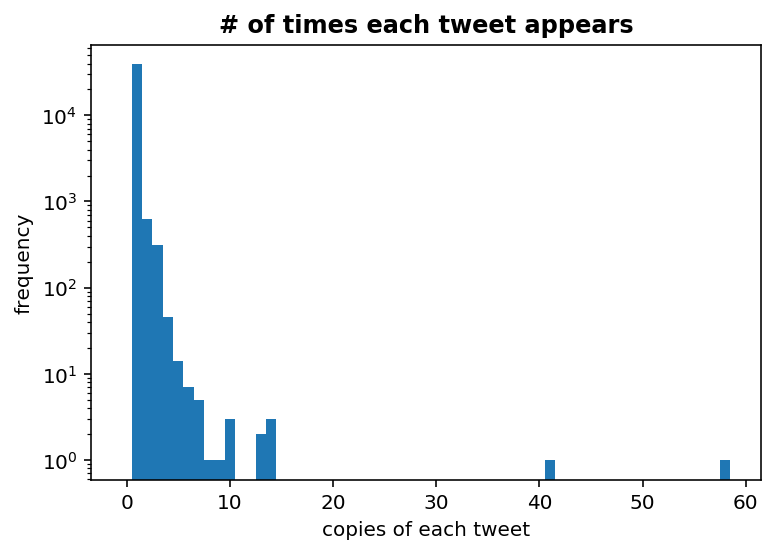

In [25]:
# number of times each tweet appears
counts = final_tweets.groupby(['text']).size().reset_index(name='counts').counts

# define bins for histogram
my_bins = np.arange(0,counts.max()+2, 1)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.title('# of times each tweet appears', weight = 'bold')
plt.xlabel('copies of each tweet')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()

In [6]:
#extract the twitter handles of people mentioned in the tweet
def find_mentions(tweet):
    return re.findall(r'(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)  

In [7]:
# make new columns for mentioned people and hashtags
final_tweets['mentions'] = final_tweets.text.apply(find_mentions)

**Top hashtags within tweets**
- #CoronavirusPandemic
- #CoronavirusUSA
- #Coronavirusupdate
- #CoronaLockdown
- #pandemic
- #CoronaUpdate
- #Coronavirustruth<br>
were among the top

In [8]:
final_tweets.head()

screen_name      username              user_id             tweet_id  \
0    GrowSwyft         Swyft            183319155  1227971435240488963   
1   DaveManzer   Dave Manzer             61875536  1227607239340515334   
2  ShincoIndia  Shinco India  1038043632958238720  1227469384958062593   
3        ezxpo        eZ-Xpo            139902812  1227349219830353920   
4  EightCap_FX      EightCap   815401240012042240  1227092732113510400   

                                 tweet_url            timestamp  \
0    /GrowSwyft/status/1227971435240488963  2020-02-13 15:02:59   
1   /DaveManzer/status/1227607239340515334  2020-02-12 14:55:48   
2  /ShincoIndia/status/1227469384958062593  2020-02-12 05:48:01   
3        /ezxpo/status/1227349219830353920  2020-02-11 21:50:31   
4  /EightCap_FX/status/1227092732113510400  2020-02-11 04:51:20   

   timestamp_epochs                                               text  \
0        1581606179  Could we see a temporary ban on Chinese compan...   
1        1581519348  Could we see a temporary ban on Chinese compan...   
2        1581486481  Read Videotex Director, Arjun Bajaj take on Co...   
3        1581457831  While planners of upcoming meetings that have ...   
4        1581396680  Global economy starts 2020 on ten-month high, ...   

                                           text_html  \
0  <p class="TweetTextSize js-tweet-text tweet-te...   
1  <p class="TweetTextSize js-tweet-text tweet-te...   
2  <p class="TweetTextSize js-tweet-text tweet-te...   
3  <p class="TweetTextSize js-tweet-text tweet-te...   
4  <p class="TweetTextSize js-tweet-text tweet-te...   

                                               links  ... replies  is_replied  \
0                       ['https://hubs.ly/H0m-FCF0']  ...       0       False   
1                       ['https://hubs.ly/H0m-KY80']  ...       0       False   
2                          ['http://bit.ly/2Hcurz0']  ...       0       False   
3  ['https://www.meetingsnet.com/risk-management/...  ...       0       False   
4                        ['https://buff.ly/39kQkIk']  ...       0       False   

  is_reply_to parent_tweet_id  reply_to_users  is_retweet  \
0       False                              []       False   
1       False                              []       False   
2       False                              []       False   
3       False                              []       False   
4       False                              []       False   

                                        clean_tweets  \
0  could see temporary ban chinese company attend...   
1  could see temporary ban chinese company attend...   
2  read videotex director arjun bajaj take outbre...   
3  planner upcoming meeting international attende...   
4  global economy start ten month high awaiting i...   

                                      clean_hashtags  \
0    mwc        coronavirusimpact    worldeconomy...   
1     mwc        coronavirusimpact    worldeconomy     
2    shincoindia    shinco    coronavirusimpact  ...   
3    coronavirusimpact    business    coronavirus...   
4    chriswilliamson    globaleconomy    coronavi...   

                                     clean_tweets_bi        mentions  
0  could see temporary ban chinese company attend...  [@VentureBeat]  
1  could see temporary ban chinese company attend...  [@VentureBeat]  
2  read videotex director arjun bajaj take outbre...              []  
3  planner upcoming meeting international attende...              []  
4  global economy start ten month high awaiting i...              []  

[5 rows x 26 columns]

In [16]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = final_tweets.loc[
                       final_tweets.clean_hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags_add']]
hashtags_list_df

# create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags_add
    for hashtag in hashtags_list],
    columns=['hashtag'])

flattened_hashtags_df

# create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags_add
    for hashtag in hashtags_list],
    columns=['hashtag'])
flattened_hashtags_df

# number of unique hashtags
flattened_hashtags_df['hashtag'].unique().size
# count of appearances of each hashtag
popular_hashtags = flattened_hashtags_df.groupby('hashtag').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)
popular_hashtags

hashtags_add
0      [#MWC2020, #coronavirusimpact, #worldeconomyht...
1          [#MWC2020, #coronavirusimpact, #worldeconomy]
2      [#ShincoIndia, #Shinco, #CoronavirusImpact, #L...
3      [#coronavirusimpact, #business, #coronavirusef...
4      [#ChrisWilliamson, #globaleconomy, #coronaviru...
...                                                  ...
41750                                                 []
41751                                                 []
41752                                                 []
41753                                                 []
41754                                                 []

[41755 rows x 1 columns]

In [21]:
# removing hashtags that were used in scraping and other variantions of covid19
popular_hashtags.drop( popular_hashtags[ popular_hashtags['hashtag'].str.lower() == '#coronavirusoutbreak' ].index , inplace=True)
popular_hashtags.drop( popular_hashtags[ popular_hashtags['hashtag'].str.lower() == '#covid19' ].index , inplace=True)
popular_hashtags.drop( popular_hashtags[ popular_hashtags['hashtag'].str.lower() == '#COVID' ].index , inplace=True)
popular_hashtags.drop( popular_hashtags[ popular_hashtags['hashtag'].str.lower() == '#covid' ].index , inplace=True)
popular_hashtags.drop( popular_hashtags[ popular_hashtags['hashtag'].str.lower() == '#coronavirus' ].index , inplace=True)
popular_hashtags.drop( popular_hashtags[ popular_hashtags['hashtag'].str.lower() == '#corona' ].index , inplace=True)
popular_hashtags.drop( popular_hashtags[ popular_hashtags['hashtag'].str.lower() == '#coronavirusimpact' ].index , inplace=True)
popular_hashtags.drop( popular_hashtags[ popular_hashtags['hashtag'].str.lower() == '#covid2019' ].index , inplace=True)
popular_hashtags.drop( popular_hashtags[ popular_hashtags['hashtag'].str.lower() == '#covid_19' ].index , inplace=True)
popular_hashtags.drop( popular_hashtags[ popular_hashtags['hashtag'].str.lower() == '#covid-19' ].index , inplace=True)


In [22]:
# top 15 hastags
popular_hashtags.head(15)

hashtag  counts
6     #CoronavirusPandemic    1410
13         #CoronavirusUSA     723
14      #CoronaVirusUpdate     584
15         #CoronaLockdown     581
17               #pandemic     493
18           #CoronaUpdate     438
20       #Coronavirustruth     399
21        #COVID19Pandemic     386
24                  #China     332
25                  #Trump     326
26               #StayHome     318
27                  #Wuhan     306
28     #CoronaVirusUpdates     298
29  #StayAtHomeAndStaySafe     286
30    #CoronavirusLockdown     269

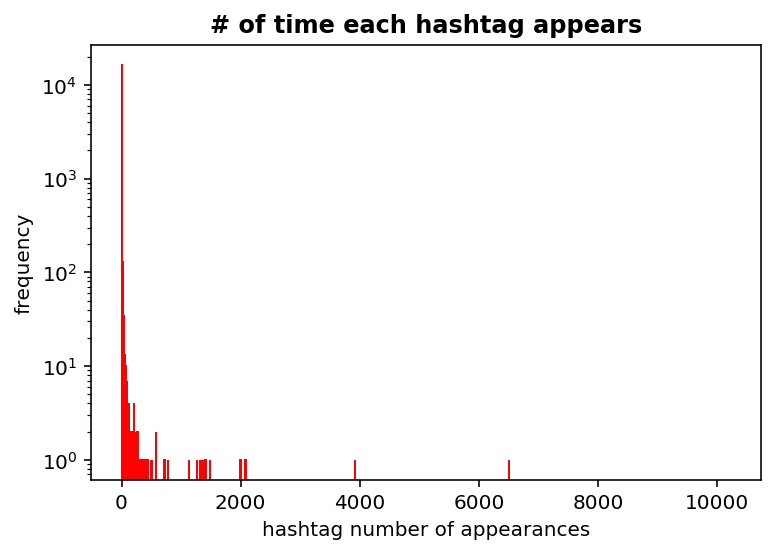

In [26]:
# number of times each hashtag appears
counts = flattened_hashtags_df.groupby(['hashtag']).size()\
                              .reset_index(name='counts')\
                              .counts

# define bins for histogram                              
my_bins = np.arange(0,counts.max()+2, 5)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins, color = 'red',  ec="red")
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.title('# of time each hashtag appears', weight = 'bold')
plt.xlabel('hashtag number of appearances')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()

**Top accounts mentions**
 - Donald Trump appears twice in the top 5 mentions:
     - @realDonaldTrump	
     - @POTUS
 - Followed by @YouTube	, @WHO and @UKChange	

In [27]:
# take the rows from the hashtag columns where there are actually hashtags
mentions_list_df = final_tweets.loc[
                       final_tweets.mentions.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['mentions']]
mentions_list_df

# flattening the above list with multiple hashtags
# create dataframe where each use of hashtag gets its own row
flattened_mentions_df = pd.DataFrame(
    [mention for mentions_list in mentions_list_df.mentions
    for mention in mentions_list],
    columns=['mentions'])

flattened_mentions_df

flattened_mentions_df
flattened_mentions_df['mentions'].unique().size
popular_mentions = flattened_mentions_df.groupby('mentions').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)
popular_mentions.head(15) 

mentions  counts
0   @realDonaldTrump     782
1           @YouTube     530
2             @POTUS     219
3               @WHO     202
4          @UKChange     174
5               @CNN     130
6            @CDCgov     129
7            @Change     104
8                @VP      89
9         @GovAbbott      86
10       @NYGovCuomo      86
11     @narendramodi      82
12          @FoxNews      81
13            @MSNBC      76
14    @SpeakerPelosi      69

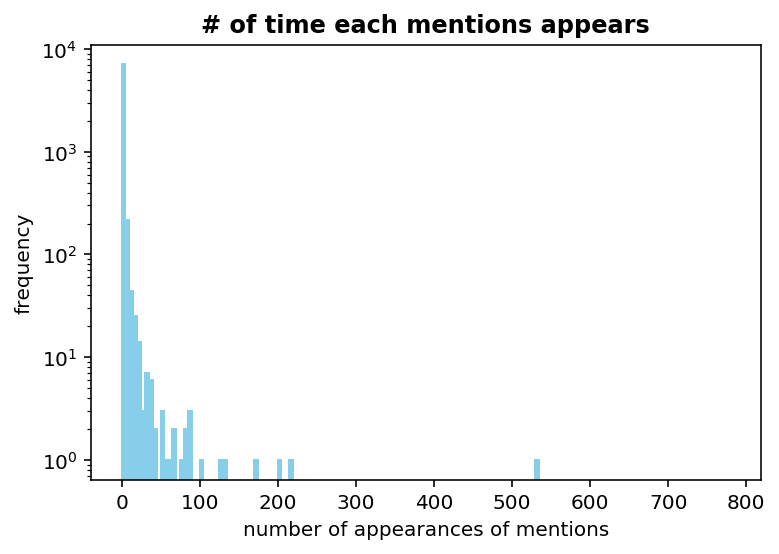

In [28]:
# number of times each mention appears
counts = flattened_mentions_df.groupby(['mentions']).size()\
                              .reset_index(name='counts')\
                              .counts

# define bins for histogram                              
my_bins = np.arange(0,counts.max()+2, 5)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins, color = 'skyblue',  ec="skyblue")
plt.title('# of time each mentions appears', weight = 'bold')
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('number of appearances of mentions')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()

In [29]:
# function to plot word cloud
def plot_wordcloud(item, title):
    wordcloud = WordCloud( collocations=False,background_color="white", max_words=150).generate(item)

    plt.figure(figsize = (10, 10), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.title(title, fontsize = 16, weight = 'bold', color = 'blue')
    plt.tight_layout() #pad = 0

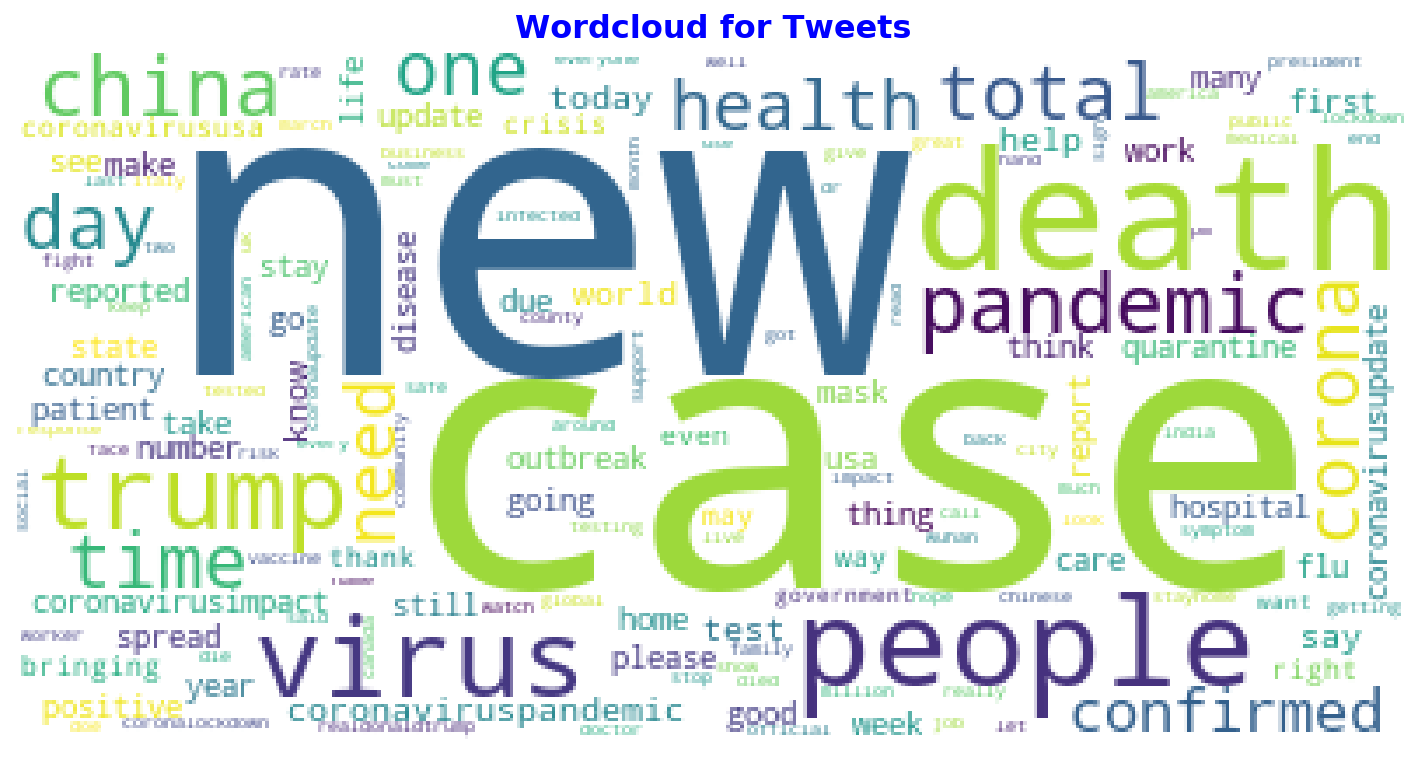

In [30]:
tweets = " ".join(t for t in final_tweets.clean_tweets)
plot_wordcloud(tweets, "Wordcloud for Tweets")

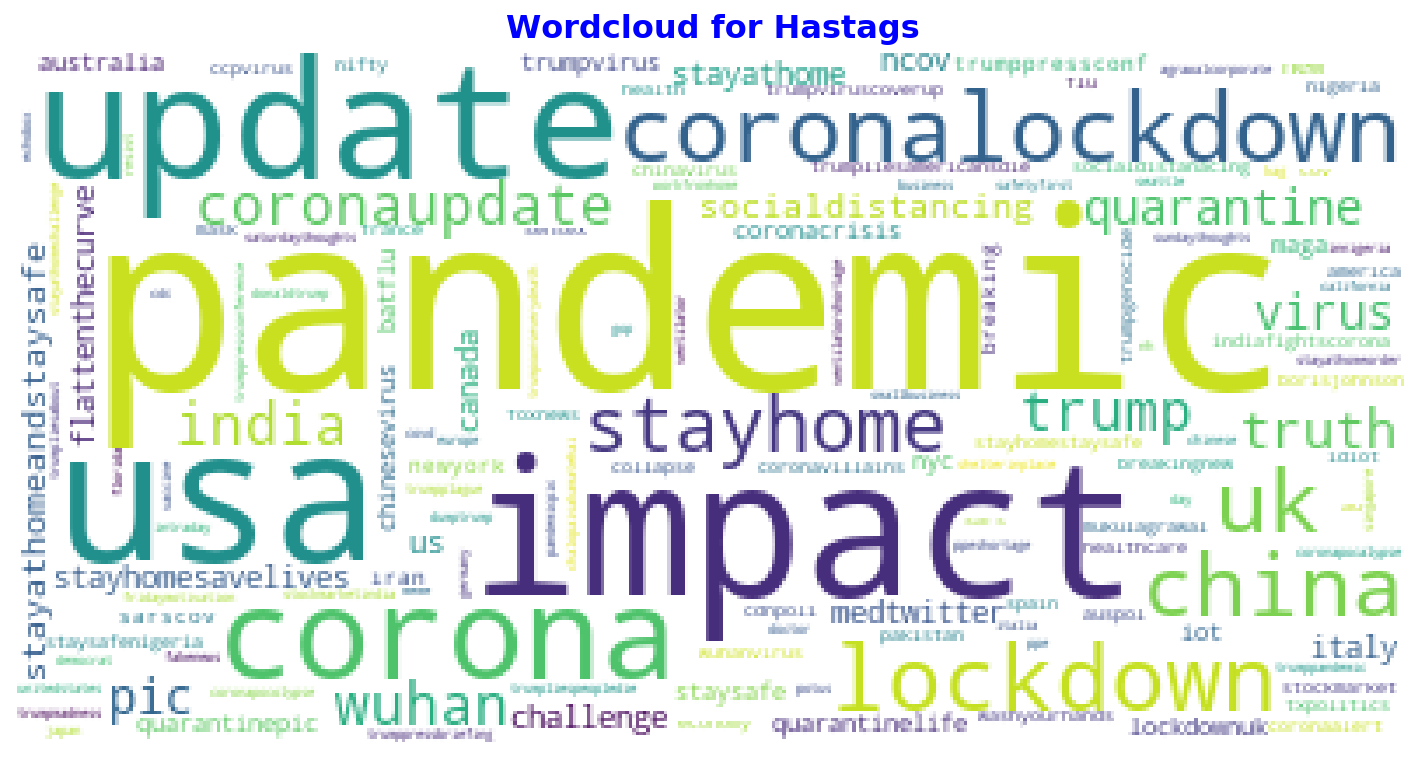

In [31]:
hashtags = " ".join(t for t in final_tweets.clean_hashtags)
type(hashtags)
# filtering out words that are part of hashtags used for extraction of tweets to gain insights into themes of hashtags
hashtags = hashtags.replace('covid', '')
hashtags = hashtags.replace('coronavirus', '')
hashtags = hashtags.replace('coronavirusoutbreak', '')
hashtags = hashtags.replace('coronaoutbreak', '')
hashtags = hashtags.replace('outbreak', '')
hashtags = hashtags.replace('https', '')
hashtags = hashtags.replace('coronavirusimpact', '')
# plot the word cloud after hashtag eliminations
plot_wordcloud(hashtags, "Wordcloud for Hastags")

In [32]:
final_tweets.columns

Index(['screen_name', 'username', 'user_id', 'tweet_id', 'tweet_url',
       'timestamp', 'timestamp_epochs', 'text', 'text_html', 'links',
       'hashtags', 'has_media', 'img_urls', 'video_url', 'likes', 'retweets',
       'replies', 'is_replied', 'is_reply_to', 'parent_tweet_id',
       'reply_to_users', 'is_retweet', 'clean_tweets', 'clean_hashtags',
       'clean_tweets_bi', 'mentions', 'hashtags_add'],
      dtype='object')

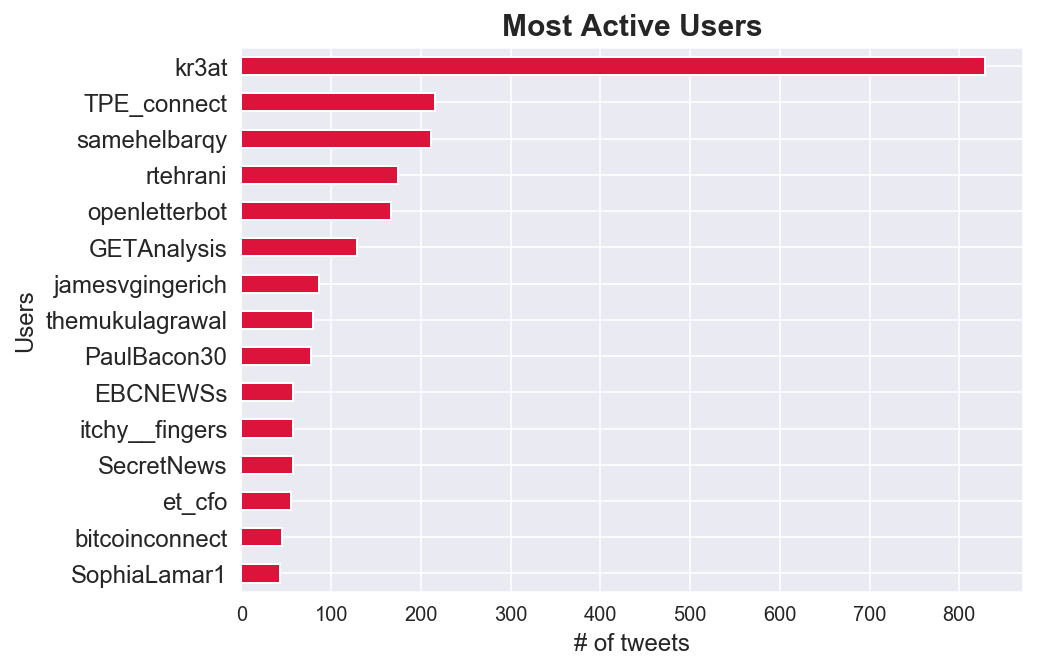

In [33]:
# most active users - most number of tweets, most likes, retweets and replies
plt.figure(figsize = (7,5))
sns.set_style("darkgrid")
final_tweets.groupby(['screen_name'])['tweet_id'].count().sort_values(ascending = False).head(15).plot(kind = 'barh', color = 'crimson')
plt.xticks(fontsize= 10)
plt.yticks(fontsize= 12)
plt.title('Most Active Users', fontsize = 15, weight = 'bold')
plt.xlabel('# of tweets', fontsize = 12)
plt.ylabel('Users', fontsize = 12);
plt.gca().invert_yaxis();

**Steady increase in tweets over time in 2020**

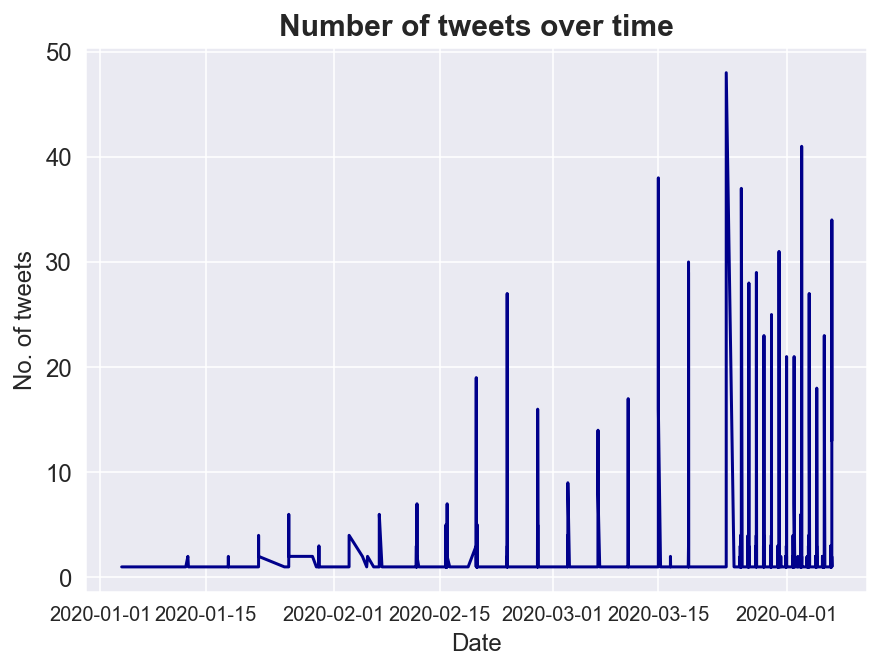

In [34]:
# check for tweeting trends 
final_tweets["timestamp"]= pd.to_datetime(final_tweets["timestamp"]) 
plotdf = final_tweets.groupby('timestamp')['tweet_id'].count().to_frame(name = 'count').reset_index()
plt.figure(figsize = (7,5))
plt.plot(plotdf['timestamp'], plotdf['count'], color = 'darkblue')
plt.xticks(fontsize= 10)
plt.yticks(fontsize= 12)
plt.title('Number of tweets over time', fontsize = 15, weight = 'bold')
plt.xlabel('Date', fontsize = 12)
plt.ylabel('No. of tweets', fontsize = 12);

**Saturday and Wednesday seems to be busy days to tweet whereas Tuesday records the lowest number of tweets.**

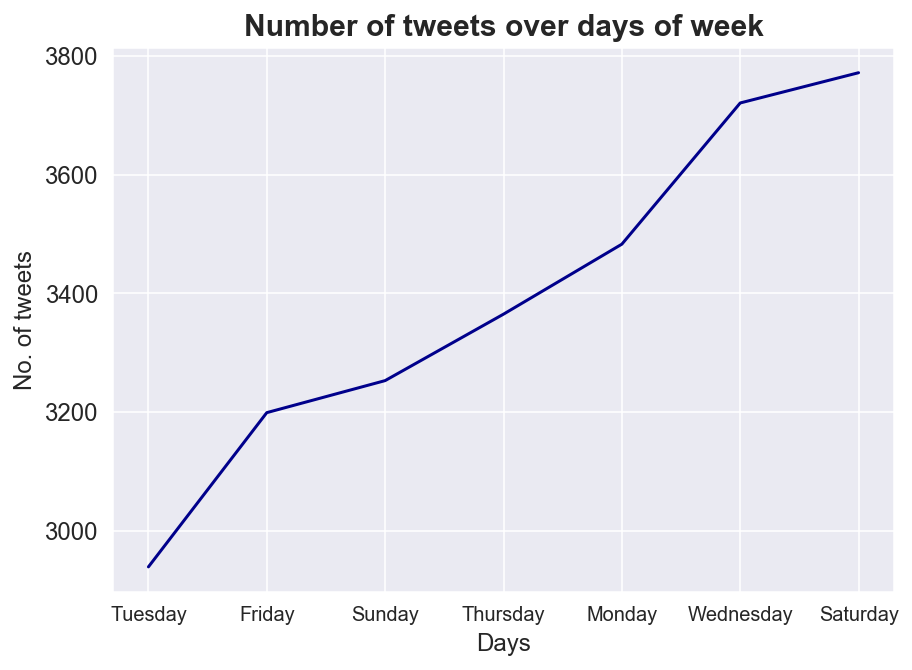

In [53]:
# check for tweeting trends - to be sorted by day
plotdf1 = final_tweets.groupby(plotdf.timestamp.dt.day_name())['tweet_id'].count().to_frame(name = 'count').sort_values(by = 'count').reset_index()
plt.figure(figsize = (7,5))
plt.plot(plotdf1['timestamp'], plotdf1['count'], color = 'darkblue')
plt.xticks(fontsize= 10)
plt.yticks(fontsize= 12)
plt.title('Number of tweets over days of week', fontsize = 15, weight = 'bold')
plt.xlabel('Days', fontsize = 12)
plt.ylabel('No. of tweets', fontsize = 12);

### Modeling & Evaluation

1) Turning text into matrix, where each row in the matrix encodes which words appeared in each individual tweet.<br>
2) Filter the words max_df=0.9 - discard any words that appear in >90% of tweets. Disregarding high appearing words since they are too common to be meaningful in topics.<br> 
3) Also filter words using min_df=25 - so words that appear in less than 25 tweets will be discarded. Discarding low appearing words because we won’t have a strong enough signal and they will just introduce noise to our model.<br>

Since our tweet database is small we should be able to use a normal matrix, instead of a sparse matrix.

**Inspect the topics that is generated by the model and try to extract meaningful information from them.**

In [94]:
# function to extract the topics returned from the model in a dataframe. Each topic is a list of words/tokens and their weights.
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [80]:
# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern="\w+|\$[\d\.]+|\S+")

# apply transformation
tf = vectorizer.fit_transform(final_tweets['clean_tweets']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

tf_feature_names

<>:2: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
<ipython-input-80-4f9a6303d0ea>:2: DeprecationWarning: invalid escape sequence \w
  vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern="\w+|\$[\d\.]+|\S+")


['ab',
 'abc',
 'ability',
 'able',
 'aboard',
 'abortion',
 'abroad',
 'absolute',
 'absolutely',
 'abt',
 'academic',
 'accept',
 'access',
 'according',
 'account',
 'accountable',
 'accurate',
 'across',
 'act',
 'acted',
 'acting',
 'action',
 'active',
 'activity',
 'actor',
 'actual',
 'actually',
 'ad',
 'adam',
 'add',
 'added',
 'adding',
 'additional',
 'address',
 'admin',
 'administration',
 'admit',
 'admitted',
 'adult',
 'advance',
 'advantage',
 'advertising',
 'advice',
 'advisory',
 'af',
 'affect',
 'affected',
 'affecting',
 'afford',
 'afraid',
 'africa',
 'african',
 'afternoon',
 'age',
 'agency',
 'agenda',
 'agent',
 'ago',
 'agrawalcorporate',
 'agree',
 'agreed',
 'ahead',
 'ai',
 'aid',
 'air',
 'airborne',
 'aircraft',
 'airline',
 'airport',
 'aka',
 'al',
 'alabama',
 'alarm',
 'alarming',
 'alberta',
 'alcohol',
 'alert',
 'alex',
 'alive',
 'allah',
 'allergy',
 'allow',
 'allowed',
 'allowing',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'a

In [15]:
tf.shape

(41755, 2904)

**Arbitrarily choosing 10 topics**

In [91]:
number_of_topics = 10
# instantiate the model
model = LatentDirichletAllocation(n_components=number_of_topics, random_state=42)
# fit the model
model.fit(tf)

In [93]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights  \
0                trump          2512.2          test          1305.5   
1      realdonaldtrump           786.9          help           694.5   
2             american           524.9        health           532.9   
3            president           464.0          sign           519.1   
4                potus           357.9        worker           500.2   
5              america           350.9         staff           456.7   
6               people           343.3          need           447.4   
7  coronaviruspandemic           298.2        crisis           381.6   
8                 ship           287.1        school           364.9   
9                  cnn           258.6      petition           362.1   

  Topic 2 words Topic 2 weights Topic 3 words Topic 3 weights Topic 4 words  \
0        spread           502.7         virus          2115.3        social   
1          help           401.4         china          1797.9             n   
2       medical           389.2        corona          1068.0          mask   
3   information           381.1         world           837.5      business   
4     community           380.6      outbreak           798.8       support   
5        health           351.0       disease           770.7          must   
6          need           330.4         wuhan           721.1          last   
7        please           327.3      pandemic           700.3      pandemic   
8          risk           315.2          name           659.6           act   
9        supply           312.6       chinese           547.2    distancing   

  Topic 4 weights Topic 5 words Topic 5 weights        Topic 6 words  \
0           547.9        people          1687.2  coronaviruspandemic   
1           514.1           get          1309.3    coronavirusimpact   
2           484.5          like          1276.9             pandemic   
3           471.8           one           912.9                india   
4           449.0          know           910.7                 news   
5           436.3         thing           860.4    coronavirusupdate   
6           368.6          time           859.5             lockdown   
7           367.7         think           731.5               update   
8           357.9         going           709.0       coronavirususa   
9           357.8          need           655.2             stayhome   

  Topic 6 weights Topic 7 words Topic 7 weights Topic 8 words Topic 8 weights  \
0          1306.8          case          5457.6           flu           901.7   
1          1218.1           new          4789.8        number           733.0   
2           720.0         death          3523.8        people           703.1   
3           706.1         total          2080.1          rate           567.1   
4           704.4     confirmed          1675.1         death           536.4   
5           661.3        report          1329.2          year           462.3   
6           593.9      reported           978.1           one           399.9   
7           511.2         today           874.2      infected           393.8   
8           473.5      bringing           820.1     infection           370.7   
9           375.5           usa           419.4          case           364.2   

  Topic 9 words Topic 9 weights  
0          stay          1141.4  
1          home          1121.4  
2           day           946.6  
3        people           783.5  
4      positive           573.8  
5          week           555.3  
6        tested           487.0  
7         state           460.6  
8          safe           453.0  
9           say           393.8

In [19]:
# Log Likelihood: Higher the better
print("Log Likelihood: ", model.score(tf))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", model.perplexity(tf))

# See model parameters
print(model.get_params())

Log Likelihood:  -3005057.7579999557
Perplexity:  1337.6561490924698
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 10, 'n_jobs': None, 'perp_tol': 0.1, 'random_state': 42, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


**pyLDAvis library is used to visualize the topics generated in a 2D space.**<br>
**This visualization is interactive and displays topics along with the most relevant words.**

In [20]:
pyLDAvis.enable_notebook()
dtm = np.matrix(tf) # converting the nparray to matrix
panel = pyLDAvis.sklearn.prepare(model, dtm, vectorizer, mds='tsne')
panel

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
5      32.420952   8.115230       1        1  18.319577
0       0.648955  71.707100       2        1  10.198884
2      71.019684   9.971006       3        1  10.076943
9       3.785981  33.185135       4        1   9.817509
8     -42.666500  -9.222070       5        1   9.464752
1      -3.621689 -43.526516       6        1   9.382998
3      -3.632402  -4.171708       7        1   9.221301
6     -36.584400  35.804413       8        1   8.850209
7      44.391380  50.615383       9        1   7.688969
4      40.235809 -31.591665      10        1   6.978857, topic_info=                   Term         Freq        Total Category  logprob  loglift
368                case  6072.000000  6072.000000  Default  30.0000  30.0000
1696                new  4941.000000  4941.000000  Default  29.0000  29.0000
686               death  4174.000000  4174.000000  Default  28.0000  28.0000
2647              trump  2451.000000  2451.000000  Default  27.0000  27.0000
2606              total  2146.000000  2146.000000  Default  26.0000  26.0000
...                 ...          ...          ...      ...      ...      ...
1799           pandemic   373.819379  2463.141921  Topic10  -4.3559   0.7769
1232              house   127.890510   347.611350  Topic10  -5.4285   1.6624
577   coronavirusimpact   182.009524  1399.382966  Topic10  -5.0756   0.6226
1861               plan   127.505921   359.272178  Topic10  -5.4315   1.6264
2585               time   131.530885  2012.584130  Topic10  -5.4004  -0.0656

[679 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
18        3  0.036946             act
18       10  0.960583             act
35        2  0.917224  administration
35        5  0.009916  administration
35        6  0.014874  administration
...     ...       ...             ...
2890     10  0.019261            year
2895      9  0.997144            york
2899      3  0.023683         zealand
2899      9  0.970992         zealand
2902      6  0.977682             zoo

[1925 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 3, 10, 9, 2, 4, 7, 8, 5])

**Checking with bigrams that were generated above**

In [95]:
# the vectorizer object will be used to transform text to vector form
vectorizer2 = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf2 = vectorizer2.fit_transform(final_tweets['clean_tweets_bi']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names2 = vectorizer2.get_feature_names()

tf_feature_names2

<>:2: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
<ipython-input-95-8a7cfd45b7af>:2: DeprecationWarning: invalid escape sequence \w
  vectorizer2 = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')


['ab',
 'abc',
 'ability',
 'able',
 'aboard',
 'aboard_air',
 'abortion',
 'abroad',
 'absolute',
 'absolutely',
 'abt',
 'academic',
 'accept',
 'access',
 'according',
 'account',
 'accountable',
 'accurate',
 'across',
 'across_country',
 'act',
 'act_deliver',
 'acted',
 'acting',
 'action',
 'active',
 'activity',
 'actor',
 'actual',
 'actually',
 'ad',
 'adam',
 'add',
 'added',
 'adding',
 'additional',
 'address',
 'admin',
 'administration',
 'admit',
 'admitted',
 'adult',
 'advance',
 'advantage',
 'advertising',
 'advice',
 'advisory',
 'af',
 'affect',
 'affected',
 'affecting',
 'afford',
 'afraid',
 'africa',
 'african',
 'afternoon',
 'age',
 'agency',
 'agenda',
 'agent',
 'ago',
 'agrawalcorporate',
 'agrawalcorporate_stockmarket',
 'agree',
 'agreed',
 'ahead',
 'ai',
 'aid',
 'air',
 'air_canada',
 'airborne',
 'aircraft',
 'aircraft_carrier',
 'airline',
 'airport',
 'aka',
 'al',
 'alabama',
 'alabama_report',
 'alarm',
 'alarming',
 'alberta',
 'alcohol',
 'ale

In [96]:
# instantiating and fitting the model with the new matrix with bigrams
number_of_topics = 10

model2 = LatentDirichletAllocation(n_components=number_of_topics, random_state=42)
model2.fit(tf2)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [97]:
# display generated topics
no_top_words2 = 10
display_topics(model2, tf_feature_names2, no_top_words2)

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights  Topic 2 words  \
0          news          1178.2         china          1555.7           test   
1           new           828.8          case           997.5           sign   
2          name           713.1        health           972.7            act   
3        update           320.6      positive           900.2       petition   
4          face           315.5         state           715.9  sign_petition   
5          york           314.2        tested           667.7        support   
6      business           308.8          test           609.7         canada   
7      new_york           300.1      outbreak           572.5           must   
8         world           287.6        number           565.7             nh   
9       disease           263.7        public           488.8          staff   

  Topic 2 weights Topic 3 words Topic 3 weights        Topic 4 words  \
0           586.7          help           902.5  coronaviruspandemic   
1           517.2          need           891.7       coronavirususa   
2           368.5          care           663.4    coronavirusupdate   
3           362.1          mask           639.9               people   
4           320.1        worker           596.7     coronavirustruth   
5           310.4      hospital           506.1                   uk   
6           300.9         thank           497.8                    b   
7           300.7        please           480.4                    c   
8           295.5          work           478.8         coronaupdate   
9           258.4        people           451.1             pandemic   

  Topic 4 weights Topic 5 words Topic 5 weights   Topic 6 words  \
0          1494.2          time           586.6            case   
1           850.4          week           482.8           death   
2           736.1       chinese           428.6             new   
3           491.4      pandemic           408.3           total   
4           426.0         world           407.5        new_case   
5           406.9           flu           395.0       confirmed   
6           403.2          rate           368.1          report   
7           383.0          year           359.4  confirmed_case   
8           376.7         china           357.0       new_death   
9           344.5         month           344.7        case_new   

  Topic 6 weights      Topic 7 words Topic 7 weights Topic 8 words  \
0          4766.1              virus          1776.5          stay   
1          3633.6             corona          1470.4          home   
2          3432.5           pandemic           962.4        social   
3          2080.1  coronavirusimpact           899.3        people   
4          1697.1             spread           673.0     stay_home   
5          1624.4       corona_virus           598.1         india   
6          1380.7             impact           483.4         death   
7          1169.1           lockdown           466.5         trump   
8          1069.1             please           364.3    distancing   
9          1052.1               sars           359.1           day   

  Topic 8 weights Topic 9 words Topic 9 weights  
0           930.0         trump          1997.2  
1           886.3        people          1895.0  
2           556.1           get          1217.9  
3           476.0          know          1206.0  
4           456.0          like          1177.0  
5           441.1           one           950.4  
6           426.0         would           901.2  
7           376.4         thing           766.4  
8           368.1         think           697.6  
9           344.7            go           604.8

**No noteworthy keywords observed from bigrams, so sticking to the above model with single words.**

In [214]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", model2.score(tf2))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", model2.perplexity(tf2))


Log Likelihood:  -3338534.087877931
Perplexity:  1388.624511776464


### Trying NMF (Non - Negative Matrix Factorization)

It is deemed to be fit for short documents such as tweets as opposed to LDA. 

In [103]:
# defining stop words before feeding to TDIDF vectorizer
stops = set(stopwords.words('english'))
stops.update(['u','wa','ha','ak','le','via','com','bit','ly','pic','divr','viru','html','http','https','wwww','youtube','youtu','retweet','covid','coronaviru','coronavirus','twitter','coronavirusoutbreak','coronavirusoutbrea'])

# NMF is able to use tf-idf unlike LDA
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=25, stop_words=stops)
tfidf = tfidf_vectorizer.fit_transform(final_tweets['clean_tweets'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [104]:
no_topics = 10
nmf_model = NMF(n_components=no_topics, random_state=42, alpha=.1, l1_ratio=.5)
nmf_model.fit(tfidf)

NMF(alpha=0.1, beta_loss='frobenius', init=None, l1_ratio=0.5, max_iter=200,
    n_components=10, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [105]:
no_top_words = 10
display_topics(nmf_model, tfidf_feature_names, no_top_words)

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights  \
0           new             5.6        people             3.3   
1         death             4.6         trump             2.0   
2         total             4.3           get             1.9   
3          case             3.8          like             1.7   
4      bringing             2.0          time             1.5   
5        report             2.0          need             1.5   
6     confirmed             1.8           one             1.4   
7      reported             1.6          know             1.3   
8         today             1.4           day             1.2   
9           usa             0.5          home             1.2   

          Topic 2 words Topic 2 weights Topic 3 words Topic 3 weights  \
0                corona             6.4          sign             2.3   
1                 virus             4.9      petition             2.3   
2                 wuhan             0.6            nh             2.2   
3            medtwitter             0.5      ukchange             2.1   
4                batflu             0.5     frontline             2.1   
5  coronaviruschallenge             0.5      priority             2.1   
6         quarantinepic             0.4         staff             2.1   
7     stayawarestaysafe             0.3          test             1.7   
8    coronavirusupdates             0.3        change             0.3   
9                  sars             0.2       support             0.1   

  Topic 4 words Topic 4 weights Topic 5 words Topic 5 weights  \
0          case             6.6          name             5.1   
1     confirmed             2.2       disease             2.9   
2         first             1.8           new             1.9   
3     recovered             1.5      official             1.5   
4        health             1.4         world             1.3   
5           say             1.0        health             1.3   
6        update             1.0        caused             1.2   
7        county             0.9    officially             1.2   
8       officer             0.9       illness             0.8   
9         fully             0.9  organization             0.8   

         Topic 6 words Topic 6 weights Topic 7 words Topic 7 weights  \
0             pandemic             5.1       support             1.8   
1  coronaviruspandemic             4.3      official             1.8   
2    coronavirusupdate             1.9       signing             1.7   
3       coronavirususa             1.9     delivered             1.7   
4                   uk             1.0          copy             1.7   
5     coronavirustruth             0.9       deliver             1.7   
6               update             0.8          must             1.7   
7         coronaupdate             0.8          last             1.7   
8        coronavirusuk             0.7       senator             1.6   
9                india             0.7           act             1.6   

      Topic 8 words Topic 8 weights Topic 9 words Topic 9 weights  
0             china             6.8      positive             4.3  
1          outbreak             2.0          test             4.0  
2             wuhan             1.2        tested             1.9  
3           chinese             0.5     passenger             1.4  
4             death             0.5        canada             1.2  
5             virus             0.4           air             1.1  
6             world             0.4     vancouver             0.9  
7             italy             0.4      montreal             0.9  
8           country             0.4        flight             0.8  
9  wuhancoronavirus             0.3        aboard             0.6

**Topics generated with NMF model appears to be very similar to the one generated with LDA. Thus sticking to LDA model as final model**